# Malware Detection Binary Classification

In [659]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [660]:
start_time = time.time()

In [661]:
# Load the CSV file into a DataFrame
test = pd.read_csv("test.csv", index_col=0)
train = pd.read_csv("train.csv", index_col=0)

# Part 1: Explorization

### We will start by exploring the dataset itself:

In [662]:
# Print the shape of the data
print(f"The train data set shape is: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"The test data set shape is: {test.shape[0]} rows and {test.shape[1]} columns")

The train data set shape is: 60000 rows and 23 columns
The test data set shape is: 18000 rows and 22 columns


In [663]:
exploration_train = train.copy()

In [664]:
# Check for duplicates
exploration_train = exploration_train.drop_duplicates()
print(f"The train data set shape is: {exploration_train.shape[0]} rows and {exploration_train.shape[1]} columns")

The train data set shape is: 59947 rows and 23 columns


In [665]:
# See how the top 5 rows of the data looks like:
exploration_train.head()

size      vsize  \
sha256                                                                   
a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd5...  6744064  6799360.0   
ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf016...    22016    45056.0   
b0b126adc73b980a114e38027b082d149fcf491547452f0...   686136   704512.0   
ff6176c53ca9b58040c93870c264843b93b5e290c28e576...     8192    36864.0   
59b8bc6ac157a553440978406c8aa8eb8a25c166af11754...   396288   421888.0   

                                                    imports  exports  \
sha256                                                                 
a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd5...    524.0      3.0   
ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf016...      2.0      0.0   
b0b126adc73b980a114e38027b082d149fcf491547452f0...    133.0      4.0   
ff6176c53ca9b58040c93870c264843b93b5e290c28e576...      6.0      0.0   
59b8bc6ac157a553440978406c8aa8eb8a25c166af11754...    133.0      0.0   

                                                    has_debug  \
sha256                                                          
a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd5...        0.0   
ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf016...        0.0   
b0b126adc73b980a114e38027b082d149fcf491547452f0...        1.0   
ff6176c53ca9b58040c93870c264843b93b5e290c28e576...        0.0   
59b8bc6ac157a553440978406c8aa8eb8a25c166af11754...        1.0   

                                                    has_relocations  \
sha256                                                                
a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd5...              1.0   
ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf016...              0.0   
b0b126adc73b980a114e38027b082d149fcf491547452f0...              1.0   
ff6176c53ca9b58040c93870c264843b93b5e290c28e576...              0.0   
59b8bc6ac157a553440978406c8aa8eb8a25c166af11754...              1.0   

                                                    has_resources  \
sha256                                                              
a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd5...            1.0   
ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf016...            1.0   
b0b126adc73b980a114e38027b082d149fcf491547452f0...            1.0   
ff6176c53ca9b58040c93870c264843b93b5e290c28e576...            0.0   
59b8bc6ac157a553440978406c8aa8eb8a25c166af11754...            1.0   

                                                    has_signature  has_tls  \
sha256                                                                       
a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd5...            0.0      1.0   
ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf016...            0.0      0.0   
b0b126adc73b980a114e38027b082d149fcf491547452f0...            1.0      0.0   
ff6176c53ca9b58040c93870c264843b93b5e290c28e576...            0.0      0.0   
59b8bc6ac157a553440978406c8aa8eb8a25c166af11754...            0.0      0.0   

                                                    symbols  ...  registry  \
sha256                                                       ...             
a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd5...      0.0  ...       0.0   
ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf016...      0.0  ...       0.0   
b0b126adc73b980a114e38027b082d149fcf491547452f0...      0.0  ...       0.0   
ff6176c53ca9b58040c93870c264843b93b5e290c28e576...      NaN  ...       0.0   
59b8bc6ac157a553440978406c8aa8eb8a25c166af11754...      0.0  ...       0.0   

                                                      MZ  printables  \
sha256                                                                 
a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd5...  28.0    899075.0   
ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf016...   1.0       856.0   
b0b126adc73b980a114e38027b082d149fcf491547452f0...   2.0     32767.0   
ff6176c53ca9b58040c93870c264843b93b5e290c28e576...   1.0       678.0   
59b8bc6ac157a553440978406c8aa8eb8a25c166af11754...   5.0     35881.

In [666]:
# Present count of values per each column & data type:
exploration_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59947 entries, a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd5f11e9785e85b9c80f to 7dc9c3c1035a77fa45371b50a1a4dfec995f608e5204a4ac28983f2c561fc1f8
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   size                 59947 non-null  int64  
 1   vsize                58013 non-null  float64
 2   imports              58208 non-null  float64
 3   exports              57854 non-null  float64
 4   has_debug            57020 non-null  float64
 5   has_relocations      56623 non-null  float64
 6   has_resources        57986 non-null  float64
 7   has_signature        58010 non-null  float64
 8   has_tls              57049 non-null  float64
 9   symbols              57294 non-null  float64
 10  numstrings           57229 non-null  float64
 11  paths                56287 non-null  float64
 12  urls                 57598 non-null  float64
 13  registry           

In [667]:
# Present statistic data about numeric features
exploration_train.describe().T

count          mean           std         min  \
size                 59947.0  1.502246e+06  4.729258e+06  298.000000   
vsize                58013.0  1.967168e+06  2.018771e+07  544.000000   
imports              58208.0  1.062874e+02  2.135274e+02    0.000000   
exports              57854.0  3.083149e+01  5.083114e+02    0.000000   
has_debug            57020.0  4.041389e-01  4.907289e-01    0.000000   
has_relocations      56623.0  5.435777e-01  4.981018e-01    0.000000   
has_resources        57986.0  8.611561e-01  3.457865e-01    0.000000   
has_signature        58010.0  2.544217e-01  4.355394e-01    0.000000   
has_tls              57049.0  2.343950e-01  4.236238e-01    0.000000   
symbols              57294.0  4.020753e+01  1.240242e+03    0.000000   
numstrings           57229.0  7.410662e+03  2.464119e+04    1.000000   
paths                56287.0  1.646330e+00  3.702114e+01    0.000000   
urls                 57598.0  1.251280e+01  7.166366e+01    0.000000   
registry             57422.0  4.296785e-01  1.150216e+01    0.000000   
MZ                   56859.0  1.627616e+01  8.222918e+01    1.000000   
printables           57208.0  1.208794e+05  6.054898e+05    5.000000   
avlength             57191.0  3.268087e+01  1.095208e+03    5.000000   
file_type_prob_trid  59947.0  5.364561e+01  2.060040e+01   17.500000   
A                    56296.0  4.015404e+00  6.368440e+00  -17.783199   
B                    56197.0  5.810270e+00  6.414652e-01    0.004929   
label                59947.0  4.995579e-01  5.000040e-01    0.000000   

                               25%            50%           75%           max  
size                 107634.500000  484504.000000  1.242716e+06  3.253537e+08  
vsize                122880.000000  425984.000000  1.601536e+06  4.278288e+09  
imports                   1.000000      28.000000  1.530000e+02  1.504700e+04  
exports                   0.000000       0.000000  0.000000e+00  4.884000e+04  
has_debug                 0.000000       0.000000  1.000000e+00  1.000000e+00  
has_relocations           0.000000       1.000000  1.000000e+00  1.000000e+00  
has_resources             1.000000       1.000000  1.000000e+00  1.000000e+00  
has_signature             0.000000       0.000000  1.000000e+00  1.000000e+00  
has_tls                   0.000000       0.000000  0.000000e+00  1.000000e+00  
symbols                   0.000000       0.000000  0.000000e+00  1.816600e+05  
numstrings              475.000000    1998.000000  5.172000e+03  1.572261e+06  
paths                     0.000000       0.000000  1.000000e+00  5.324000e+03  
urls                      0.000000       0.000000  1.000000e+01  9.387000e+03  
registry                  0.000000       0.000000  0.000000e+00  2.492000e+03  
MZ                        1.000000       4.000000  1.100000e+01  7.010000e+03  
printables             6038.750000   22858.000000  7.622325e+04  5.034687e+07  
avlength                  7.447368      12.019566  1.731561e+01  2.079909e+05  
file_type_prob_trid      38.400000      43.300000  6.910000e+01  1.000000e+02  
A                        -0.293525       3.658333  7.863973e+00  4.392660e+01  
B                         5.469705       5.855862  6.344719e+00  6.584937e+00  
label                     0.000000       0.000000  1.000000e+00  1.000000e+00

In [668]:
# Statistic summary of categorial features
exploration_train.describe(include="O").T

count unique                         top   freq
file_type_trid  59947     89  Win64 Executable (generic)  10083
C               57896      7                          vh  23197

In [669]:
# Checikng the number of unique values per each coulmn:
exploration_train.apply(lambda x: len(x.unique()))

size                   27339
vsize                   3303
imports                 1091
exports                  818
has_debug                  3
has_relocations            3
has_resources              3
has_signature              3
has_tls                    3
symbols                  416
numstrings             13920
paths                    169
urls                     413
registry                  58
MZ                       557
printables             33908
avlength               44463
file_type_trid            89
file_type_prob_trid      728
A                      56297
B                      49133
C                          8
label                      2
dtype: int64

#### Conclusions untill now:
* We can see that the dataset contains a mix of categorical and numerical variables.

* All the numerical variables are from float type, except for one - size, which we'll deal with it later.

* sha256 have 60,000 unique values, meaning- each row have a unique sha256 value, so this is the ID feature of our dataset.

* file_type_trid have 89 unique values while Win64 Executable (generic) is the most common.

* C have 7 unique values while vh is the most common.

* There are no missing values in the Size column

* We can identify few binary columns (the columns have 3 unique values in total since 1 is for the NULL values):
 has_debug, has_relocation, has_resoucres, has_signature, has_tls, labels

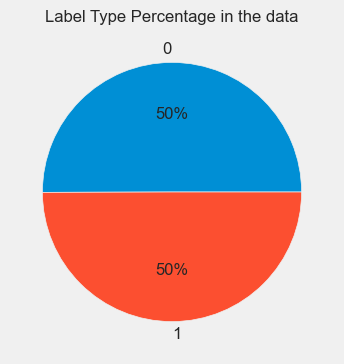

In [670]:
# Checking how many samples we have from each label:
plt.figure(figsize=(4, 4))
exploration_train["label"].value_counts().plot.pie(autopct="%1.0f%%", fontsize=12)
plt.title("Label Type Percentage in the data", size=12)
plt.ylabel("")
plt.show()

* We can see that we have 50% of Malicious files and 50% of benevolent files, so we have a balanced dataset.

We will start with exploring the different features in the dataset by dividing them to 3 groups:

In [671]:
NUMERIC_COLUMNS = ['size', 'vsize', 'imports', 'exports', 'symbols', 'numstrings', 'paths',
                   'urls', 'registry', 'MZ', 'printables', 'avlength', 'file_type_prob_trid', 'A', 'B']
BINARY_COLUMNS = ['has_debug', 'has_relocations', 'has_resources', 'has_signature', 'has_tls', 'label']
CATEGORICAL_COLUMNS = ['file_type_trid', 'C']

#Sha256 is a cateogrical column that represents a unique ID for each sample, but we won't use it in our analysis
OTHERS = ['sha256']


### Exploring the Binary Features:

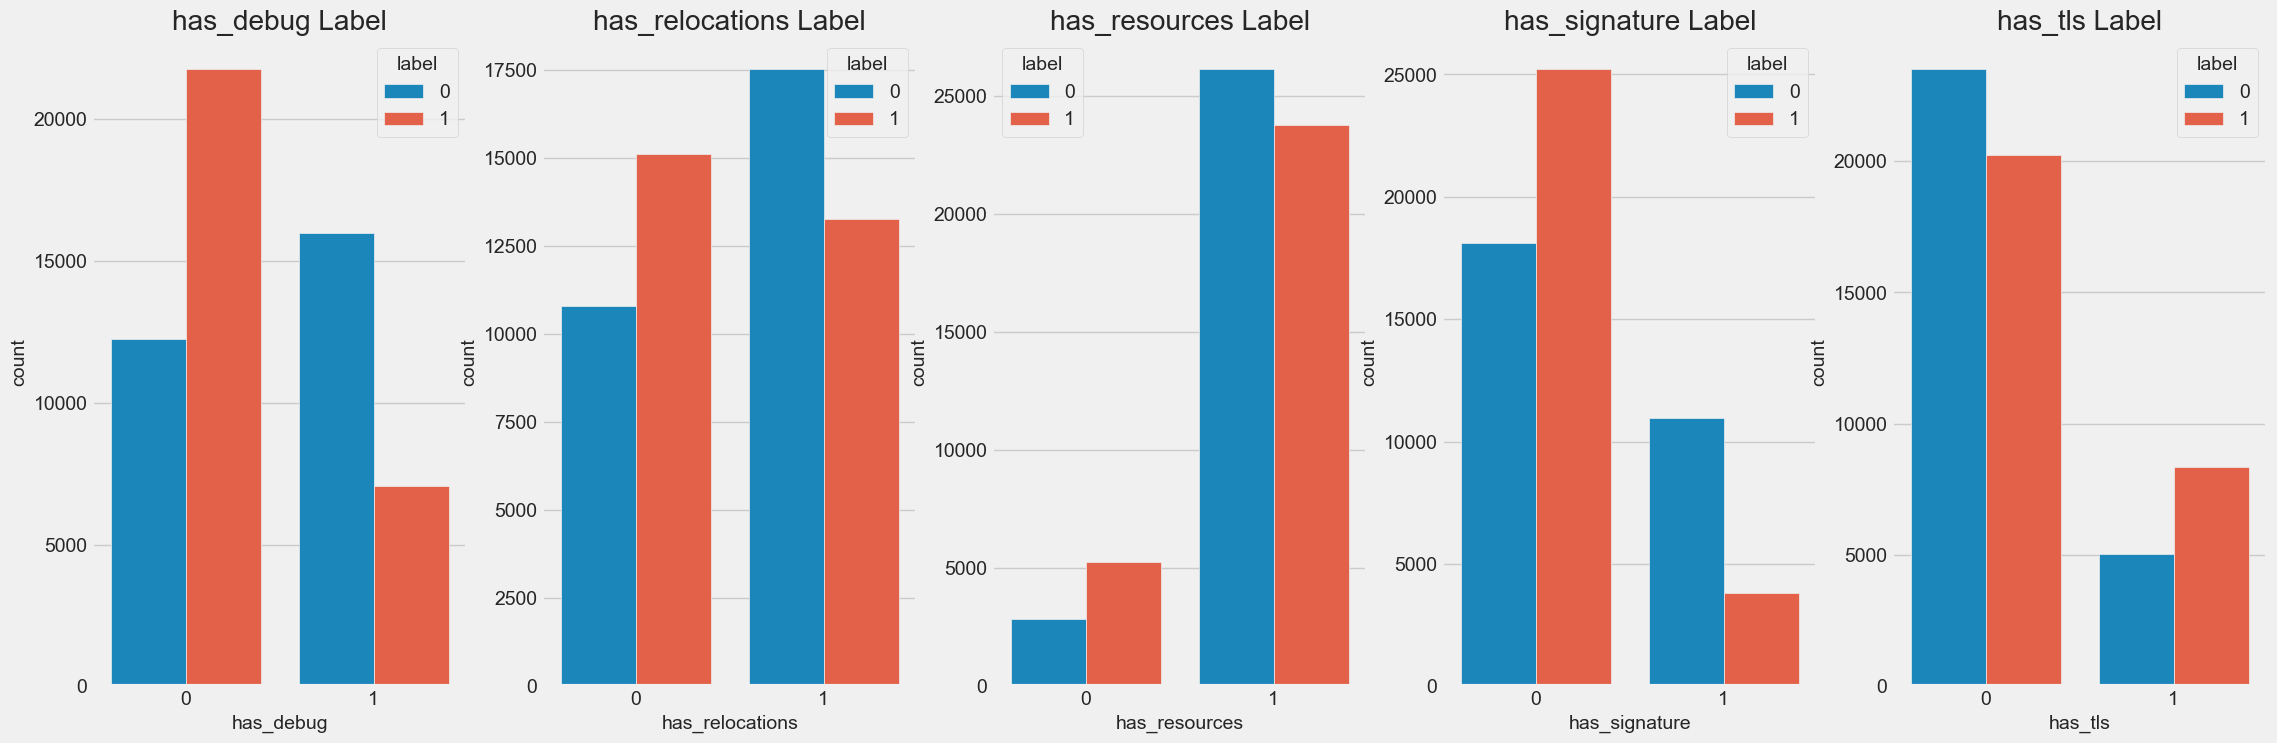

In [672]:
fig, ax = plt.subplots(1, 5, figsize=(25, 8), sharex=True)
train_copy = train.copy()

for i, col in enumerate(BINARY_COLUMNS[:-1]):
    sns.countplot(data=train_copy, x=col, hue='label', ax=ax[i]).set(title=f'{col} Label')

plt.xticks(np.arange(2), ("0", "1"))
plt.show()

* In general, we can see that most of our samples files don't have **Resources** and **Signature**, but do have **tls** (thread local storage)

* While comparing the graphs, we can see that the most significant difference is in the **has_debug** feature -
    * The samples without debug (has_debug=0) are much more likely to be malicious, while the samples with debug (has_debug=1) are much more likely to be benevolent.
    * Meaning - p(has_debuge = 0 | label = 1) > p(has_debuge = 1 | label = 1) and p(has_debuge = 1 | label = 0) > p(has_debuge = 0 | label = 0)
* We can see the same trend in the **has_relocations** feature (but it is not as strong as in the **has_debug** feature):
    * p(has_relocations = 0 | label = 1) < p(has_relocations = 1 | label = 1) and p(has_relocations = 1 | label = 0) > p(has_relocations = 0 | label = 0)



### Exploring the categorical columns:

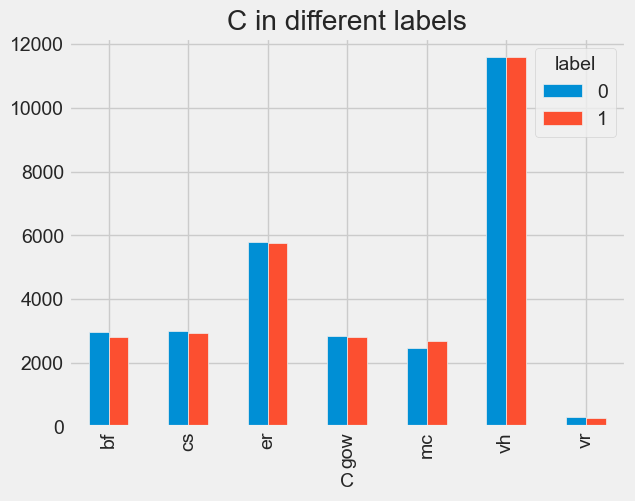

In [673]:
# C Column Explorization:
pd.crosstab(exploration_train['C'], exploration_train['label']).plot(kind='bar')
plt.title('C in different labels')
plt.show()

In [674]:
malicious_data = exploration_train[exploration_train['label'] == 1]
Benevolent_data = exploration_train[exploration_train['label'] == 0]
sns.countplot(data=malicious_data, x='C', ax=ax[0]).set(title='Column C count in malicious Files')
sns.countplot(data=Benevolent_data, x='C', ax=ax[1]).set(title='Column C count in Benevolent Files')
plt.show()

* The  graph doesn't tell us much, as we can see that for each C type, we have almost the same amount for both labels - which means the C feature can not be a good indicator for the label.


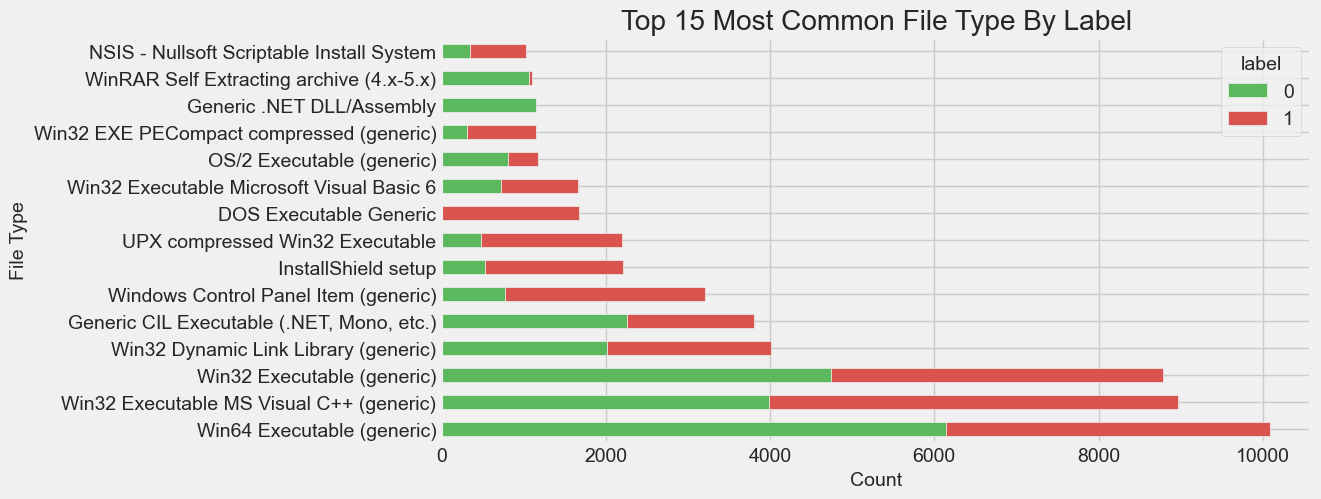

In [675]:
# File Type Column Explorization:
grouped_df = exploration_train.groupby(['file_type_trid', 'label']).size().reset_index(name='count')
pivot_df = grouped_df.pivot(index='file_type_trid', columns='label', values='count')
pivot_df['count'] = pivot_df.sum(axis=1)
sorted_pivot_df = pivot_df.sort_values(by='count', ascending=False).head(15)

ax = sorted_pivot_df.iloc[:, :2].plot(kind='barh', stacked=True, figsize=(10, 5), color=['#5cb85c', '#d9534f'])
ax.set_xlabel('Count')
ax.set_ylabel('File Type')
ax.set_title('Top 15 Most Common File Type By Label')
plt.show()

* First of all we can see that there are 3 major file types in our dataset: **Win64 Executable, Win32 Executable MS Visual C++ & Win32 Executable**
* We can also see that for the top 5 most common file types, the proportions between the malicious and belevonet files are pretty much the same
* For the other file types, the proportions are not the same, each type have a majority of malicious/benevolent files.
* Since the proportions are pretty much the same for the most common file types we can not determaine yet if this feature is a good indicator for the label

### Exploring The Numerical Columns:

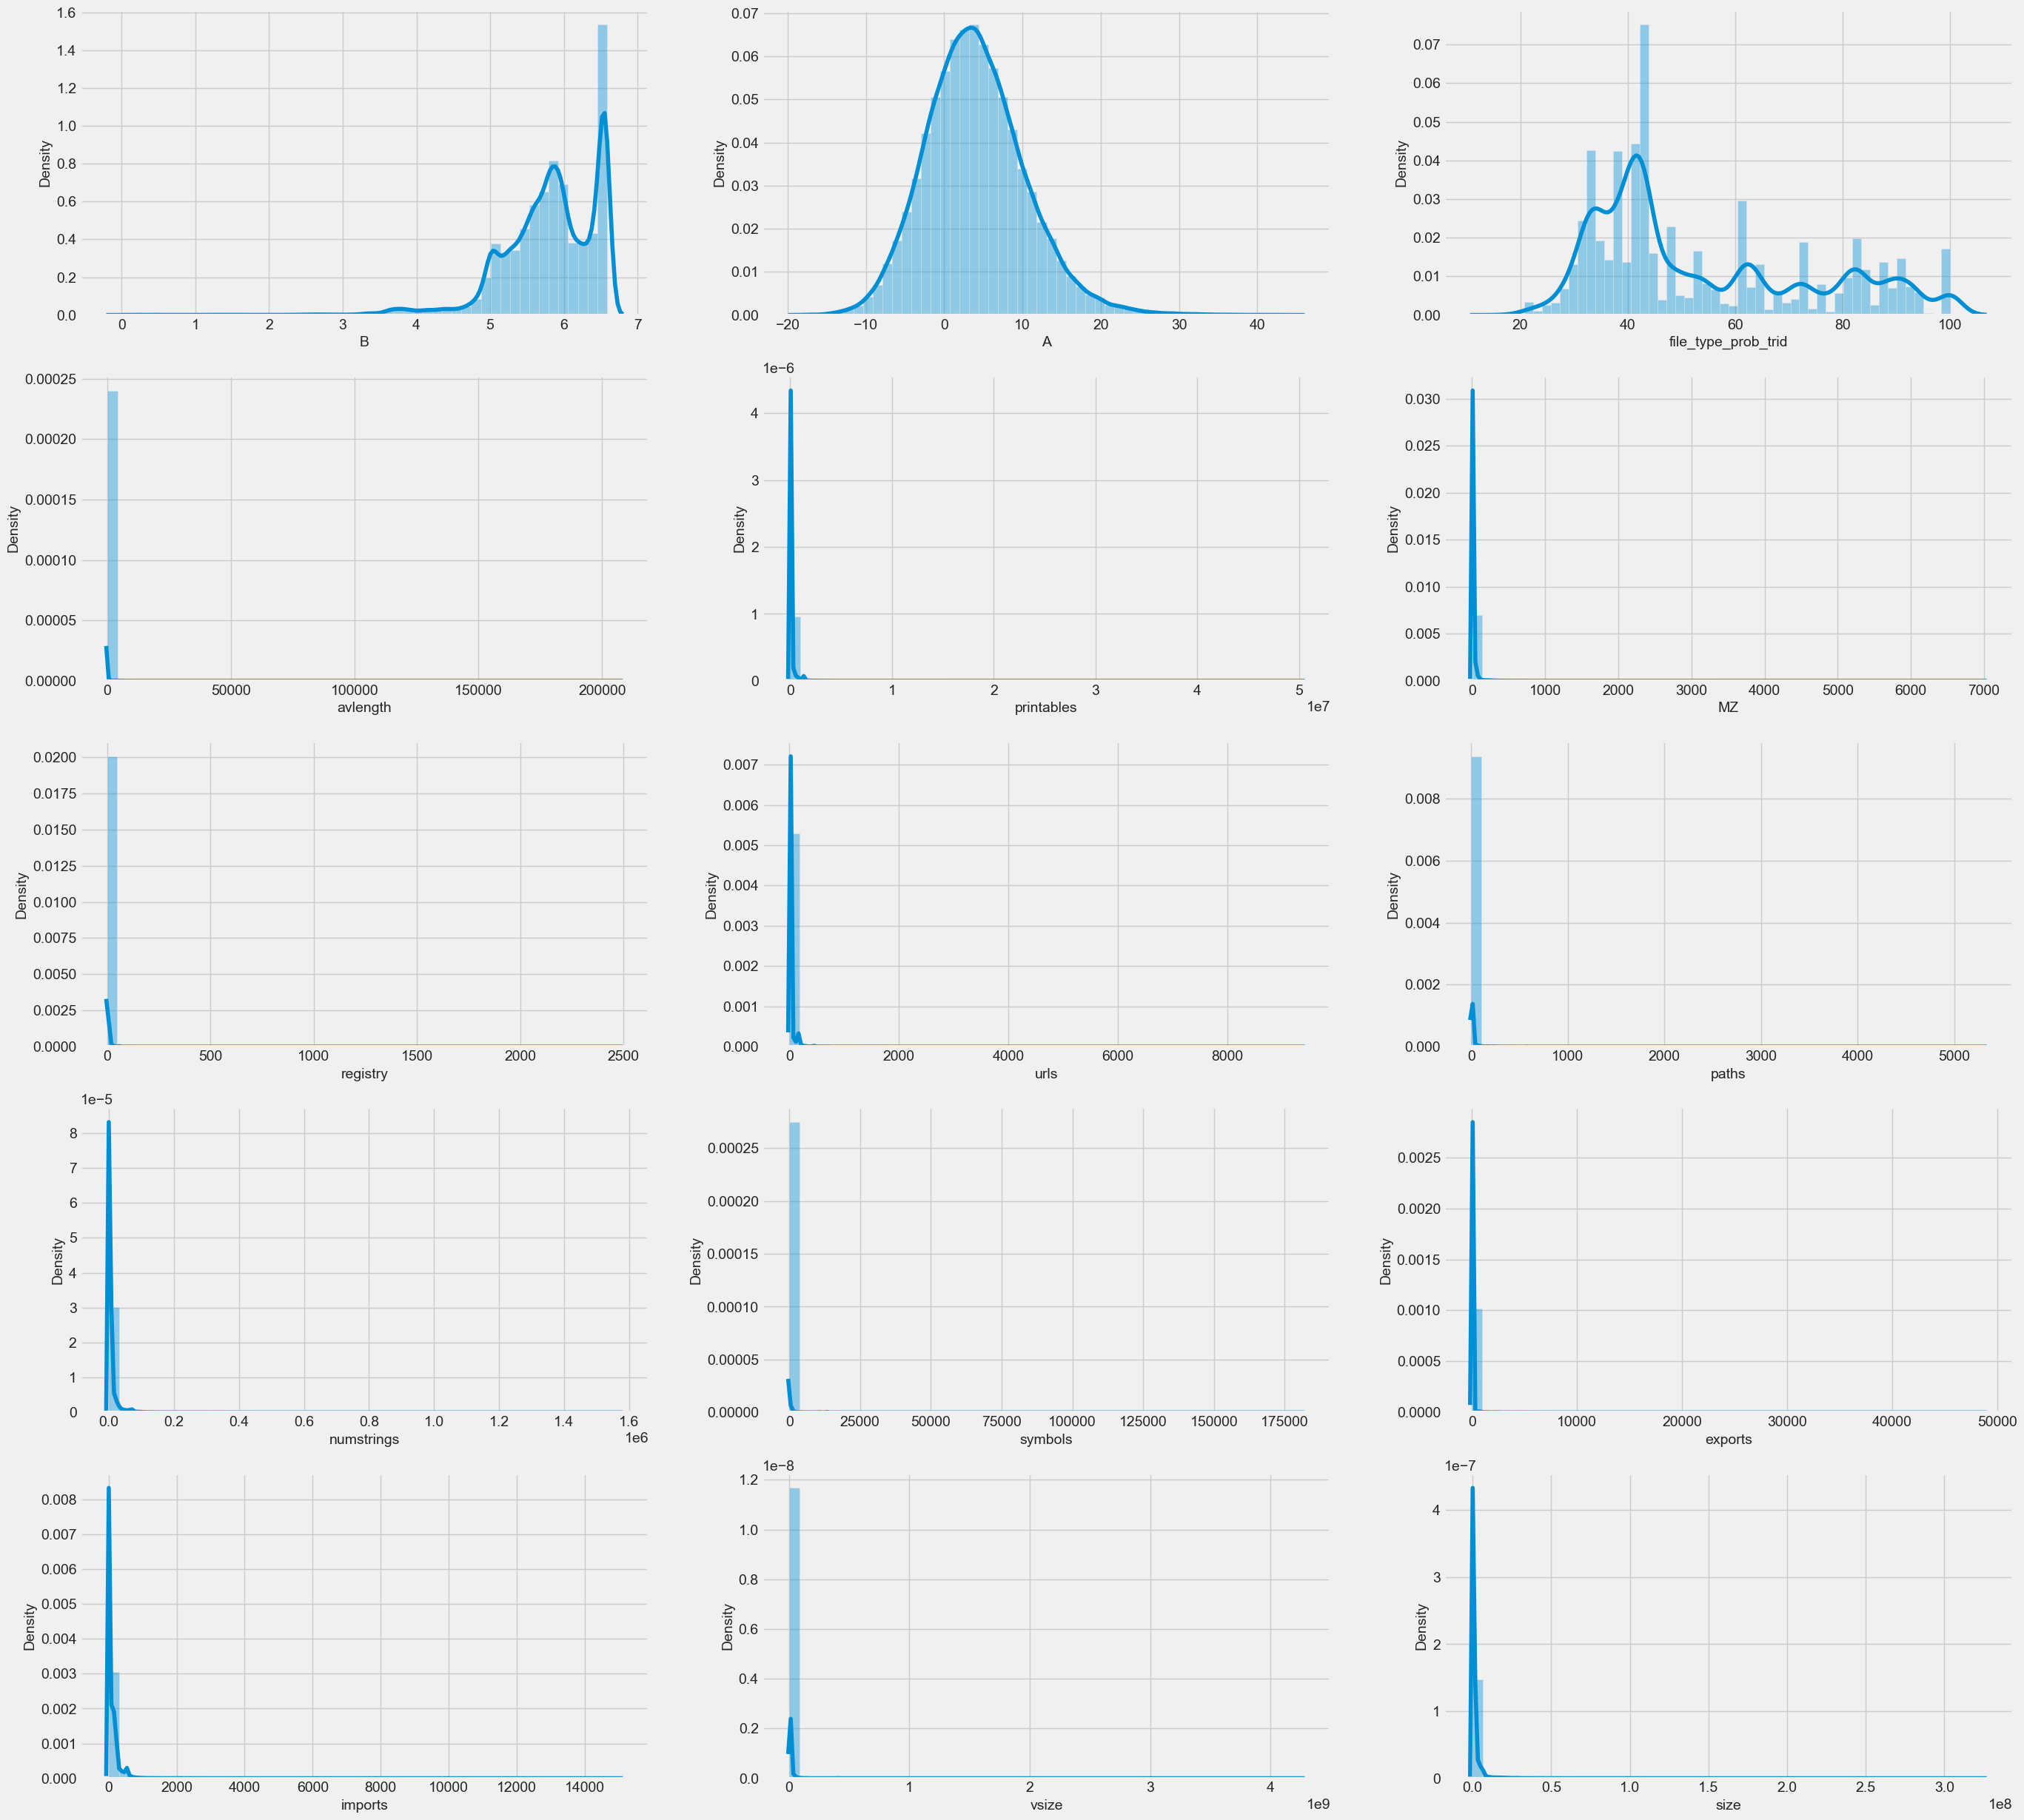

In [676]:
# Distribution of the numerical columns:
num_rows = 10
num_columns = 3
fig = plt.figure(figsize=(30, 60))

for index, column in enumerate(NUMERIC_COLUMNS[::-1], start=1):
    plt.subplot(num_rows, num_columns, index)
    sns.distplot(exploration_train[column])


* We can see that in most columns, specifically in - **size, vsize, import, export, symbols, numstring, paths, urls, registry, MZ, printables and avlength** - the peak forms at 0 and the graph is skewed towards the right side. It mean that we have outliers on the right side of the plot in these columns, we will handle it in the next sections.
* On the other hand, we can see that the **A** feauture distribution looks like a gaussian, very similiar to normal distribution (with slightly shifted towards the left) so normally distribution will be assumed.
* We can also see that the file_type_prob_trid feature has values between 0-100 (in percentages unit), and there are significant amount of ~40% probabilities files

We will now compare the numerical variables with the target variable using bar plot:

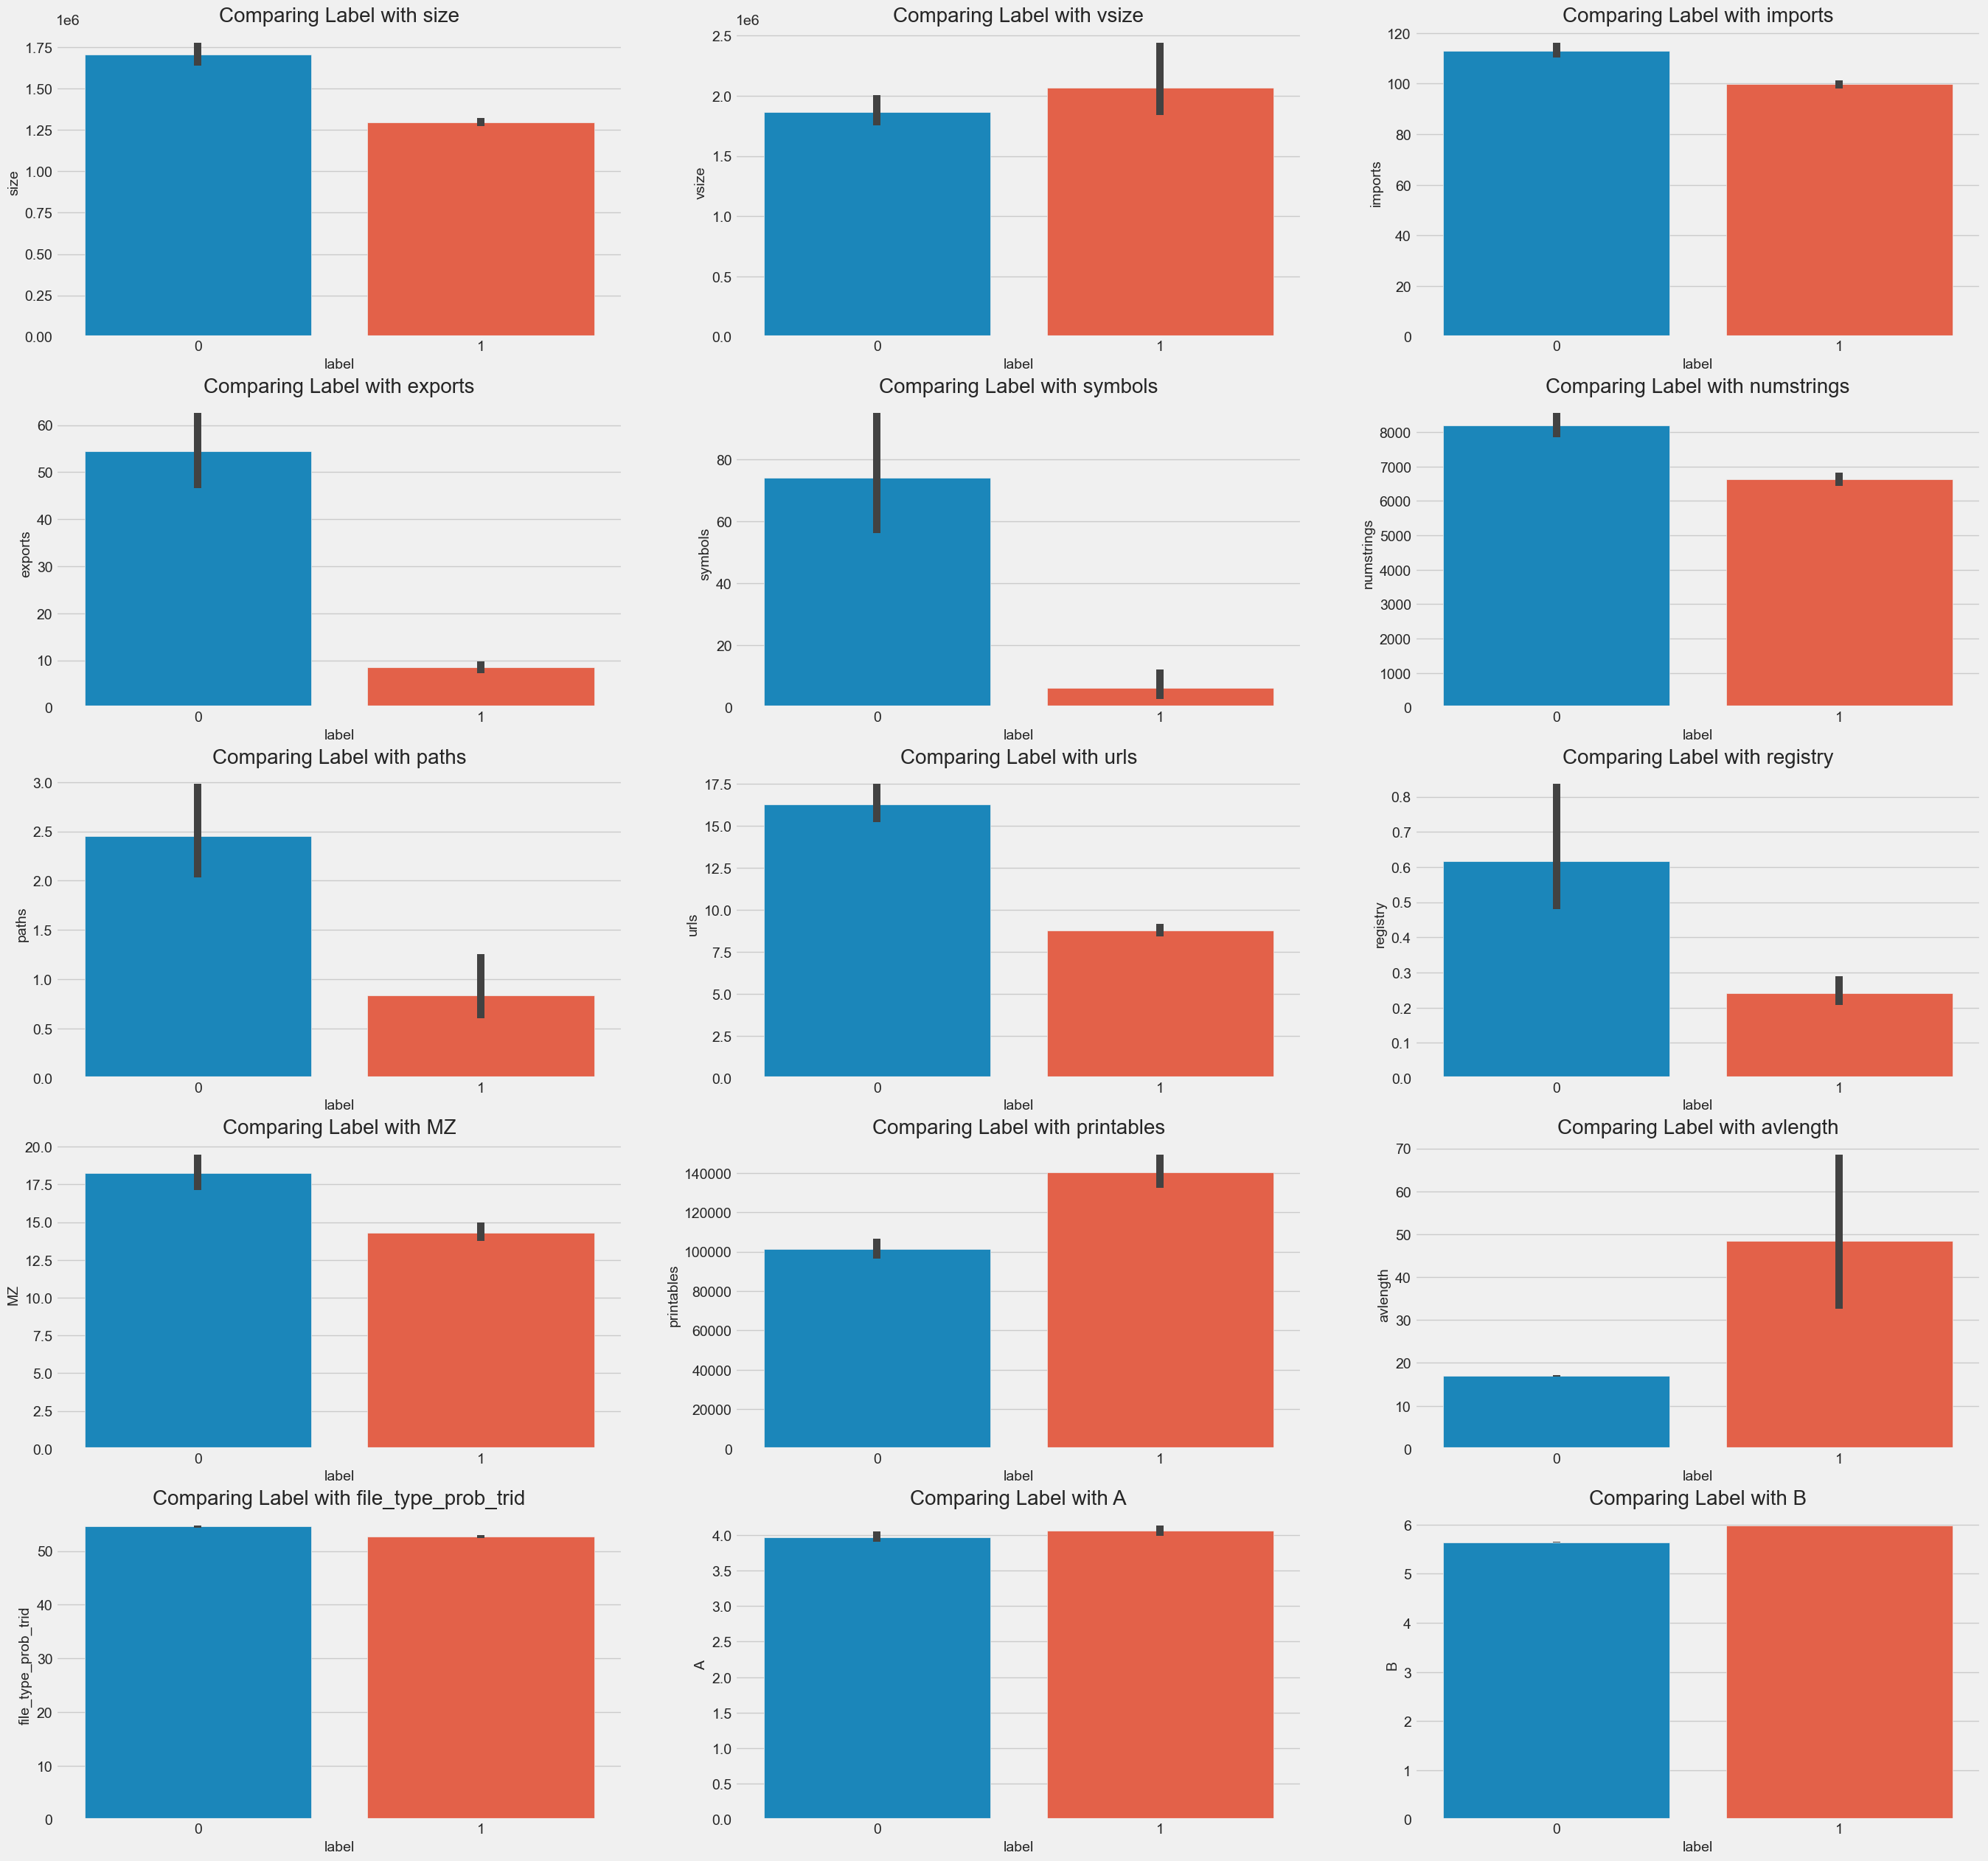

In [677]:
num_rows = 5
num_columns = 3
fig = plt.figure(figsize=(30, 30))

for index, column in enumerate(NUMERIC_COLUMNS, start=1):
    plt.subplot(num_rows, num_columns, index)
    plt.title(f"Comparing Label with {column}", size=20)
    plt.xlabel(column)
    sns.barplot(data = exploration_train, y=column, x='label', errorbar='ci')

* The above plots describe the mean value in each column for each label, and the error bar (the black line) describes the confidence interval of the mean.
* What we can understand from these barplots:

   * Most features have almost the same mean value for both labels: **size, vsize, imports, numstrings, MZ, printables, file_type_prob_trid, A & B**.
   * But, there are few features with significant difference:
   * For the **exports, symbols, paths, urls & registry** features -  the mean value for the benevolent files is higher than the malicious files, and the confidence interval for the mean is also higher for the malicious files. It means that these features might be a good indicator for the label.
   * The **avlength** features, is the only feature with a significant difference between the mean values in each label, that has a higher mean value for the malicious files amd also higher confidence interval for the malicious files.

### Check the **correlation** between the attributes:
First, we'll visualize the correlation matrix:

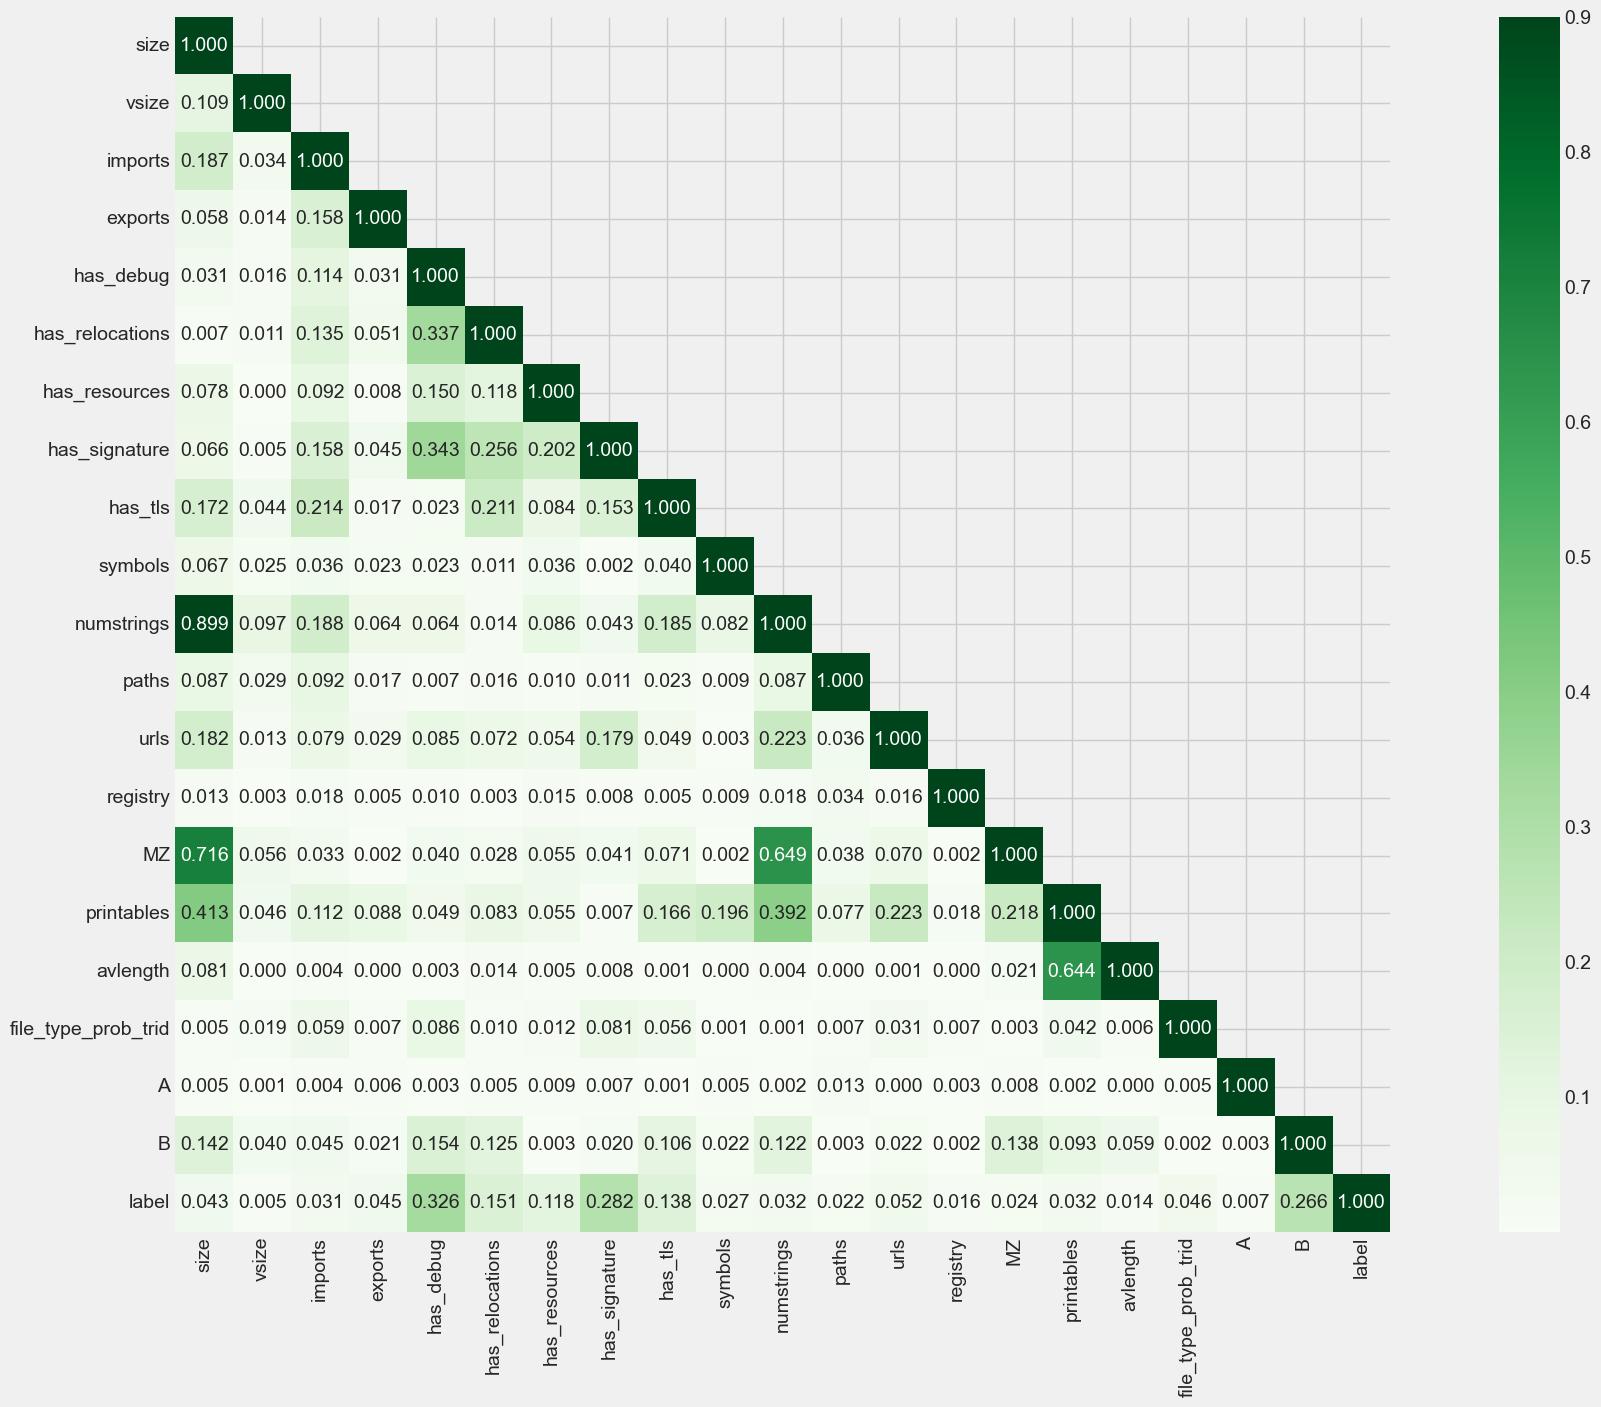

In [678]:
corr_matrix = exploration_train.corr(method = 'pearson').abs()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (25,15))
sns.heatmap(corr_matrix, mask = mask, vmax = 0.9, square = True, annot = True, fmt='.3f', cmap="Greens")
plt.show()

What we can understand from the correlation matrix:
- **size** is highly correlated with numstrings, MZ, and moderately correlated with printables - which makes sense due to the meaning of these attributes
- **has_debug** is moderately correlated with has_relocation, has signature, label and B
- **numstring** is strongly correlated with MZ and printables
- **avlength** is strongly correlated with printables

Now let's focus on the correlation to the Label feature, and plot the top positive/negative correlations:

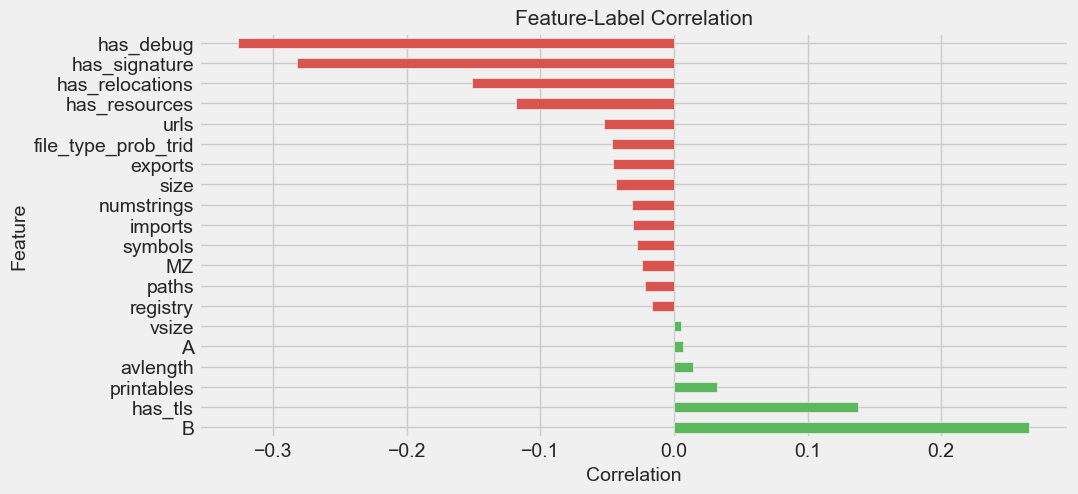

In [679]:
correlations_mat = exploration_train.corr()['label'].sort_values()
sorted_mat = correlations_mat[:-1].sort_values(ascending=False)

colors = ['#5cb85c' if sorted_mat[f] > 0 else '#d9534f' for f in range(len(sorted_mat))]
ax = correlations_mat[:-1].sort_values(ascending=False).plot(kind='barh', figsize=(10, 5), color=colors)
ax.set_xlabel('Correlation')
ax.set_ylabel('Feature')
ax.set_title('Feature-Label Correlation', size=15)
plt.show()

* What we can understand from the above plot:
    * There's a strong positive correlation between the **B** feature to the label, and more moderate (but relatively strong) correlation with the **has_tls** feature
    * There's even a stronger negative correlation between the **has_debug** & **has_signature** features to the label
    * There are also moderate negative correlations between the **has_relocations** & **has_resources** features to the label

* We can use these correlations in order to perform feature selection later on

**Now we will dive deeper into the correlation between the size and vsize features:**
* While trying to see the Size and Vsize column's distributions, we found out it's hard to understand the distribution since the columns are not scaled.
* We found out that using the mathematical manipulation Log(), helps us see the distributions better, as seen in the graphs below:

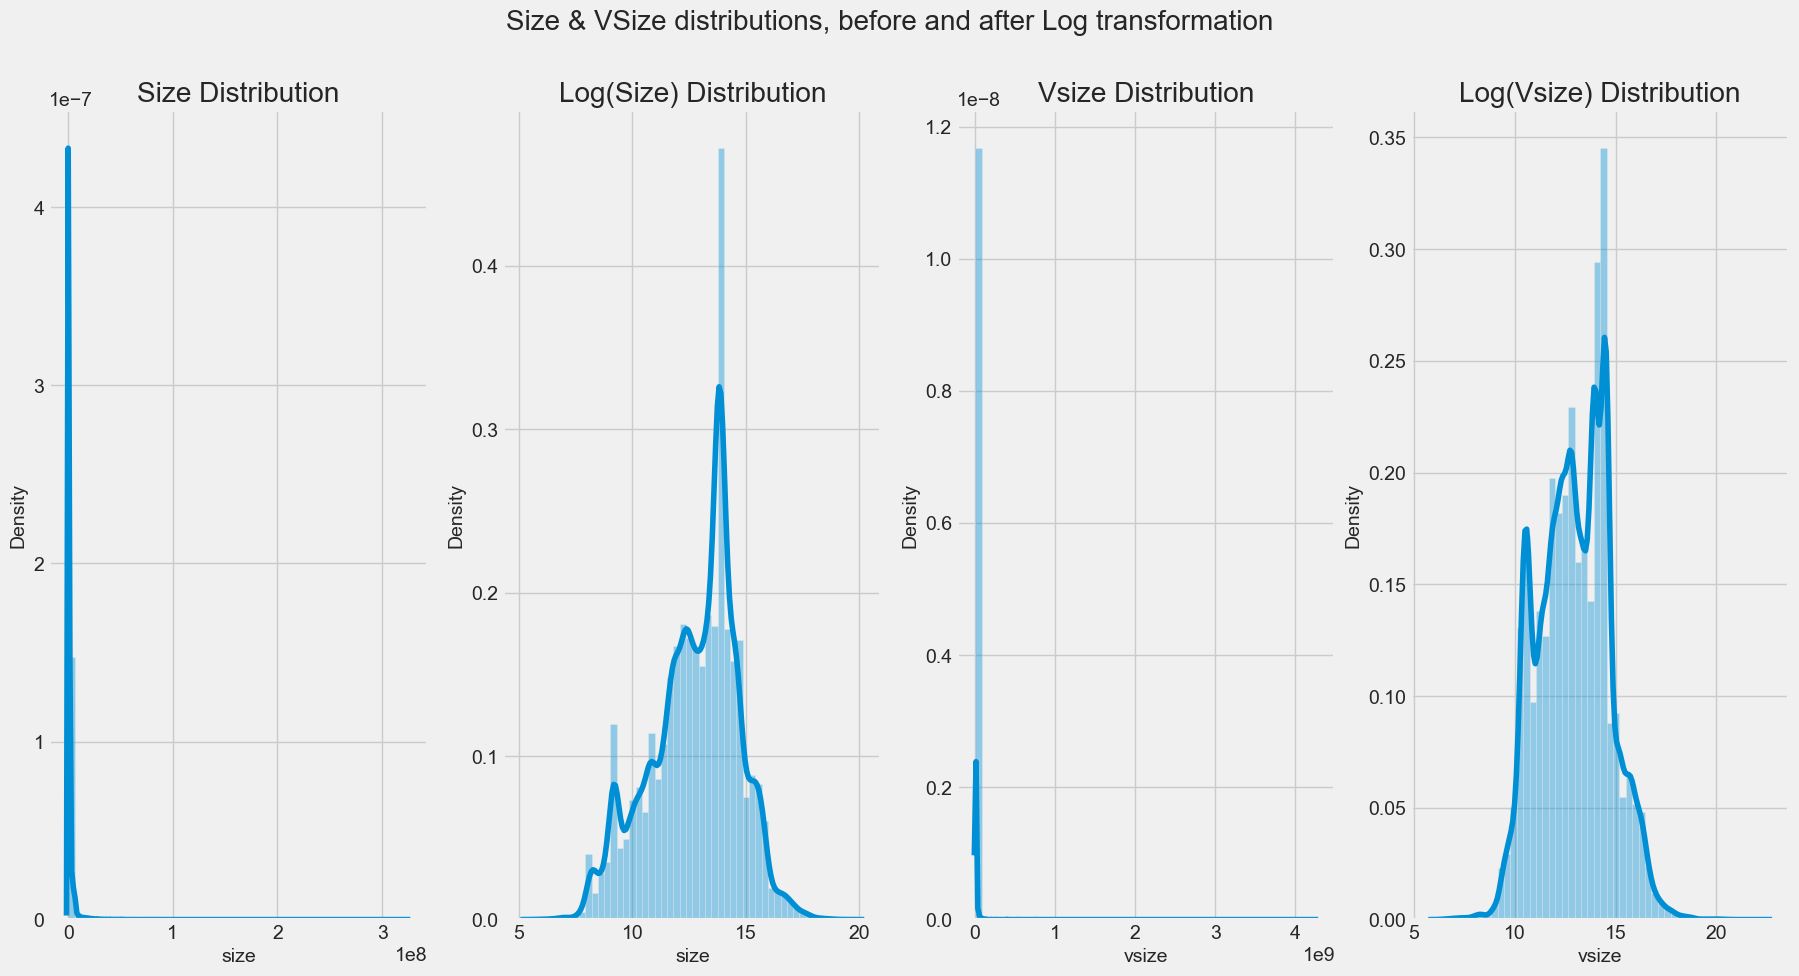

In [680]:
log_df = exploration_train.copy()
log_df['size'] = np.log(exploration_train['size'])
log_df['vsize'] = np.log(exploration_train['vsize'])

figure, axs = plt.subplots(1, 4, figsize=(20,10), sharex=False)

sns.distplot(exploration_train['size'], ax=axs[0]).set_title('Size Distribution')
sns.distplot(log_df['size'], ax=axs[1]).set_title('Log(Size) Distribution')
sns.distplot(exploration_train['vsize'], ax=axs[2]).set_title('Vsize Distribution')
sns.distplot(log_df['vsize'], ax=axs[3]).set_title('Log(Vsize) Distribution')

# main title to the graph:
figure.suptitle('Size & VSize distributions, before and after Log transformation', size=20)
plt.show()

 * We will now visualize the correlation between size & vsize.
* We expect to see a linear line (or close to it), since the 2 values should represent pretty much the same value:

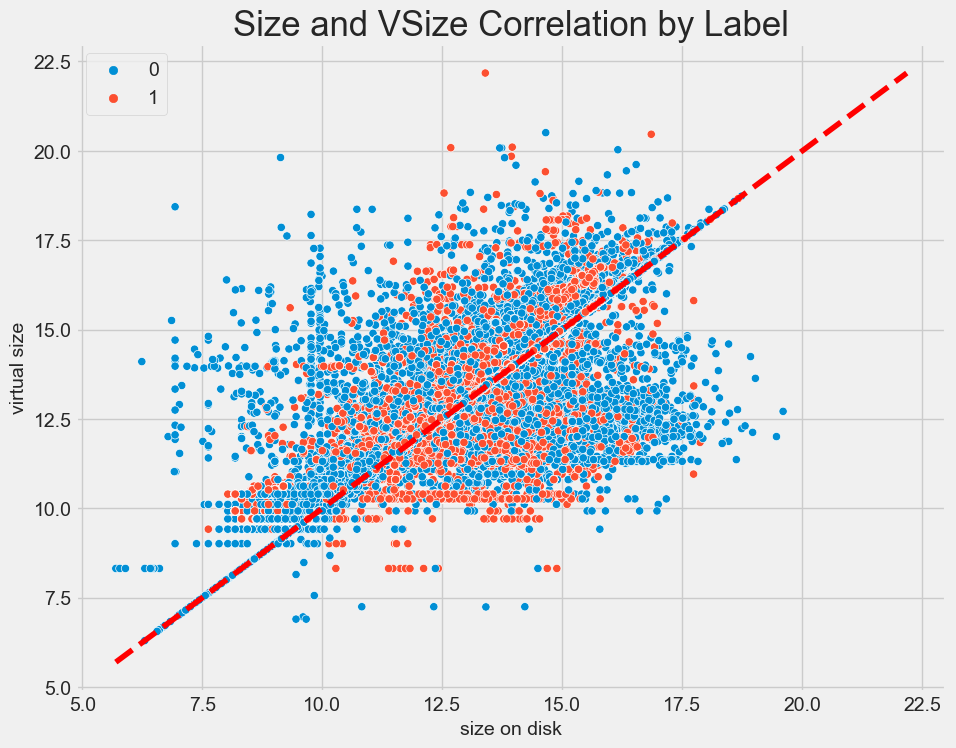

In [681]:
# Showing the correlation between the size and vsize by label:
size_on_disk = log_df['size']
virtual_size = log_df['vsize']

plt.figure(figsize=(10,8))
sns.scatterplot(data=exploration_train, x=size_on_disk, y=virtual_size, hue=exploration_train['label'])
plt.legend(loc='upper left')
plt.xlabel('size on disk')
plt.ylabel('virtual size')
plt.title('Size and VSize Correlation by Label', size=25)
plt.plot([min(size_on_disk), max(virtual_size)], [min(size_on_disk), max(virtual_size)], color='red', linestyle='--')
plt.show()#Linear Vector

* We can see in the graph that most of the malicious files (orange points) are located around the linear line - meaning in these files the correlation between size and vsize is nearly linear.
* On the other hand, we can see that there are a more significant amount of benevolent files (blue points) that are located farther from the linear line, meaning the correlation is not exactly linear.
* Maybe, the difference between these features can help us with the classification, since it seems like malicious files have less difference between the 2 features.
* For conclusion, the relation between size and vsize verify depends on some more factors.

Now, we'll focus on the file_type_prob_trid, which is the probability that this is the real file type.

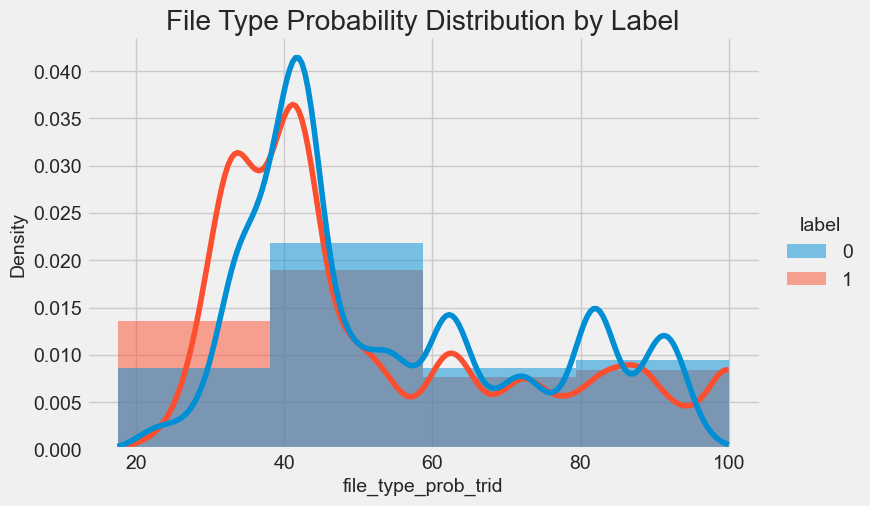

In [682]:
sns.displot(data=exploration_train, x='file_type_prob_trid', hue='label', bins=4, linewidth=0, kde=True, stat="density",
            common_norm=False, height=5, aspect=1.6).set(title='File Type Probability Distribution by Label')
plt.show()

* We can see that the probabilites are pretty much the same for both labels so we won't conclude much from that.
* In general, most of the files probabilities have values in the range between 40-60%.
* We can also see that for Malicious files (orange histogram), the files types probabilites are lower than the benevolent files, it means that we have less certainty of the file type when we look at malicious files.


# Part 2: Pre-Processing

In [683]:
X_train, X_test = train_test_split(exploration_train, test_size=0.2, random_state=42)

In [684]:
preprocessing_train = X_train.copy()
preprocessing_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47957 entries, 2ac05a276d093c81f028ed55f7796f4ea0f717c73ff05a01bc6a767d4b91c9c7 to ec7448896932583f8515f663fbc7a25139636c8707c51cda14e3b73c40e415d1
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   size                 47957 non-null  int64  
 1   vsize                46435 non-null  float64
 2   imports              46595 non-null  float64
 3   exports              46303 non-null  float64
 4   has_debug            45616 non-null  float64
 5   has_relocations      45315 non-null  float64
 6   has_resources        46377 non-null  float64
 7   has_signature        46425 non-null  float64
 8   has_tls              45602 non-null  float64
 9   symbols              45844 non-null  float64
 10  numstrings           45777 non-null  float64
 11  paths                45022 non-null  float64
 12  urls                 46104 non-null  float64
 13  registry           

# Dealing with NULL values:

We will start the by looking at the percentage of missing values in each column to understand better how much null values we have to deal with:

In [685]:
preprocessing_train.isnull().sum()

size                      0
vsize                  1522
imports                1362
exports                1654
has_debug              2341
has_relocations        2642
has_resources          1580
has_signature          1532
has_tls                2355
symbols                2113
numstrings             2180
paths                  2935
urls                   1853
registry               1995
MZ                     2459
printables             2170
avlength               2191
file_type_trid            0
file_type_prob_trid       0
A                      2903
B                      3010
C                      1659
label                     0
dtype: int64

In [686]:
def check_null_percent(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    mis_val_table = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
    mis_val_table_ren_columns = mis_val_table.rename(columns={'Total': 'Total Missing Values', 'Percentage': 'Percentage'})
    return mis_val_table_ren_columns

check_null_percent(preprocessing_train)

Total Missing Values  Percentage
B                                    3010    6.276456
paths                                2935    6.120066
A                                    2903    6.053339
has_relocations                      2642    5.509102
MZ                                   2459    5.127510
has_tls                              2355    4.910649
has_debug                            2341    4.881456
avlength                             2191    4.568676
numstrings                           2180    4.545739
printables                           2170    4.524887
symbols                              2113    4.406030
registry                             1995    4.159977
urls                                 1853    3.863878
C                                    1659    3.459349
exports                              1654    3.448923
has_resources                        1580    3.294618
has_signature                        1532    3.194528
vsize                                1522    3.173676
imports                              1362    2.840044
size                                    0    0.000000
file_type_prob_trid                     0    0.000000
file_type_trid                          0    0.000000
label                                   0    0.000000

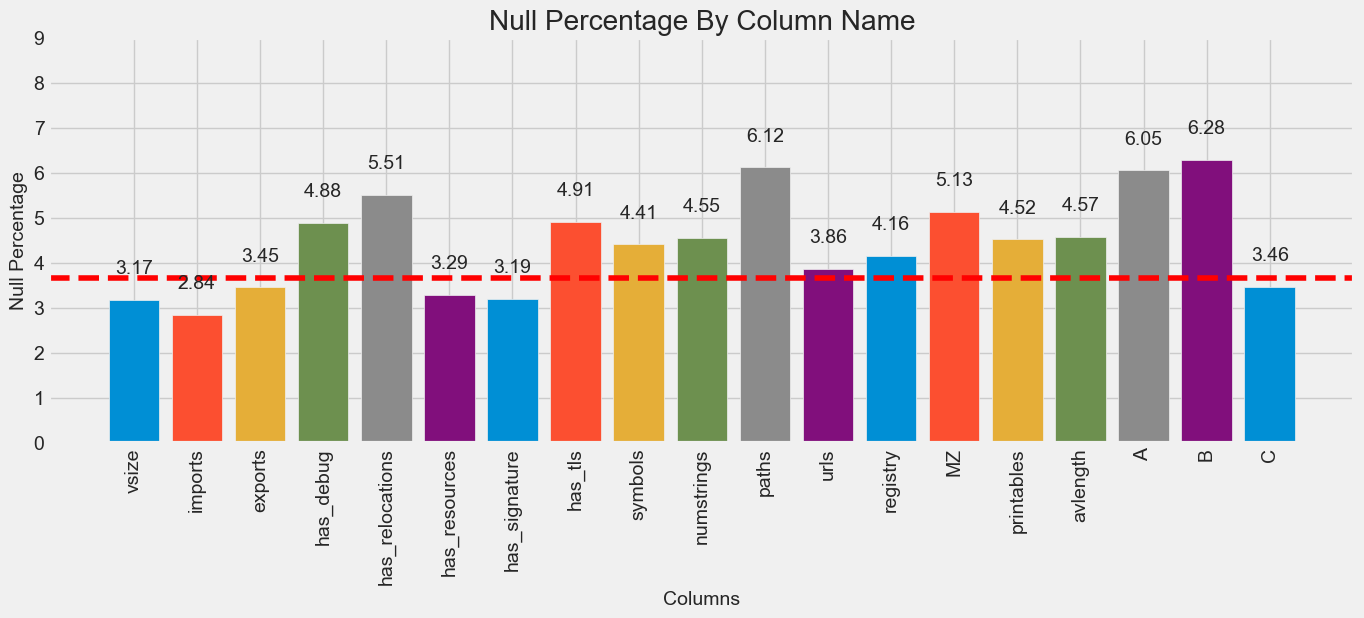

In [687]:
null_percentage = preprocessing_train.isna().mean().round(4) * 100
f, ax = plt.subplots()
for i, (key, value) in enumerate(null_percentage[null_percentage > 0].items()):
    ax.bar(key, value, label=key)
    ax.text(i, value + 0.5, str(np.round(value, 2)), ha='center', va='bottom')

plt.ylim(0, 9)
plt.ylabel('Null Percentage')
plt.xlabel('Columns')
plt.title('Null Percentage By Column Name')
f.set_size_inches(15, 5)
plt.xticks(rotation=90)
plt.axhline(y=np.nanmean(null_percentage), color='r', linestyle='--', label='Average')
plt.show()



We noticed that the columns with the highest NULL values are: **B & Paths**
We want to preserve as many examples as we can that minimize bias and "over-fitting".

First, we will try to remove the missing values and see how the size of the dataset will be affected.

In [688]:
new_size = round((preprocessing_train.dropna().shape[0] / preprocessing_train.shape[0]) * 100, 2)
print(f"After removing the rows with the NULLs values, the new shape of the df is: {preprocessing_train.dropna().shape}, this is {new_size}% of the original size")

After removing the rows with the NULLs values, the new shape of the df is: (20188, 23), this is 42.1% of the original size


In [689]:
from itertools import combinations


def get_correlated_groups(df: pd.DataFrame, K: int, correlation_threshold=0.6):
    corr_matrix = df.corr(method='pearson').abs()
    correlated_groups = []

    # Generate all combinations of size K from the column names
    column_combinations = combinations(df.columns, K)

    for cols in column_combinations:
        # Check if all columns in the combination are highly correlated
        if all(corr_matrix.loc[col1, col2] > correlation_threshold for col1, col2 in combinations(cols, 2)):
            correlated_groups.append(cols)

    return correlated_groups


correlated_groups = [item for k in range(2, preprocessing_train[NUMERIC_COLUMNS].shape[1])[
    ::-1] for item in get_correlated_groups(preprocessing_train[NUMERIC_COLUMNS], K=k)]
print(correlated_groups)

[('size', 'numstrings', 'MZ'), ('size', 'numstrings'), ('size', 'MZ'), ('numstrings', 'MZ'), ('printables', 'avlength')]


In [690]:
def fill_missing_values(df: pd.DataFrame, train_df: pd.DataFrame = None, correlated_groups: List[Tuple[str]] = None):
    # use train_df to not check inside test_df while filling its missing values
    df = df.copy()
    train_df = train_df.copy() if train_df is not None else df
    correlated_groups = correlated_groups or []
    for column_to_fill in df.columns:
        # Check if the column_to_fill exists in any of the correlation tuples
        for correlation_tuple in correlated_groups:
            if column_to_fill in correlation_tuple:
                # Iterate over each row in the DataFrame
                for index, row in df.iterrows():
                    if pd.isnull(row[column_to_fill]):
                        # Iterate over the correlation tuples in reverse order
                        for group in correlated_groups:
                            if column_to_fill in group:
                                matching_row = None
                                matching_columns = []

                                # Iterate over the correlated columns to find a matching row
                                for correlated_column in group:
                                    if correlated_column != column_to_fill:
                                        matching_rows = train_df[
                                            (train_df[column_to_fill].notnull()) &
                                            (train_df[correlated_column] == row[correlated_column])
                                        ]

                                        if len(matching_rows) > 0:
                                            matching_row = matching_rows.iloc[0]
                                            matching_columns.append(correlated_column)

                                if matching_row is not None:
                                    # Fill the missing value with the corresponding value from the matching row
                                    df.at[index, column_to_fill] = matching_row[column_to_fill]

                                    break  # Stop iterating over correlation tuples

                break  # Stop iterating over correlation tuples
    return df

In [691]:
before = preprocessing_train.isnull().sum()
preprocessing_train = fill_missing_values(preprocessing_train, correlated_groups=correlated_groups)
after = preprocessing_train.isnull().sum()
print("Nulls that were removed:")
(after - before)[(after - before) < 0]

Nulls that were removed:


numstrings   -2115
MZ           -2159
printables    -520
avlength     -1061
dtype: int64

we can see that removing all of the missing values will reduce the size of the dataset to less than its half original size. That's too much and can damage our predictions.

* Instead, we are going to delete missing values of features that have good correlation with the label column (according to previous analysis)
* For less significant (less correlated to the label) features we will try 3 methods of replacing the missing values:
    * Replace the NULL values in each column by the median value of this column
    * Replace the NULL values in each column by the most frequent value in this column
    * Replace the NULL values in each column using KNN



**We choose to handle the NULL values in that approach in order to avoid biased predictions towards self generated values.**

In [692]:
preprocessing_train.isnull().sum()

size                      0
vsize                  1522
imports                1362
exports                1654
has_debug              2341
has_relocations        2642
has_resources          1580
has_signature          1532
has_tls                2355
symbols                2113
numstrings               65
paths                  2935
urls                   1853
registry               1995
MZ                      300
printables             1650
avlength               1130
file_type_trid            0
file_type_prob_trid       0
A                      2903
B                      3010
C                      1659
label                     0
dtype: int64

**Now we will deal with the rest of the features (less correlated to the label features):**
* We will use the Imputer function from the sklearn package to try the 3 different methods of filling NA values in our data.
* Then, we will compare between the methods and decide which one we should use:

In [693]:
imputers = {}

def imputer_implementation(df, strategy, cols=NUMERIC_COLUMNS, reset=False):
    df_copy = df.copy()
    # numeric_columns = df.select_dtypes(include=np.number).columns
    cols_key = tuple(set(cols))

    if cols_key not in imputers.keys():
        imputers[cols_key] = {}

    if reset or strategy not in imputers[cols_key].keys():
        imputers[cols_key][strategy] = KNNImputer(n_neighbors=4, weights="uniform") if strategy == 'KNN' else SimpleImputer(strategy=strategy)
        imputers[cols_key][strategy].fit(df_copy[cols])

    # Perform imputation on the numeric columns only
    # df_copy[numeric_columns] = imputer.fit_transform(df_copy[numeric_columns])
    df_copy[cols] = imputers[cols_key][strategy].transform(df_copy[cols])

    return df_copy

In [694]:
numeric_columns = preprocessing_train.select_dtypes(include=np.number).columns
# Replacing the missing values using the “mean” strategy:
remove_nulls_median = imputer_implementation(preprocessing_train, 'median', cols=numeric_columns)
# Replacing the missing values with the most frequently-occurring value:
remove_nulls_frequent = imputer_implementation(preprocessing_train, 'most_frequent', cols=numeric_columns)
# Replacing the missing values with the KNN imputer:
remove_nulls_knn = imputer_implementation(preprocessing_train, 'KNN', cols=numeric_columns)

showing differance between imputers for column:  has_debug


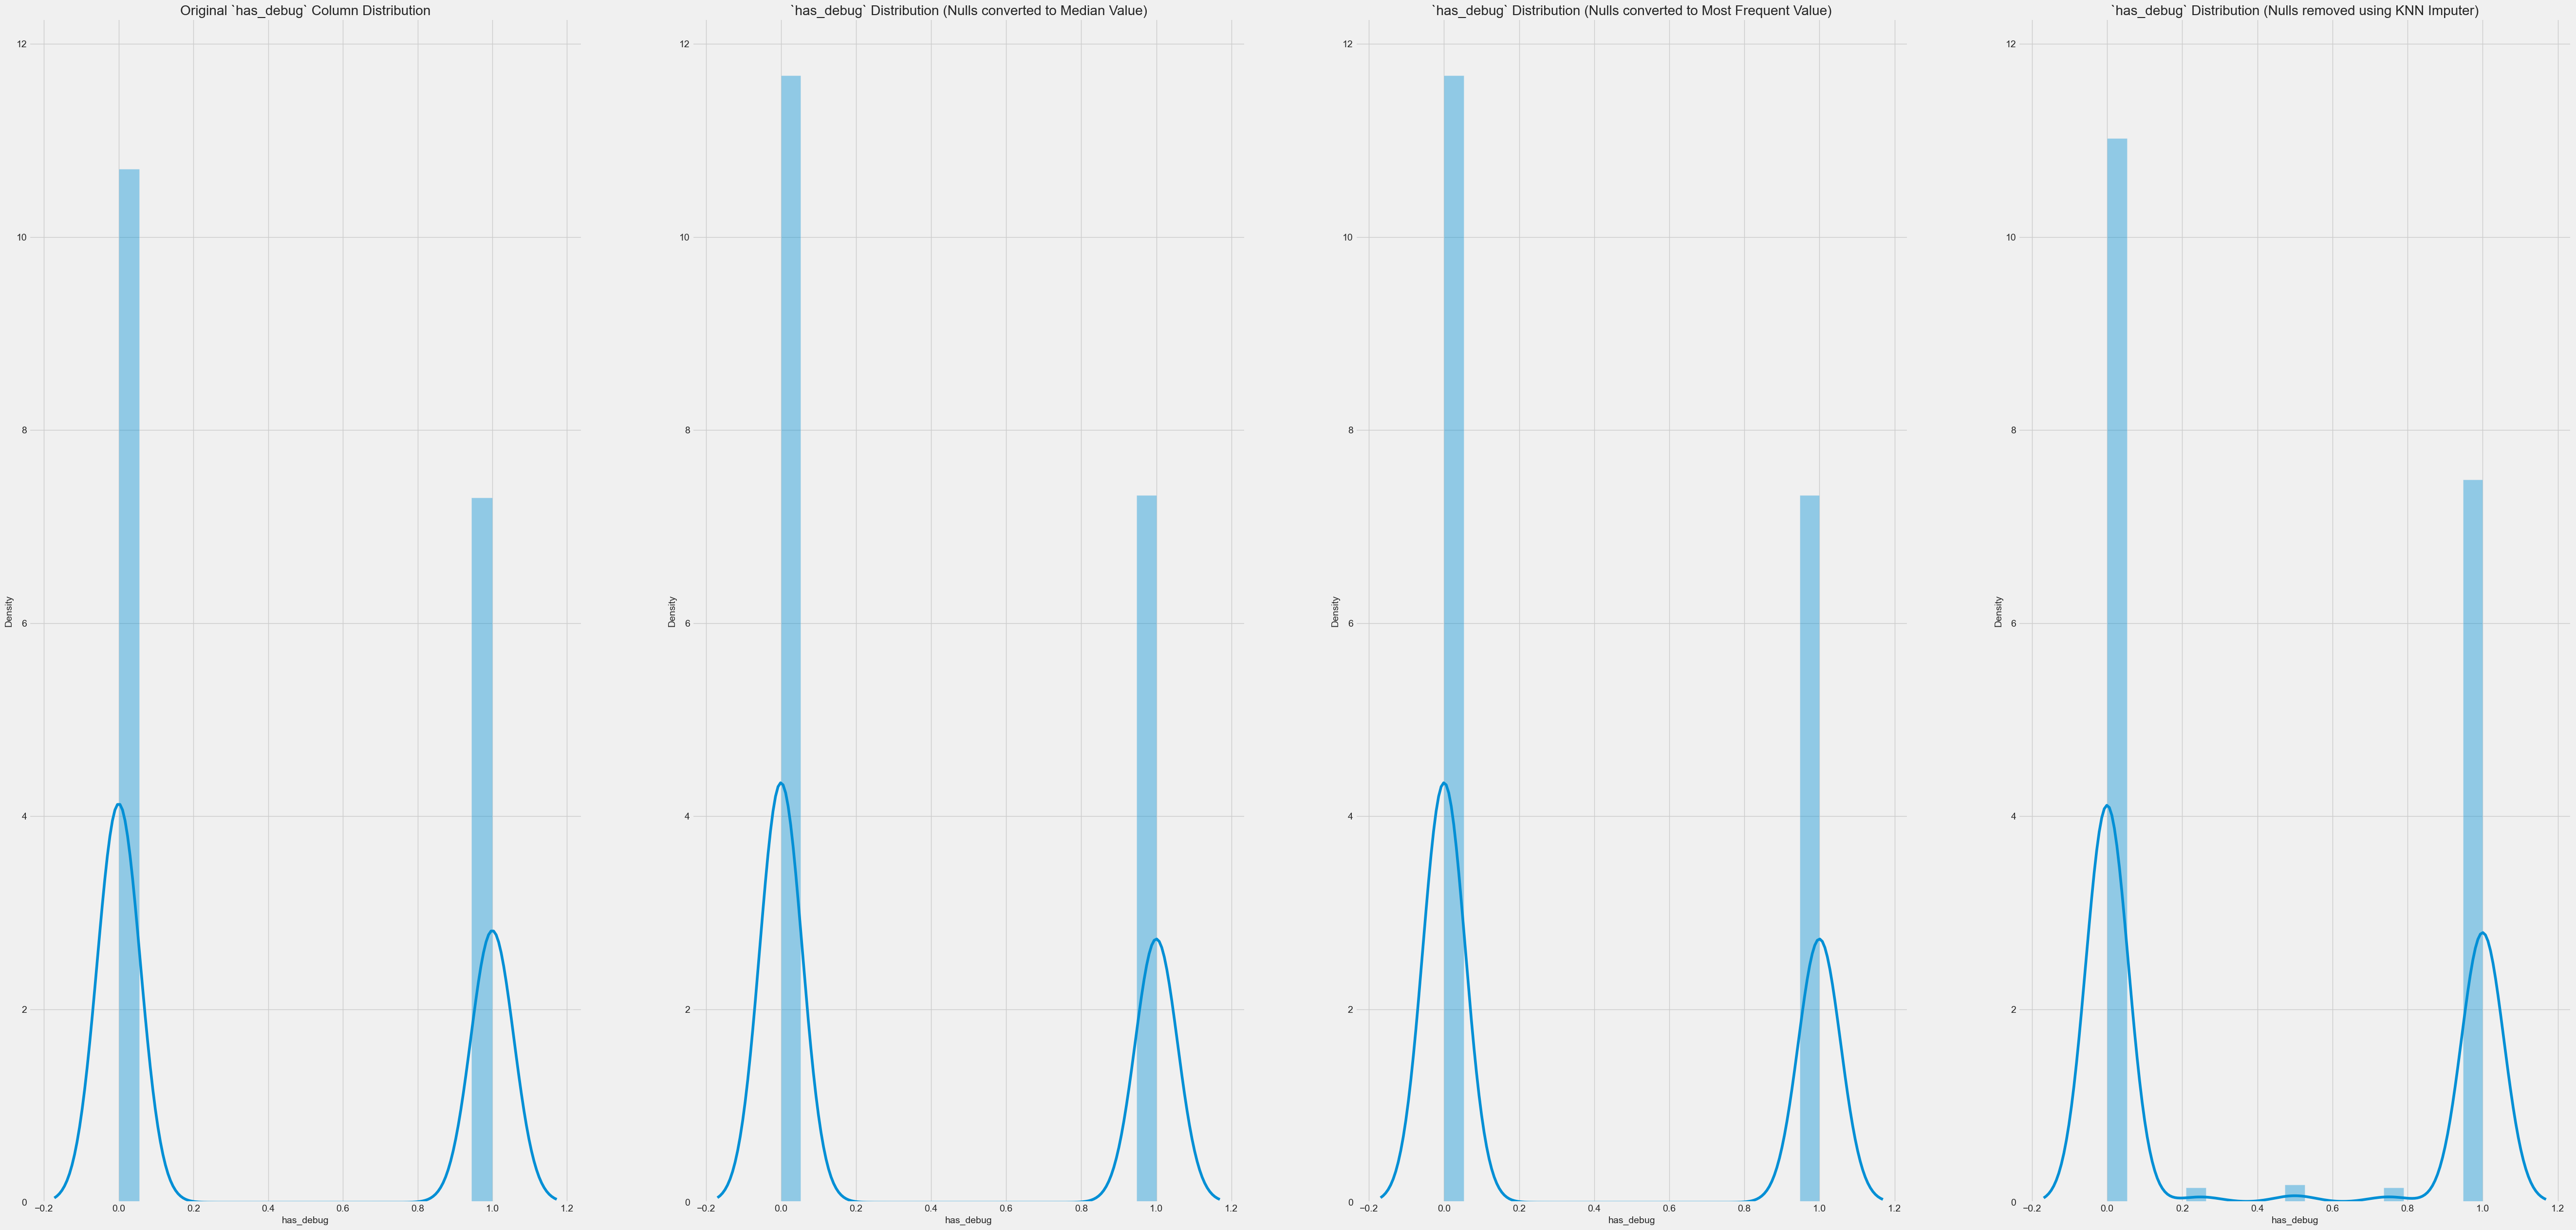

showing differance between imputers for column:  A


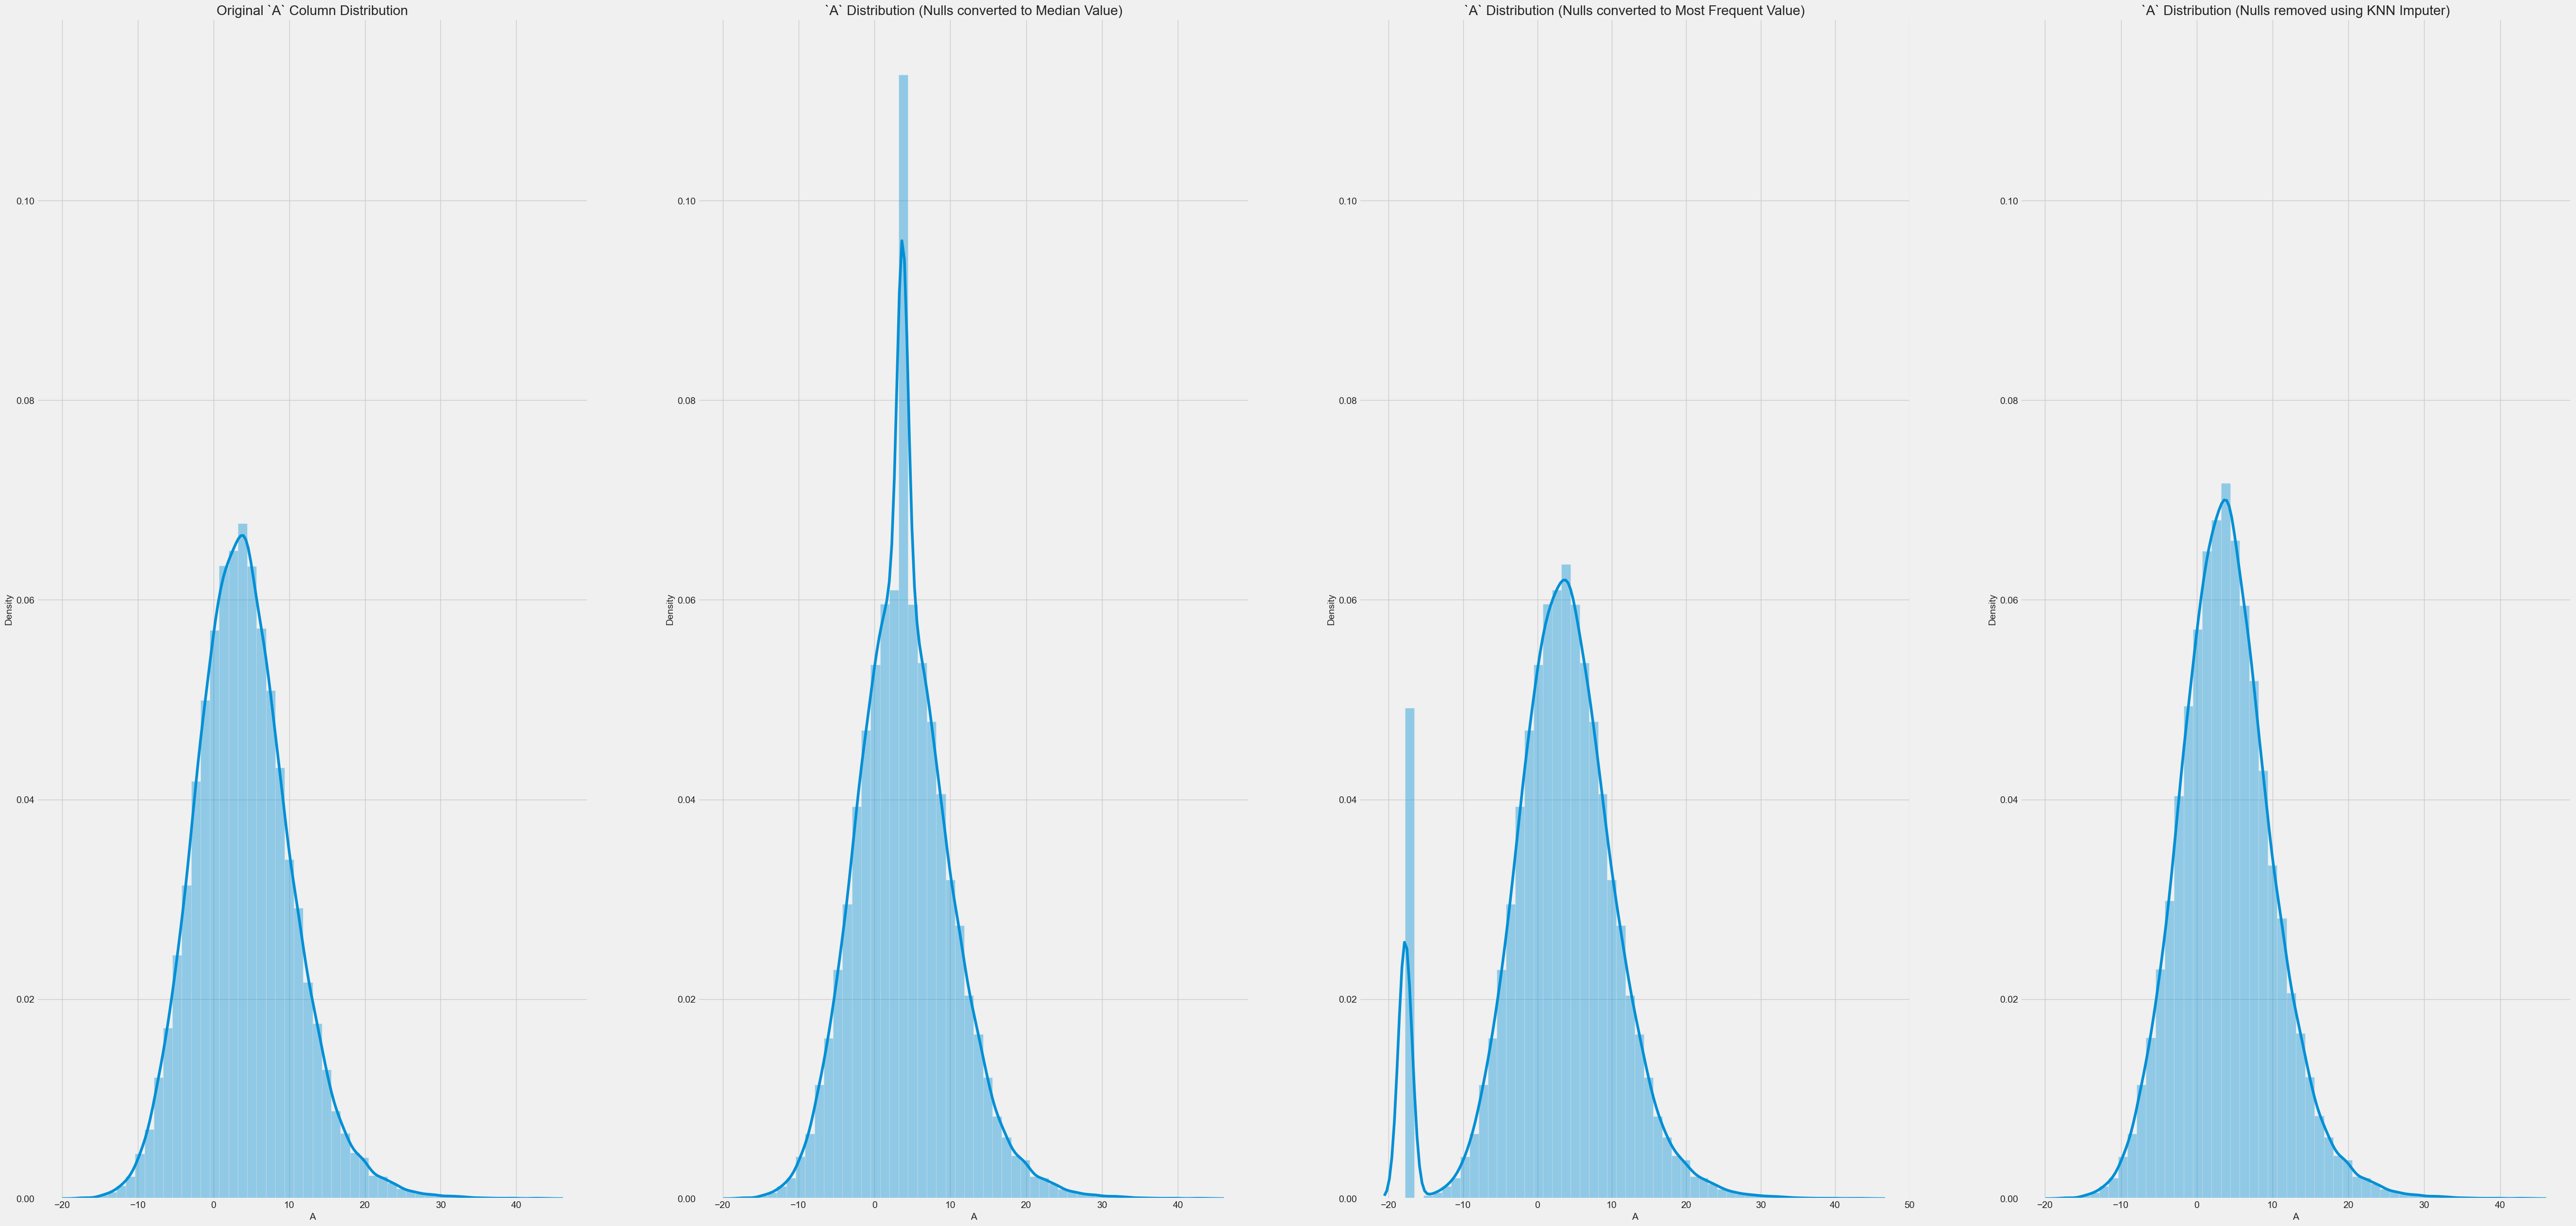

In [695]:
def show_differance_between_imputers(col_to_show: str):
    fig, ax = plt.subplots(1, 4, figsize=(60, 30))

    sns.distplot(preprocessing_train[col_to_show], ax=ax[0]).set(title=f'Original `{col_to_show}` Column Distribution')
    sns.distplot(remove_nulls_median[col_to_show], ax=ax[1]).set(title=f'`{col_to_show}` Distribution (Nulls converted to Median Value)')
    sns.distplot(remove_nulls_frequent[col_to_show], ax=ax[2]).set(title=f'`{col_to_show}` Distribution (Nulls converted to Most Frequent Value)')
    sns.distplot(remove_nulls_knn[col_to_show], ax=ax[3]).set(title=f'`{col_to_show}` Distribution (Nulls removed using KNN Imputer)')

    # Set a shared y-axis limit for all subplots
    y_max = max(
        ax[0].get_ylim()[1],
        ax[1].get_ylim()[1],
        ax[2].get_ylim()[1],
        ax[3].get_ylim()[1]
    )
    for axis in ax:
        axis.set_ylim(0, y_max)

    plt.show()

for col in ['has_debug', 'A']:
    print("showing differance between imputers for column: ", col)
    show_differance_between_imputers(col)


* We chose to demonstrate the effect of each method on the A column since this feature is normal distributed, so it will be easier to see the impact of each method.
* We can see that the most frequent value method "messing" the distribution and makes it less normal, while the median method adds a peak to the distribution (in the median value).
* In the KNN method, it seems like the distribution hasn't changed much, and it's very close to the original distribution.
* We will choose to use the KNN method for filling NULL values of the not correlated features.
* On the other hand, boolean features acts weird using the KNN method, so we will use Frequent value there

In [696]:
# Apply the fill nulls method for the rest of the columns:
preprocessing_train = imputer_implementation(preprocessing_train, 'KNN')
preprocessing_train = imputer_implementation(preprocessing_train, 'most_frequent', cols=['has_debug', 'has_relocations', 'has_resources', 'has_signature', 'has_tls'])
preprocessing_train.isnull().sum()

size                      0
vsize                     0
imports                   0
exports                   0
has_debug                 0
has_relocations           0
has_resources             0
has_signature             0
has_tls                   0
symbols                   0
numstrings                0
paths                     0
urls                      0
registry                  0
MZ                        0
printables                0
avlength                  0
file_type_trid            0
file_type_prob_trid       0
A                         0
B                         0
C                      1659
label                     0
dtype: int64

In [697]:
value_counts = preprocessing_train['C'].value_counts()
print(value_counts)
print("\nC Null amount: ", preprocessing_train['C'].isnull().sum())


vh     18586
er      9216
cs      4723
bf      4674
gow     4509
mc      4109
vr       481
Name: C, dtype: int64

C Null amount:  1659


In [698]:
missing_values_frequent = {}

def fill_missing_values_randomly_by_frequent(df: pd.DataFrame, column: str):
    df = df.copy()
    if column in missing_values_frequent:
        frequent_values = missing_values_frequent[column]
    else:
        value_counts = df[column].value_counts()
        frequent_values = value_counts[value_counts > 0].index.tolist()
        missing_values_frequent[column] = frequent_values

    missing_count = df[column].isnull().sum()
    random_values = np.random.choice(frequent_values, size=missing_count)
    df.loc[df[column].isnull(), column] = random_values
    return df


In [699]:
preprocessing_train = fill_missing_values_randomly_by_frequent(preprocessing_train, 'C')
value_counts = preprocessing_train['C'].value_counts()
print(value_counts)
print("\nC Null amount: ", preprocessing_train['C'].isnull().sum())

vh     18850
er      9453
cs      4950
bf      4918
gow     4738
mc      4331
vr       717
Name: C, dtype: int64

C Null amount:  0


In [700]:
preprocessing_train.isnull().sum()

size                   0
vsize                  0
imports                0
exports                0
has_debug              0
has_relocations        0
has_resources          0
has_signature          0
has_tls                0
symbols                0
numstrings             0
paths                  0
urls                   0
registry               0
MZ                     0
printables             0
avlength               0
file_type_trid         0
file_type_prob_trid    0
A                      0
B                      0
C                      0
label                  0
dtype: int64

## 2.Dealing with categorical attributes:
Since ML models does not work with non-numeric values, we will encode all the categorical features.
We will try 2 different methods: using one-hot-encoder, and using frequency_encoder:

In [701]:
preprocessing_categorials_train = preprocessing_train.copy()

In [702]:
# Convert Size colum to float type:
preprocessing_categorials_train['size'] = preprocessing_categorials_train['size'].astype(float)

C column has 7 kinds of data that has no relation or order, so we will use One Hot Encoder to label this column.

In [703]:
one_hot_encoder = {}

def one_hot_encode(df, cols, reset=False):
    global one_hot_encoder

    hashed_cols = tuple(set(cols))
    df_copy = df.copy()
    data_to_encode = df_copy[cols]
    if reset or hashed_cols not in one_hot_encoder:
        one_hot_encoder[hashed_cols] = OneHotEncoder(sparse=False, handle_unknown='ignore')
        one_hot_encoder[hashed_cols].fit(data_to_encode)

    encoder = one_hot_encoder.get(hashed_cols)
    encoded_data = encoder.transform(data_to_encode)

    column_names = []
    for feature in encoder.categories_:
        column_names.extend(feature)

    encoded_df = pd.DataFrame(encoded_data, columns=column_names)
    encoded_df.reset_index(drop=True, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return pd.concat([df.drop(columns=cols), encoded_df], axis=1)

preprocessing_categorials_train = one_hot_encode(preprocessing_categorials_train, ['C'])

In [704]:
print(preprocessing_categorials_train.shape)
preprocessing_categorials_train.head()

(47957, 29)


size     vsize  imports  exports  has_debug  has_relocations  \
0  379904.0  389120.0      0.0      0.0        0.0              0.0   
1   13701.0   35840.0     10.0      0.0        1.0              0.0   
2   67968.0  237568.0    155.0      0.0        0.0              0.0   
3  377504.0  204800.0    155.0      0.0        0.0              0.0   
4    9912.0   45056.0     12.0      5.0        1.0              1.0   

   has_resources  has_signature  has_tls  symbols  ...          A         B  \
0            1.0            0.0      0.0      0.0  ...  14.725437  5.149047   
1            0.0            0.0      0.0    164.0  ...  -1.501366  4.922661   
2            1.0            1.0      0.0      0.0  ...   0.667102  5.671153   
3            1.0            1.0      0.0      0.0  ...   5.502379  6.360744   
4            0.0            0.0      0.0     19.0  ...   0.675251  5.131165   

   label   bf   cs   er  gow   mc   vh   vr  
0      0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
1      0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
2      0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
3      0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
4      0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 29 columns]

On the other hand, file_type_trid has 89 different values and 87 %  of the values are using only 15 types, and it have no relation or order aswell as the C column.
This is why we will group the bottom 1% as "Other" label

In [705]:
from typing import List
import pandas as pd

frequency_table: dict = {}
values_over_the_thresholds: dict = {}

def frequency_encode(df: pd.DataFrame, columns: List[str], threshold: float = 0.01, reset=False):
    global frequency_table, values_over_the_thresholds
    encoded_df = df.copy()
    for column in columns:
        if not reset and column in frequency_table:
            category_frequencies = frequency_table[column]['frequencies']
            other_frequency = frequency_table[column]['other_frequency']
            under_threshold_values = values_over_the_thresholds[column]['under_threshold_values']
            is_under_threshold = values_over_the_thresholds[column]['is_under_threshold']
        else:
            category_counts = df[column].value_counts()
            total_count = category_counts.sum()
            category_frequencies = category_counts / total_count
            under_threshold_values = category_counts[category_counts / total_count < threshold].index.tolist()
            is_under_threshold = df[column].isin(under_threshold_values)
            other_frequency = category_counts[category_counts / total_count < threshold].sum() / total_count
            frequency_table[column] = {'frequencies': category_frequencies, 'other_frequency': other_frequency}
            values_over_the_thresholds[column] = {'under_threshold_values': under_threshold_values, 'is_under_threshold': is_under_threshold}

        new_col_name = column + '_freq_encoded'
        encoded_df[new_col_name] = df[column].map(category_frequencies)

        encoded_df.loc[is_under_threshold, new_col_name] = other_frequency
        encoded_df.loc[is_under_threshold, column] = 'other_' + column

        encoded_df[new_col_name] = encoded_df[new_col_name].fillna(other_frequency)

    return encoded_df

def one_hot_freq_encode(df: pd.DataFrame, columns: List[str], threshold: float = 0.01, reset=False):
    return one_hot_encode(frequency_encode(df, columns, threshold, reset), columns, reset)

preprocessing_categorials_train = one_hot_freq_encode(preprocessing_categorials_train, ['file_type_trid'])


In [706]:
print(preprocessing_categorials_train.shape)
preprocessing_categorials_train.head()

(47957, 50)


size     vsize  imports  exports  has_debug  has_relocations  \
0  379904.0  389120.0      0.0      0.0        0.0              0.0   
1   13701.0   35840.0     10.0      0.0        1.0              0.0   
2   67968.0  237568.0    155.0      0.0        0.0              0.0   
3  377504.0  204800.0    155.0      0.0        0.0              0.0   
4    9912.0   45056.0     12.0      5.0        1.0              1.0   

   has_resources  has_signature  has_tls  symbols  ...  \
0            1.0            0.0      0.0      0.0  ...   
1            0.0            0.0      0.0    164.0  ...   
2            1.0            1.0      0.0      0.0  ...   
3            1.0            1.0      0.0      0.0  ...   
4            0.0            0.0      0.0     19.0  ...   

   Win32 EXE PECompact compressed (generic)  Win32 Executable (generic)  \
0                                       0.0                         1.0   
1                                       0.0                         0.0   
2                                       0.0                         0.0   
3                                       0.0                         0.0   
4                                       0.0                         0.0   

   Win32 Executable Delphi generic  Win32 Executable MS Visual C++ (generic)  \
0                              0.0                                       0.0   
1                              0.0                                       0.0   
2                              0.0                                       0.0   
3                              0.0                                       0.0   
4                              0.0                                       0.0   

   Win32 Executable Microsoft Visual Basic 6  Win64 Executable (generic)  \
0                                        0.0                         0.0   
1                                        0.0                         1.0   
2                                        0.0                         0.0   
3                                        0.0                         0.0   
4                                        0.0                         1.0   

   WinRAR Self Extracting archive (4.x-5.x)  Windows ActiveX control  \
0                                       0.0                      0.0   
1                                       0.0                      0.0   
2                                       0.0                      0.0   
3                                       0.0                      0.0   
4                                       0.0                      0.0   

   Windows Control Panel Item (generic)  other_file_type_trid  
0                                   0.0                   0.0  
1                                   0.0                   0.0  
2                                   0.0                   0.0  
3                                   0.0                   0.0  
4                                   0.0                   0.0  

[5 rows x 50 columns]

In [707]:
# get preprocessing_categorials_train[['file_type_trid_freq_encoded']] count unique values:
preprocessing_categorials_train['other_file_type_trid'].sum() / preprocessing_categorials_train.shape[0]

0.05940738578309736

The bottom 5.94% got squashed into an 'other_file_type_trid' category<br/>
The 'Power' of each file saved in the 'file_type_trid_freq_encoded' and now reflected

## 3. Dealing with Outliers:

When we remove outliers, we want to be careful that we are not throwing away measurements just because they look wierd.
We are going to use "BOXPLOT" (IQR) although only the 'A' feature normally distributed (according to prior visualization and our assumptions).
We chose to that any way in order to get some more information (like the mean) about the numerical features

In [711]:
preprocessing_outliers_train = preprocessing_categorials_train.copy()

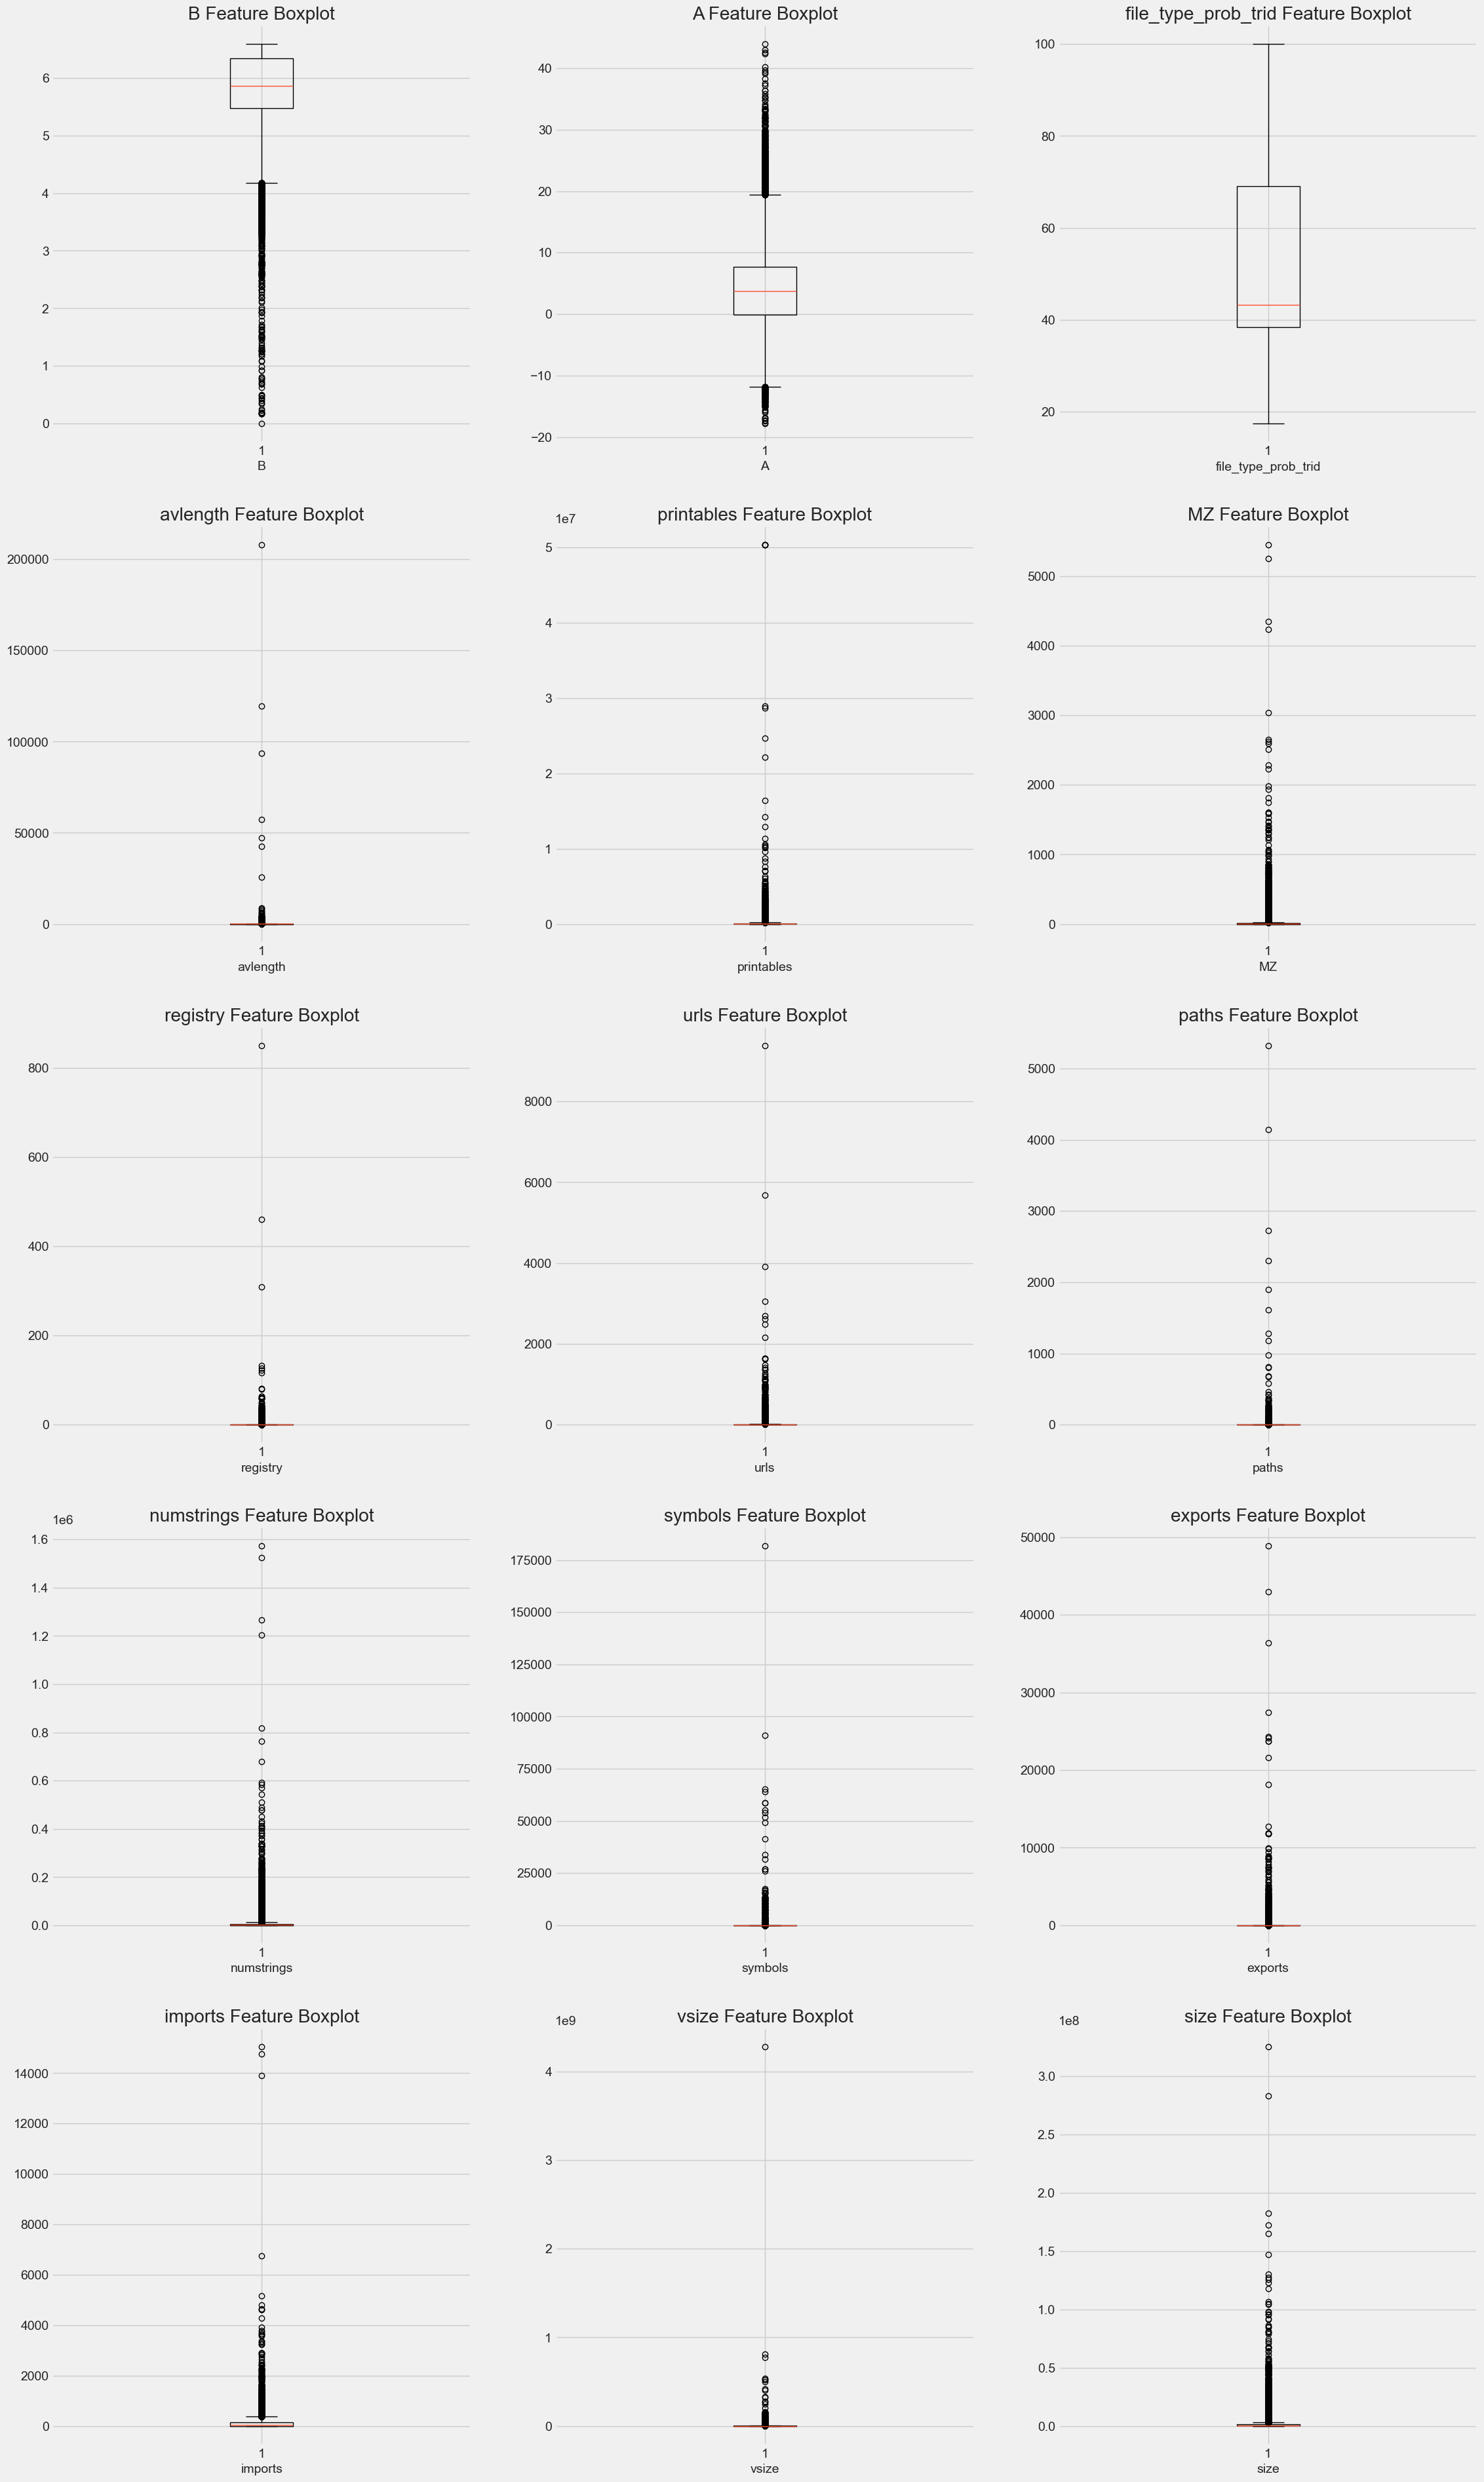

In [712]:
rows = 6
cols = 3
fig = plt.figure(figsize=(25, 55))

for index, column in enumerate(NUMERIC_COLUMNS[::-1], start=1):
    plt.subplot(rows, cols, index)
    plt.title(f"{column} Feature Boxplot")
    plt.xlabel(column)
    plt.boxplot(preprocessing_outliers_train[column], vert=True)

* We can see few things:
    *  We asuume that Both A & B columns are close to normal distributed (since the median is excatly in the middle of the box), but they both have a lot of outliers.
    * The file_type_prob column is negative skew and has a median of ~40%
    * In all the other columns we can see there are extreme outliers, since the graph is scaled between the minimum value of the column and the maximum value - it makes the graph squeezed for the columns with extreme outliers.

* To handle the outliers, we will try to use the definition of an extreme outlier in order to remove these values:
* The IQR method involves calculating the IQR, which is the range between Q1 and Q3. Any data point that falls below Q1 minus 1.5 times the IQR or above Q3 plus 1.5 times the IQR is considered an extreme outlier.
    * We will implement a function that calculates how many outliers are there in each column.
    * Then, we will remove only rows that contains more than the threshold (4) of outliers.




In [713]:
def outlier_removal_by_iqr(df, cols=NUMERIC_COLUMNS):
    temp_df = df.copy()
    Q1 = temp_df.quantile(0.25)
    Q3 = temp_df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the values outside the bounds
    temp_df[cols] = temp_df[cols][(temp_df >= lower_bound) & (temp_df <= upper_bound)]

    return temp_df

train_without_outliers_check_by_iqr = outlier_removal_by_iqr(preprocessing_outliers_train, NUMERIC_COLUMNS)

In [714]:
from scipy.stats.mstats import winsorize

def outlier_removal_by_winsorize(df, lower_limit=0, upper_limit=0.05, cols=NUMERIC_COLUMNS):
    temp_df = df.copy()
    for column in cols:
        temp_df[column] = winsorize(temp_df[column], limits=(lower_limit, upper_limit))
    return temp_df

train_without_outliers_check_by_winsorized = outlier_removal_by_winsorize(preprocessing_outliers_train, cols=NUMERIC_COLUMNS)

We will visualize how many values were counted as outliers in each column by the IQR method:

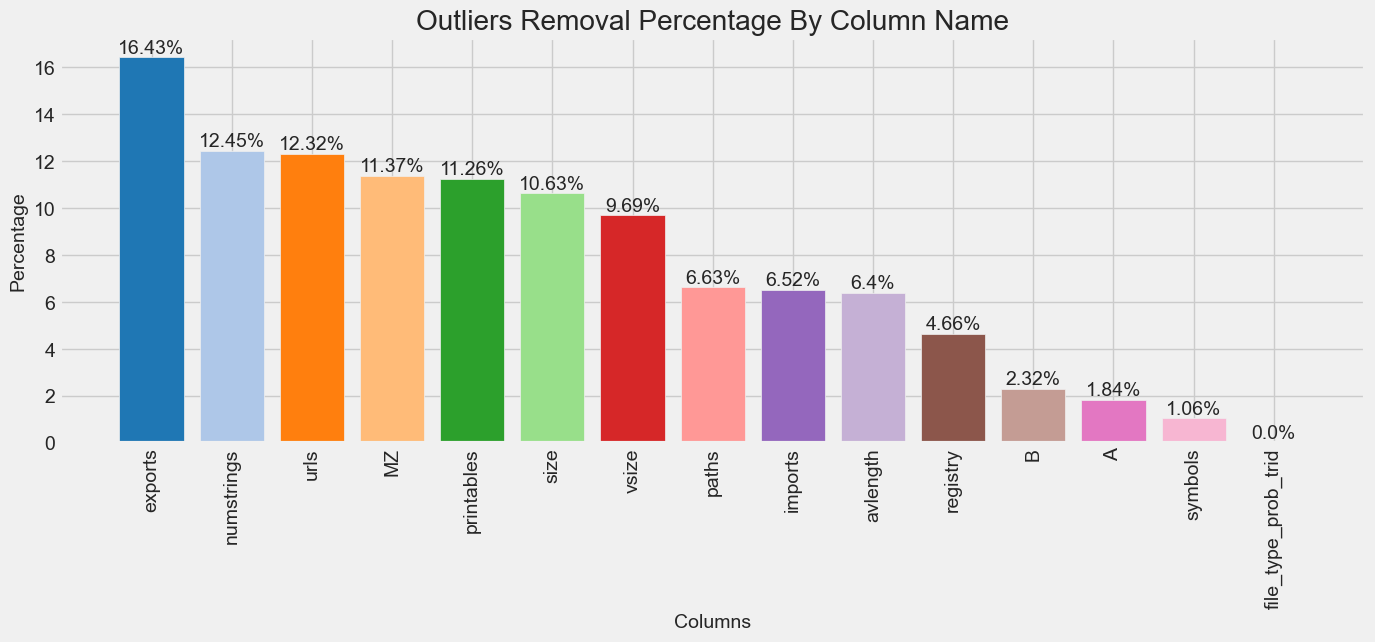

In [715]:
def show_outlier_effect(df, outliered_df):
    # Initializing helping parameters
    percent_dict = {}
    initial_count = 0
    after_count = 0

    # Checking the percentage for each column:
    for col in NUMERIC_COLUMNS:
        initial_count = df[col].count()
        after_count = outliered_df[col].dropna().count()
        percent_dict[col] = ((initial_count - after_count) / initial_count) * 100

    # Creating a percentage bar plot:
    fig, ax = plt.subplots()
    cols = list(percent_dict.keys())
    values = list(percent_dict.values())

    sorted_indices = sorted(range(len(values)), key=lambda k: values[k], reverse=True)
    sorted_columns = [cols[i] for i in sorted_indices]
    sorted_values = [values[i] for i in sorted_indices]

    ax.bar(sorted_columns, sorted_values, color=plt.get_cmap('tab20').colors)

    for i, v in enumerate(sorted_values):
        plt.text(i, v, str(round(v,2)) + '%', ha='center', va='bottom')

    plt.xlabel('Columns')
    plt.ylabel('Percentage')
    plt.title('Outliers Removal Percentage By Column Name')
    plt.xticks(rotation=90)
    fig.set_size_inches(15, 5)
    plt.show()

show_outlier_effect(preprocessing_outliers_train, train_without_outliers_check_by_iqr)


* We can see that some of the columns are reduced by low percentages, but some has high percentage of lost data.
* We can also see that the file_type_prob_trid doesn't have outliers by this method, which makes sense since we already saw that the values in this column are between 0-100 since they represent percentages.


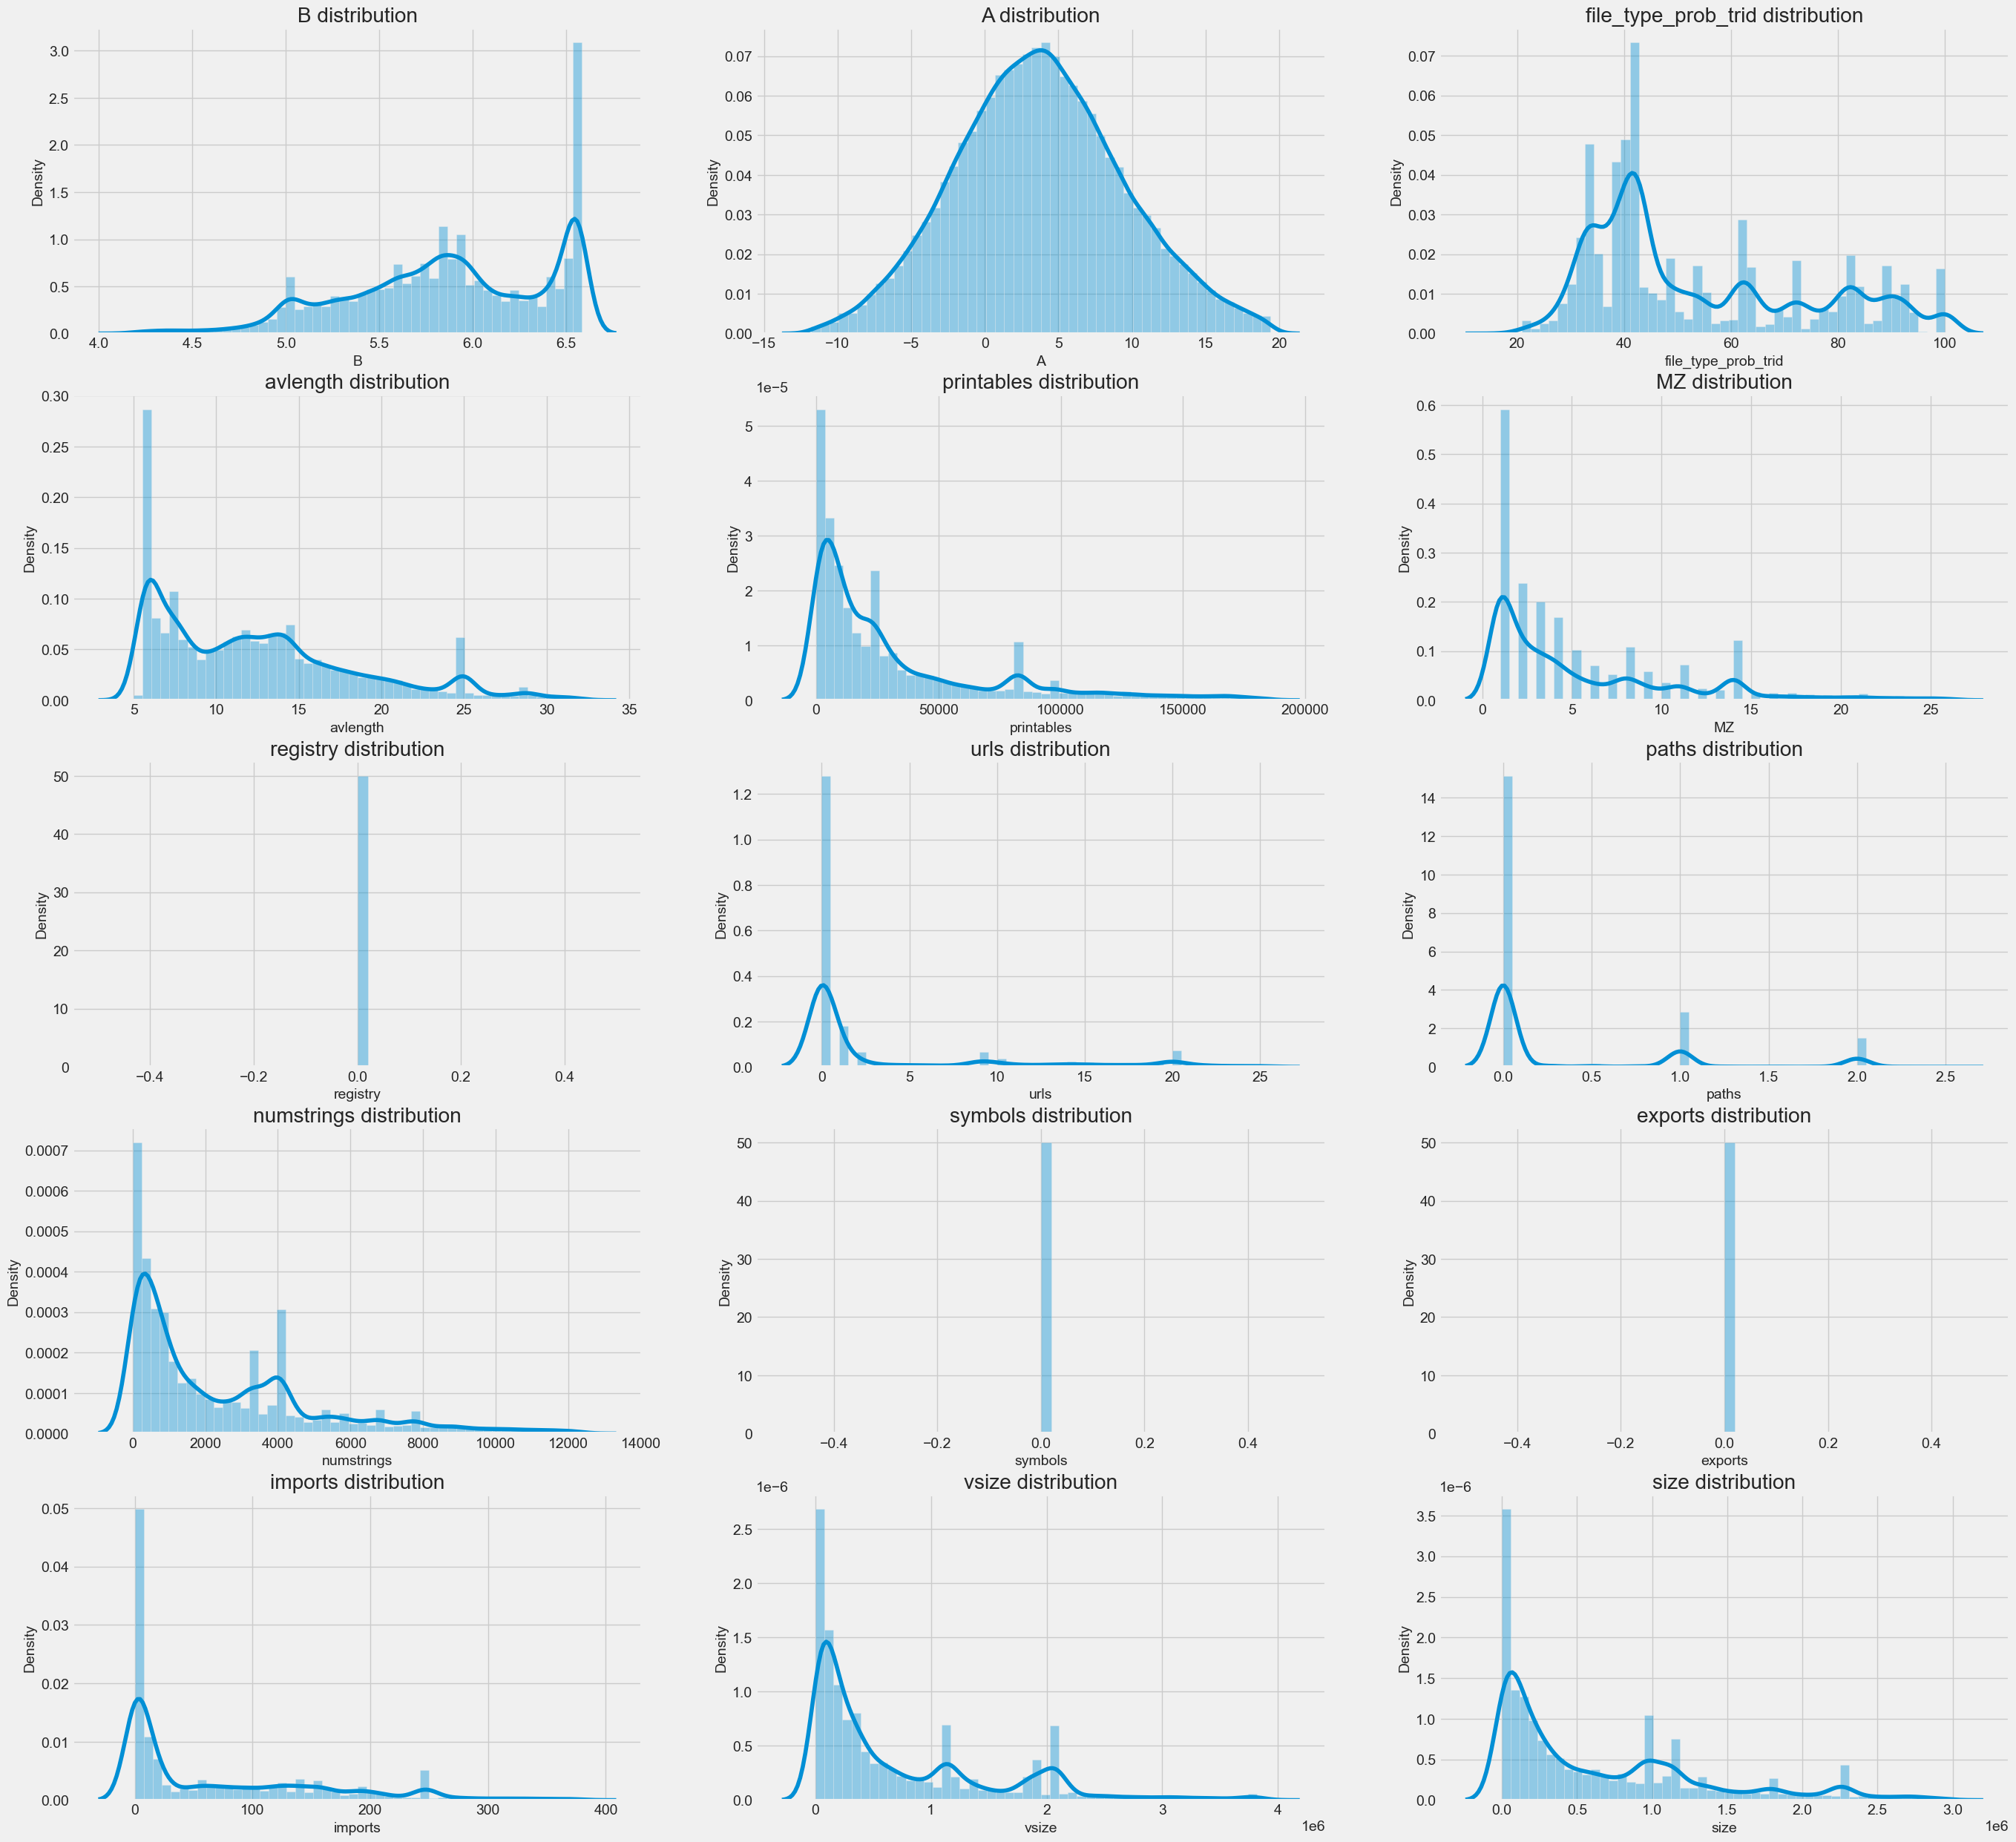

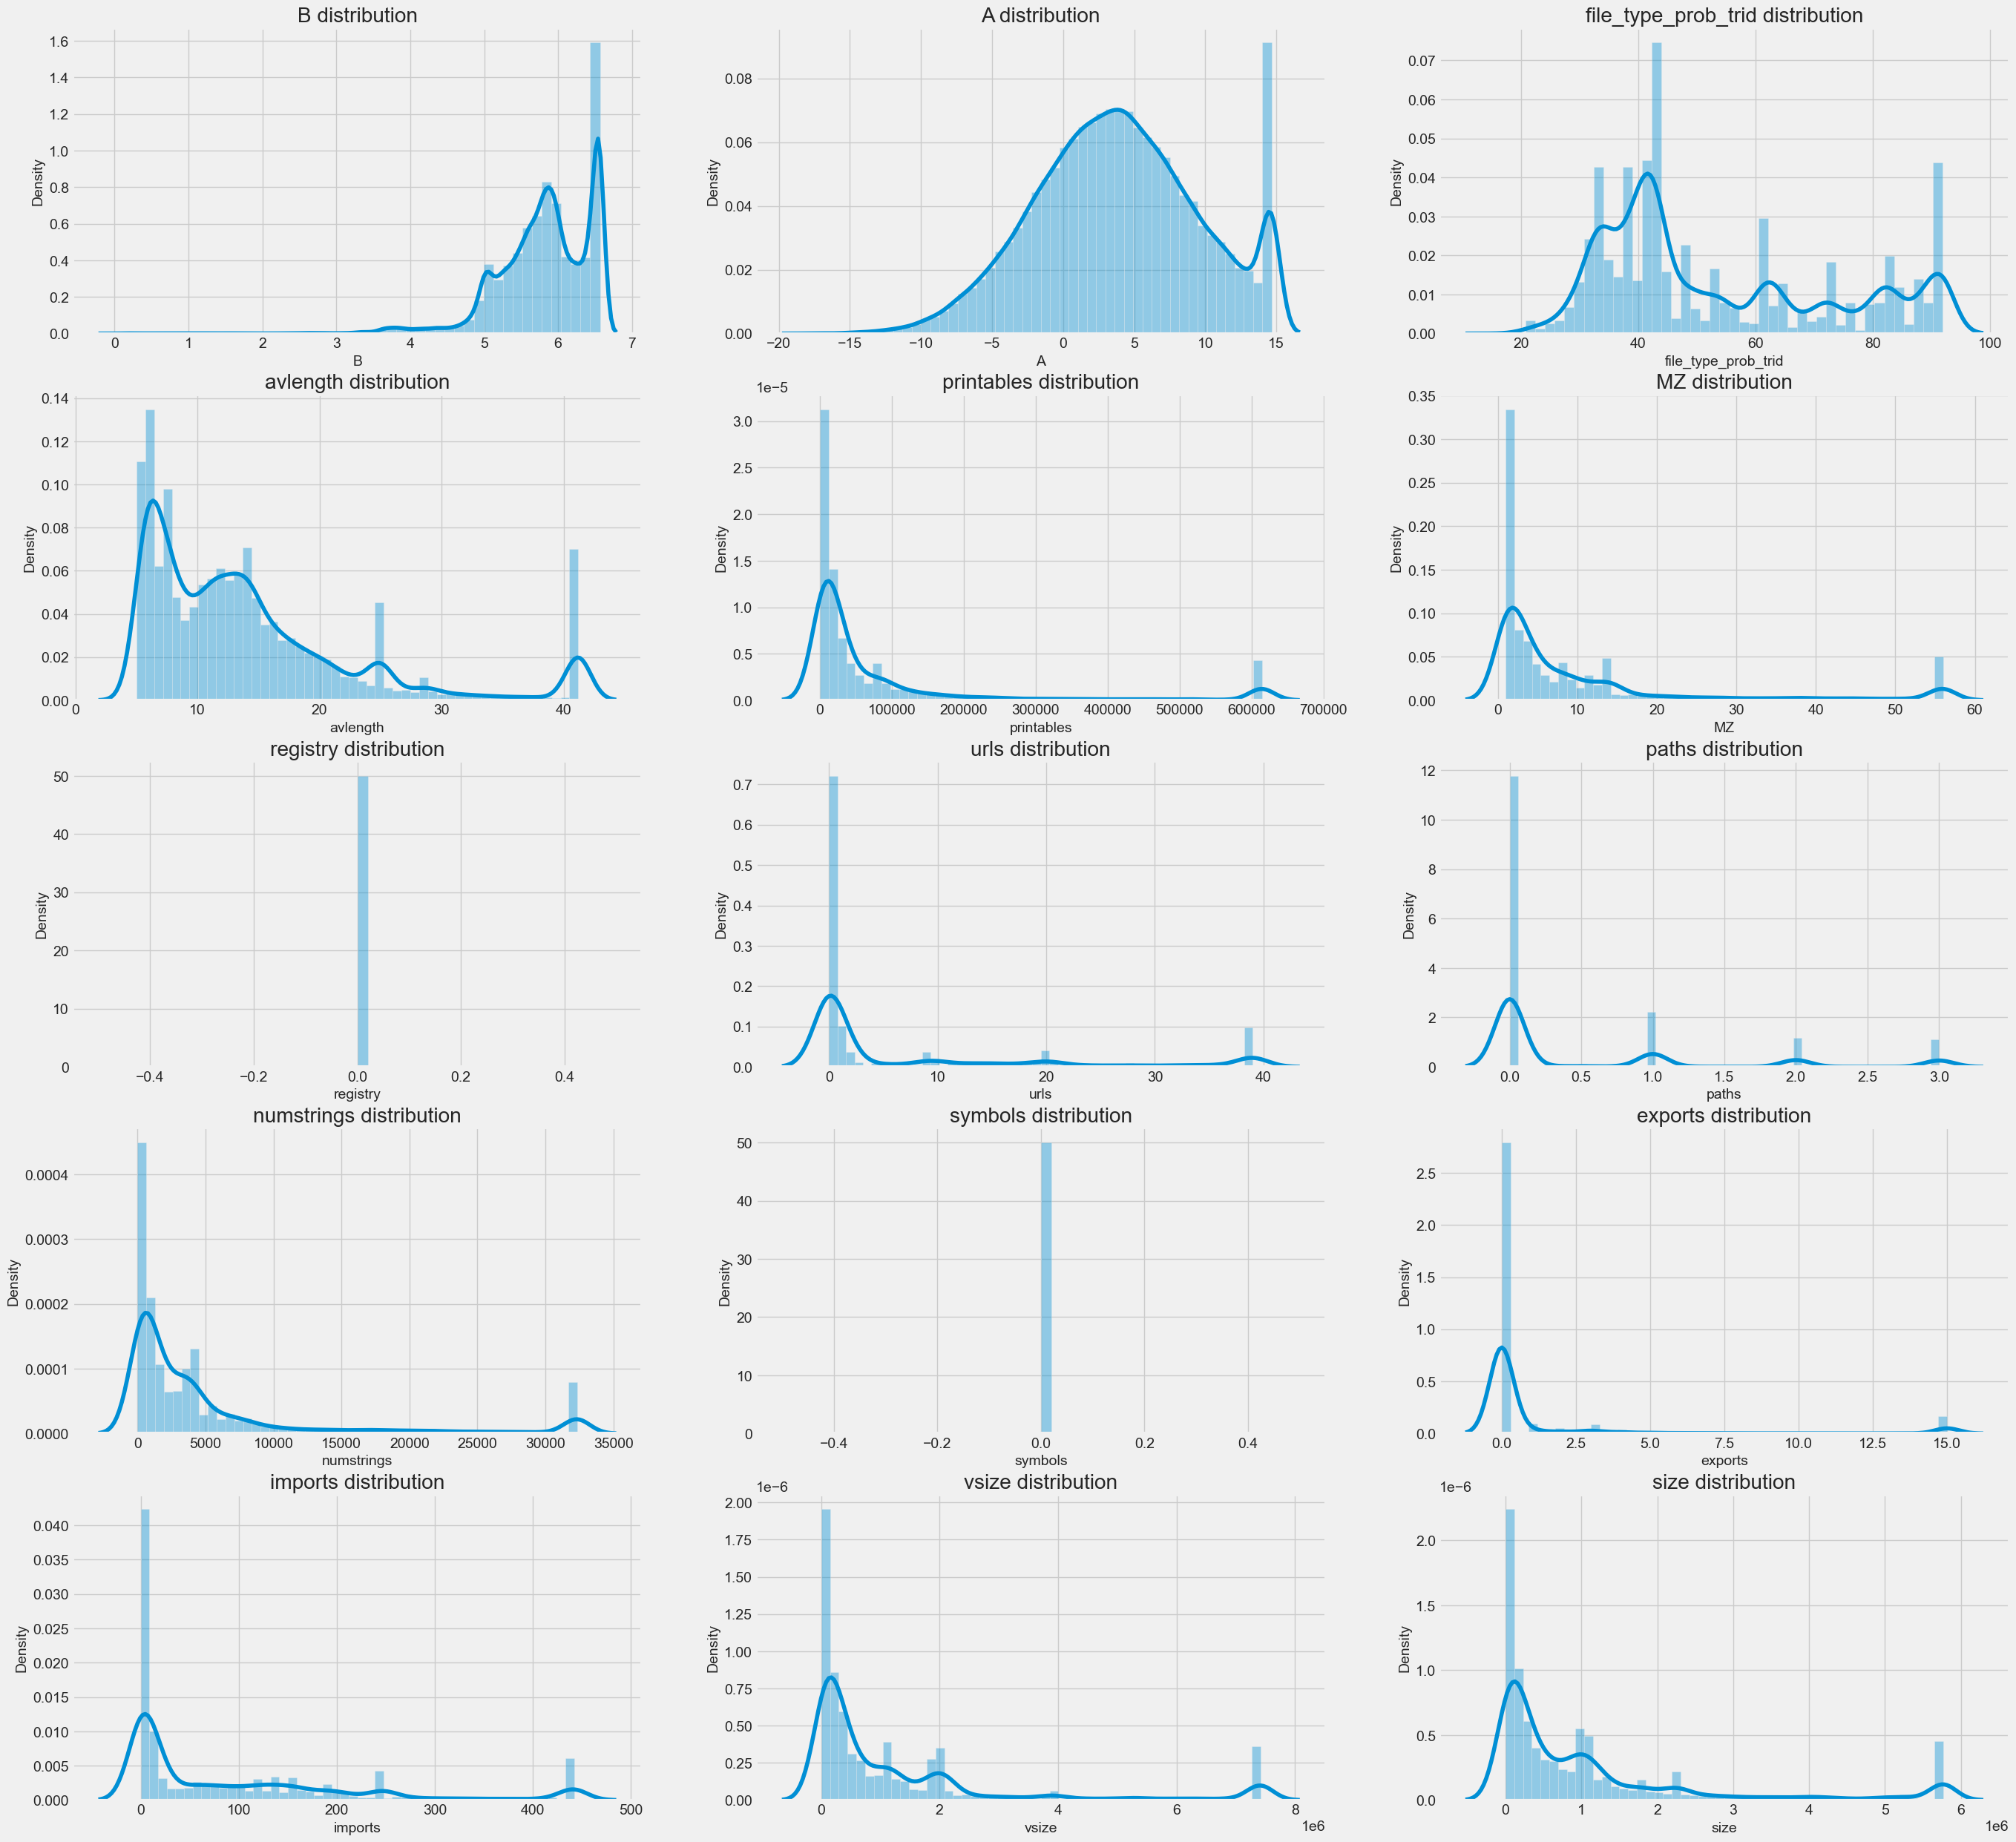

In [716]:
# Distribution of the numerical columns:
def show_distribution(df):
    num_rows = 10
    num_columns = 3
    fig = plt.figure(figsize=(30, 60))

    for index, column in enumerate(NUMERIC_COLUMNS[::-1], start=1):
        plt.subplot(num_rows, num_columns, index)
        plt.title(f"{column} distribution")
        sns.distplot(df[column])
show_distribution(train_without_outliers_check_by_iqr)
show_distribution(train_without_outliers_check_by_winsorized)


Because winsorize does not drop the columns like the IQR method, we will preffer using the winsorize method for all places that have higher lost percentage then 5% in the IQR method.

In [717]:
rows_to_outline_with_iqr = ['file_type_prob_trid', 'symbols', 'A', 'B', 'registry']
preprocessing_outliers_train = outlier_removal_by_iqr(preprocessing_outliers_train, cols=rows_to_outline_with_iqr).dropna()
preprocessing_outliers_train = outlier_removal_by_winsorize(preprocessing_outliers_train, cols=list(set(NUMERIC_COLUMNS) - set(rows_to_outline_with_iqr)))

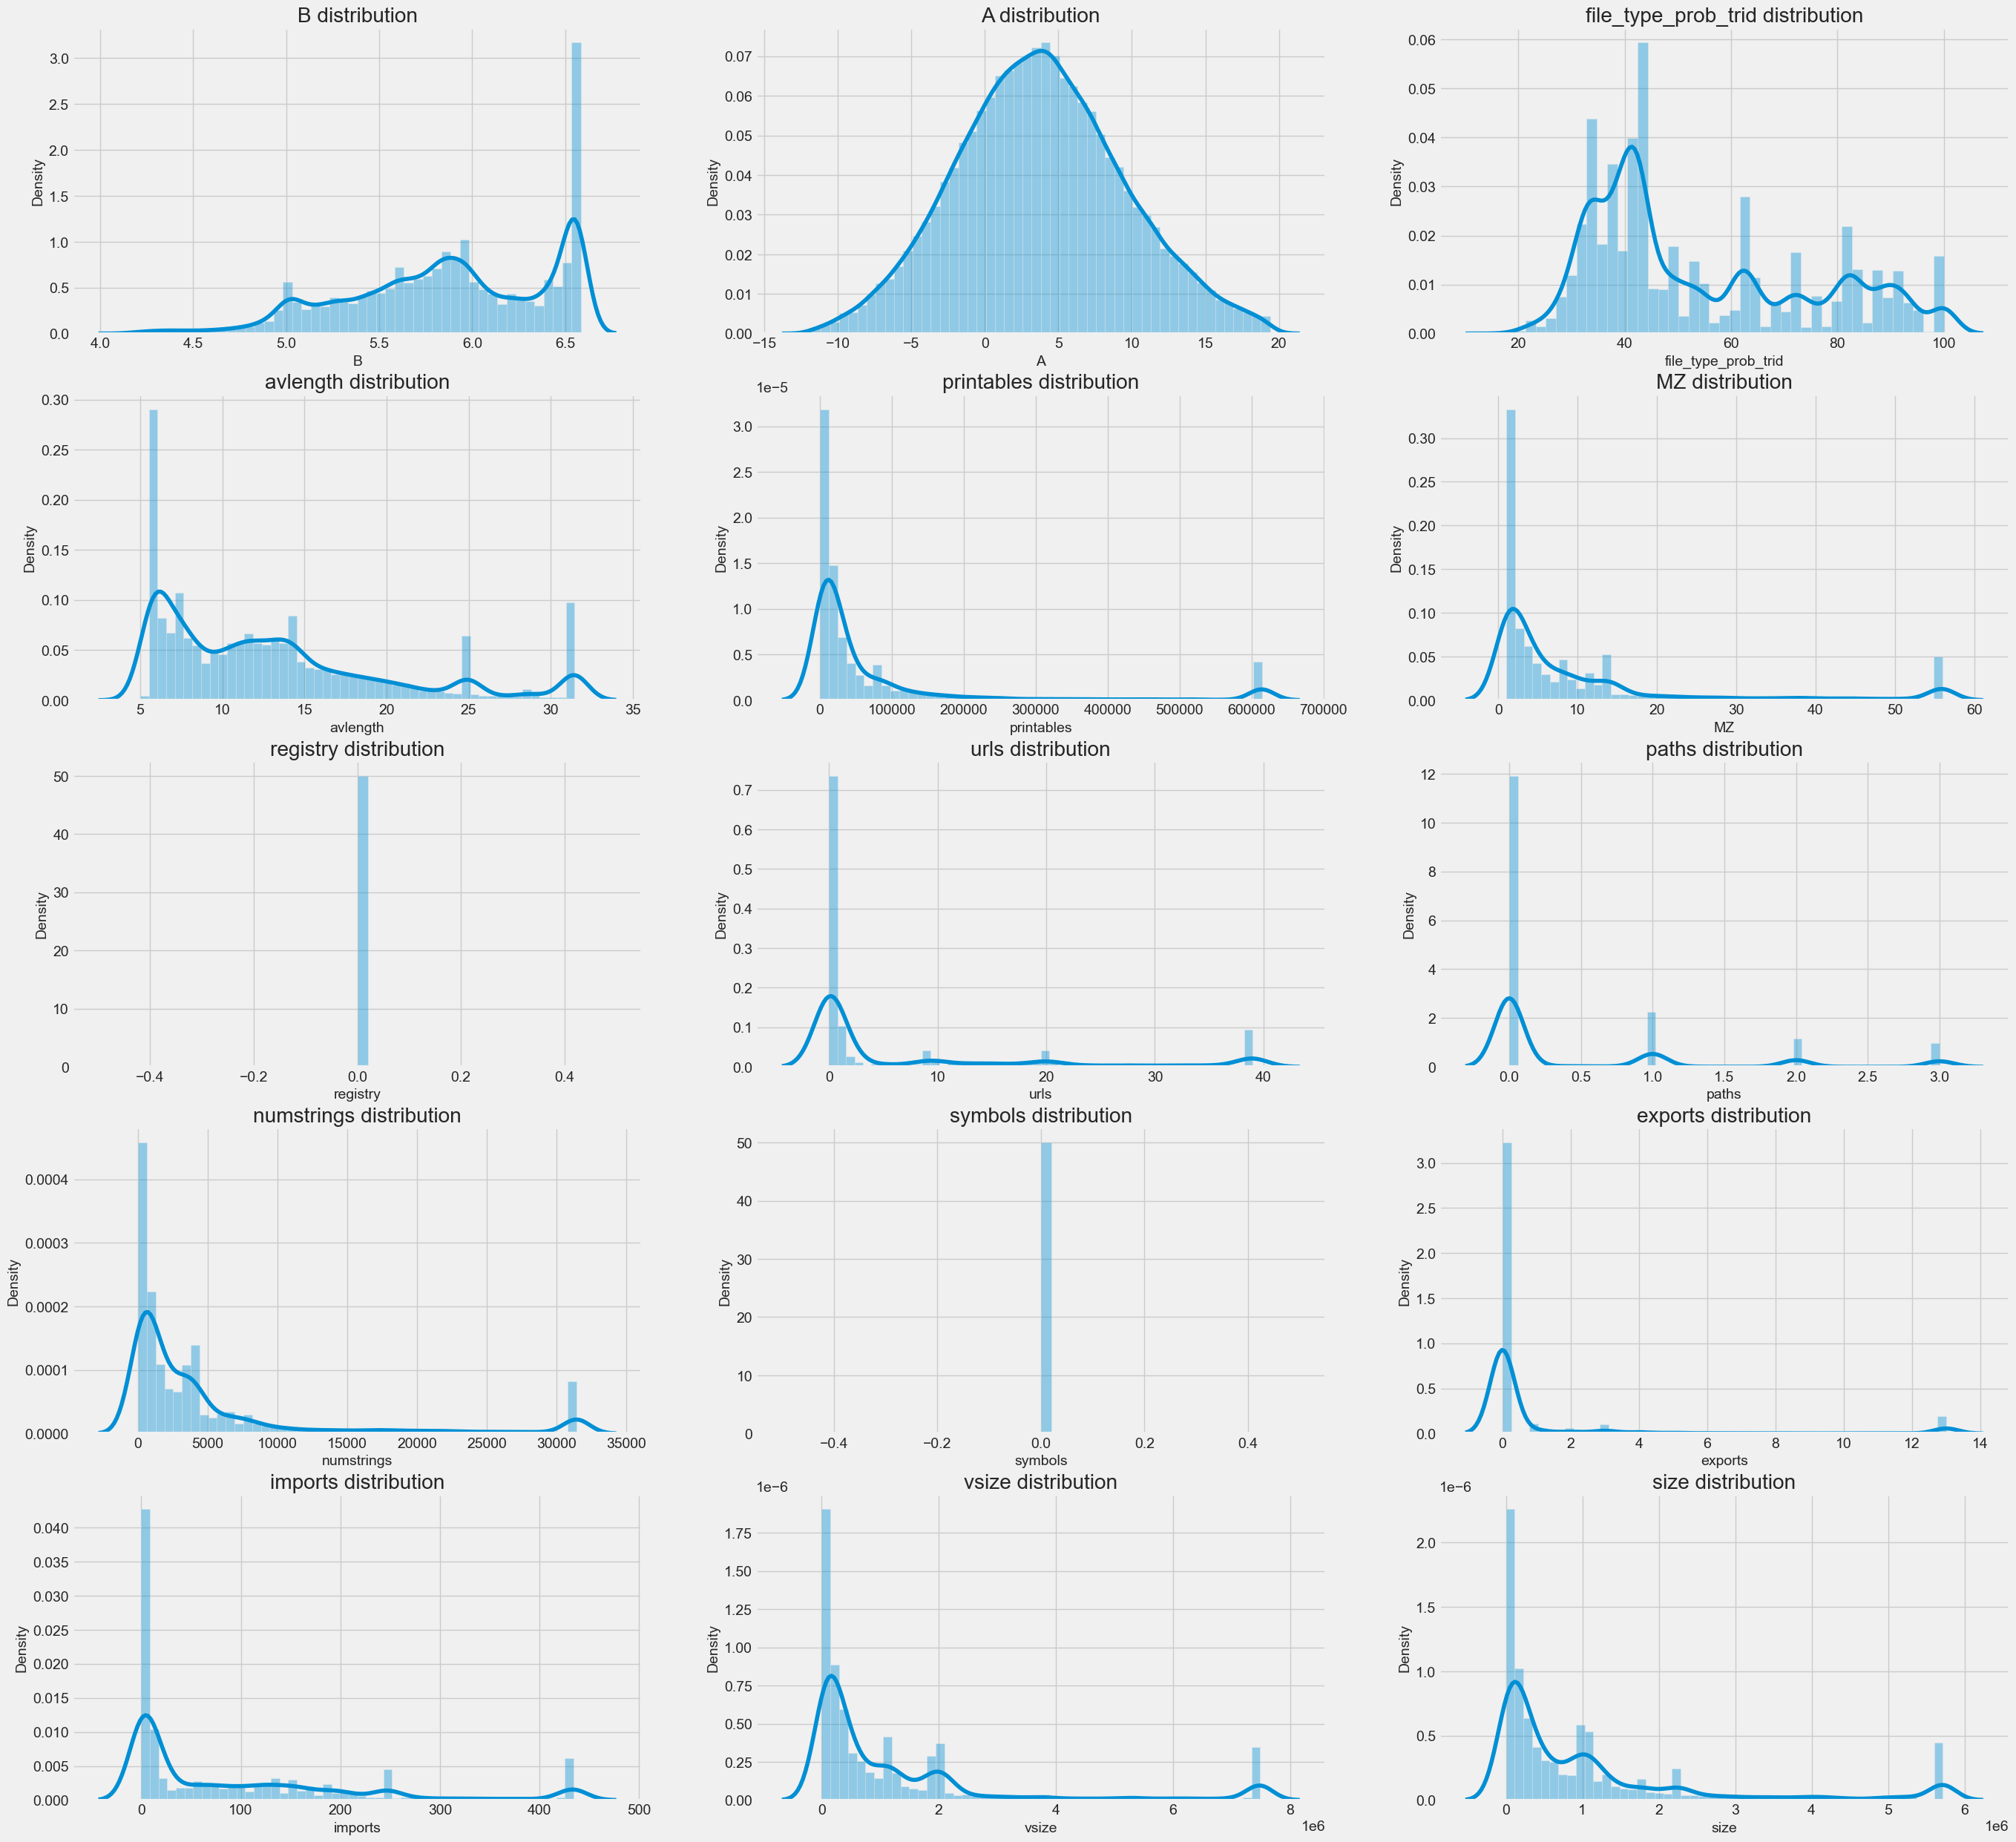

In [718]:
show_distribution(preprocessing_outliers_train)

## 4. Normalizing the data:

* The data is not normalized, as the ranges of all the numerical columns are different. However the need of normalization depend on the type of model used, For example:
* The KNN and SVM uses the distance measure, so they need data to be normalized. In Logistic regression, normalization helps the model converge faster during the optimization process. Whereas for the Decision tree, random forest and Naive bayes models, the data doesn't have to be normalized.

* So as the half of the models require normalized data, we will normalize our data:

* We will try 2 methods:
    1. Using the MinMaxScaler
    2. Using the StandardScaler

In [719]:
normalizing_train = preprocessing_outliers_train.copy()

In [720]:
MINMAX_SCALAR = None
STANDARD_SCALAR = None

# Create function for each scaler:
def minmax_scaler(df, cols, reset=False):
    global MINMAX_SCALAR
    new_df = df.copy()

    if reset or MINMAX_SCALAR is None:
        MINMAX_SCALAR = MinMaxScaler()
        MINMAX_SCALAR.fit(new_df[cols])

    return pd.DataFrame(MINMAX_SCALAR.transform(new_df[cols]), columns=cols)

def standard_scaler(df, cols, reset=False):
    global STANDARD_SCALAR
    new_df = df.copy()

    if reset or STANDARD_SCALAR is None:
        STANDARD_SCALAR = StandardScaler()
        STANDARD_SCALAR.fit(new_df[cols])

    return pd.DataFrame(STANDARD_SCALAR.transform(new_df[cols]), columns=cols)


In [721]:
# We will choose the columns that we want to scaled (only numeric, without the binary ones):
other_columns = set(normalizing_train.columns) - set(NUMERIC_COLUMNS)

# Applying the normalization function on the relevant columns:
minmax_scaled_data = minmax_scaler(normalizing_train, NUMERIC_COLUMNS)
standard_scaled_data = standard_scaler(normalizing_train, NUMERIC_COLUMNS)

# Concat back the scaled data with the other column's data:
train_minmax_normalized = pd.concat([minmax_scaled_data.reset_index(drop=True), normalizing_train[other_columns].reset_index(drop=True)], axis=1)
train_standard_normalized = pd.concat([standard_scaled_data.reset_index(drop=True), normalizing_train[other_columns].reset_index(drop=True)], axis=1)

* We chose to use the standard normalization method since we want to apply models that assume the features are normally distributed.

In [722]:
normalizing_train = train_standard_normalized.copy()

## 5. Class Imbalance Problem

We started with 50-50 count for the label column, however after the processing we have made, we noticed that there are more '1' values than '0' in our model. This could degrade the performance of our classifers. We will prevent this by replicating the 0 class data.

We will use the Synthetic Minority Oversampling Technique (SMOTE). This technique generates synthetic data for the minority class.
SMOTE works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors. The disavantage of this technique is that it increases the likelihood of overfitting since it replicates the minority class samples.

In [723]:
class_imbalance_train = normalizing_train.copy()

In [724]:
# count diff between 0 and 1
label_count = class_imbalance_train['label'].value_counts()
count_1, count_0 = label_count
count_diff = np.abs(count_1 - count_0)
print(f"There are {count_0} samples with label '0', and {count_1} samples with label '1', a difference of: {count_diff}")

There are 20839 samples with label '0', and 22507 samples with label '1', a difference of: 1668


In [725]:
def smote_imbalance_method(df):
    new_df = df.copy()
    x_train_smote = new_df.drop(columns = ['label'])
    y_train_smote = new_df['label']

    smote = SMOTE()
    x_smote, y_smote = smote.fit_resample(x_train_smote, y_train_smote)
    new_df = pd.concat([x_smote, y_smote], axis=1)
    return new_df

print('Number of samples in the original dataset:', class_imbalance_train.shape[0])
class_imbalance_train = smote_imbalance_method(class_imbalance_train)
print('Number of samples in the resampled dataset:', class_imbalance_train.shape[0])

Number of samples in the original dataset: 43346
Number of samples in the resampled dataset: 45014


## 6. Processing new features:


First, we want to add a binary column that represents if the virtual size of the file is bigger than the size. We think it will help our model to better learn the data because as we understand the data, if there's a gap between both sizes, it means that the file is compressed, and it's a good indicator for a malware file.
After adding it, we will visualize a countplot of this new feature, and see if there is a difference between the label values.

In [726]:
processing_features_train = class_imbalance_train.copy()
trans_train = processing_features_train.copy()
trans_train['bigger_virtual_size'] = (processing_features_train['vsize'] > processing_features_train['size']).astype(int)

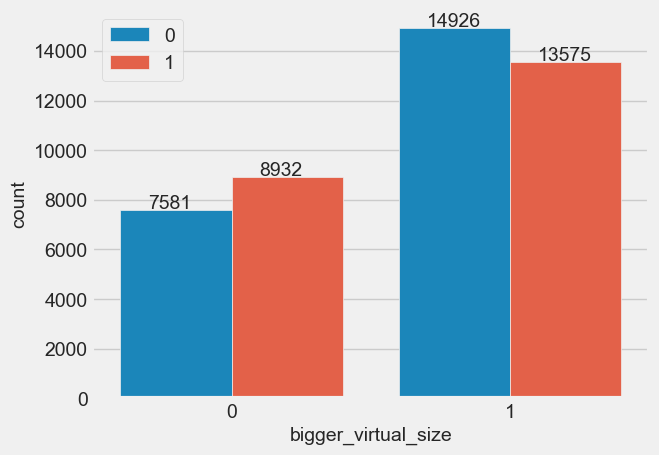

In [727]:
sns.countplot(data=trans_train, x='bigger_virtual_size', hue='label')
plt.gca().legend(loc='upper left', labels=['0', '1'])
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

We can understand from the above plot that:
    * The bigger_virtual_size feature might be a good feature, as the distribution of the label values is different for both values of the feature.
    * We can see that in general, there are much more files with a bigger virtual size.
    * And it seems like the probability of a file to be malicious is higher if it has a smaller virtual size, and lower if it has a bigger virtual size.

In [728]:
processing_features_train['bigger_virtual_size'] = (processing_features_train['vsize'] > processing_features_train['size']).astype(int)
processing_features_train.shape

(45014, 51)

* To account for possible non-linear relationships, we can take square root transformation of the features and then calculate the correlation coefficients with the label.



## 7. Dealing with the dimension of the problem:

#### 1) Implementing PCA:

In [733]:
features = processing_features_train.columns.tolist()
features.remove('label')

x_train_set, x_val_set = train_test_split(processing_features_train, test_size=0.2, random_state=42)
y_train = x_train_set['label']
X_train = x_train_set.drop(columns = ['label'])
y_val = x_val_set['label']
X_val = x_val_set.drop(columns = ['label'])

In [734]:
pipeline = Pipeline([ ('pca', PCA()),])

# List of different n_components values to try
param_grid = {'pca__n_components': [10, 12, 14, 16, 18, 19, 20, 21, 22, 23],
              'pca__whiten': [True, False],
              'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized']  }
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
n_components = grid_search.best_params_['pca__n_components']

Best Parameters: {'pca__n_components': 23, 'pca__svd_solver': 'arpack', 'pca__whiten': False}


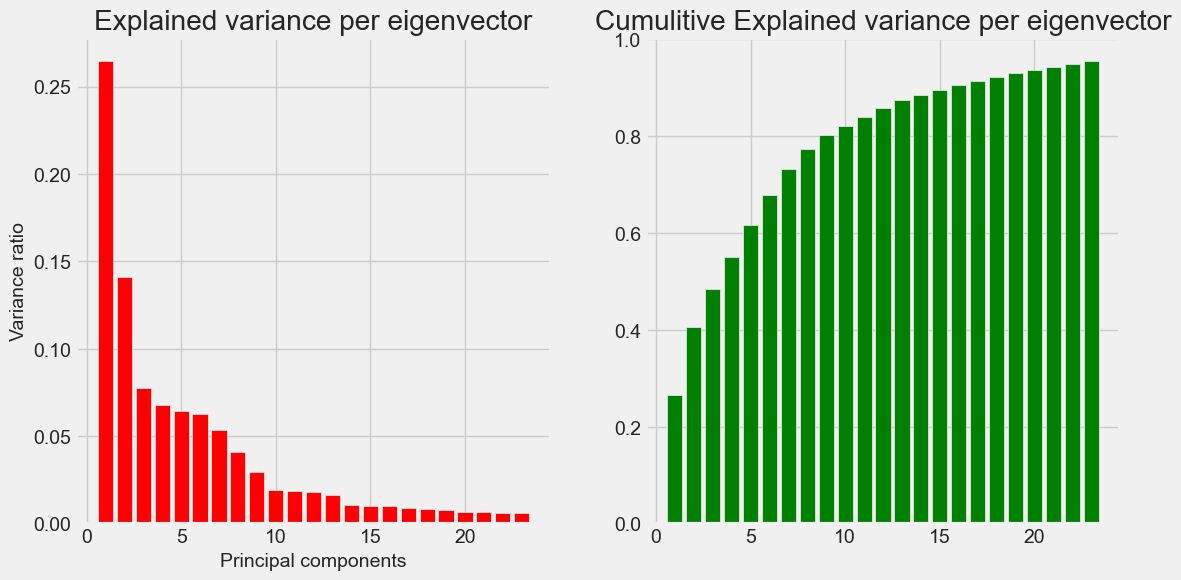

number of components which preserve at least 99% of the variance: 23


In [735]:
pca = PCA(n_components=n_components, whiten=grid_search.best_params_['pca__whiten'], svd_solver=grid_search.best_params_['pca__svd_solver'])
pca.fit_transform(X_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='r')
plt.title("Explained variance per eigenvector")
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.subplot(1,2,2)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), color='g')
plt.title("Cumulitive Explained variance per eigenvector")
plt.show()

components = pca.components_
number_of_components_pca = len(components)
print(f'number of components which preserve at least 99% of the variance: {number_of_components_pca}')

In [736]:
# number of components
n_pcs= components.shape[0]
# get the index of the most important feature on EACH component
most_important = [np.abs(components[i]).argmax() for i in range(n_pcs)]
unique_most_important = []
for var in most_important:
    if var not in unique_most_important:
        unique_most_important.append(var)
# Get the features names
initial_feature_names = features[:]
most_important_names = [features[most_important_col] for most_important_col in unique_most_important]
new_features_lst_pca =  most_important_names[:len(components)]

#### 2) Implementing Backward Selection for reducing the complexity of the dataset:


* Now we will try another method, the Backward Selection.

* In order to implement it, we will use linear regression with Mallows cp penalization.
We will create some functions to help:

    * The first function implements the sigma_hat squared which used for an estimation of the noise variance sigma

    $ \hat{\sigma}^2 = \frac{RSS_{all features}}{n-\#features-1} $


    * The second function retrieves the mallows_cp score for LR.

    $ C_p= MSE+2\frac{d+1}{n}\hat{\sigma}^2$ <br><br>


    * The third function gets as input a list of features and returns the best subset of features, containing one less feature, according to the mallows Cp score.

    * And the last function is the implementation of the backward selection algorithm itself, it returns the mallows_cp score and the number of features.


In [737]:
def get_sigma_hat_squared(X: np.array, y: np.array) -> float:
    model = LinearRegression() #Defining a linear regression model
    model.fit(X, y)

    rss = np.sum((y - model.predict(X))**2) #Based on the RSS formula
    features_num = X.shape[1]
    n = X.shape[0]
    return rss / (n - features_num - 1)


def get_mallows_cp_score(X: np.array ,y: np.array, sigma_hat_squared: float) -> float:
    model = LinearRegression() #Defining a linear regression model
    model.fit(X, y)

    n = X.shape[0]
    d = X.shape[1]
    mse = mean_squared_error(y, model.predict(X))
    return mse + (2 * ((d + 1) / n) * sigma_hat_squared)


def remove_feature(X: np.array ,y: np.array ,current_features: List[int] , sigma_hat_squared: float) -> Dict:
    best_features_lst = []
    best_score = 1000000000

    for feature_num in range(len(current_features)): #X.shape[1] = number of features
        temp_current_features_lst = current_features.copy() #Copy of the original list
        del temp_current_features_lst[feature_num] #Removes one feature

        current_X = X[:, temp_current_features_lst] # New dataset with one less feature
        current_score = get_mallows_cp_score(current_X, y, sigma_hat_squared)

        if current_score < best_score: #We want to minimize the Mallows Cp score
            best_score = current_score
            best_features_lst = temp_current_features_lst.copy()

    return {'features':sorted(best_features_lst),'score':best_score}


def backward_selection(X: np.array, y: np.array) -> List[int]:
    # Calculate error on model with all features
    sigma_hat_squared = get_sigma_hat_squared(X, y)
    # set initial features to all features
    current_features = list(range(X.shape[1]))
    models_lst = []
    #perform backward selection
    while len(current_features) > 1:
        # remove feature
        model = remove_feature(X, y, current_features, sigma_hat_squared)
        #update
        current_features = model['features']
        models_lst.append(model)

    #Plotting
    scores_lst = [x['score'] for x in models_lst]
    plt.plot(range(1,len(scores_lst)+1),scores_lst)
    plt.xlabel("number of features")
    plt.ylabel("Mallows cp")
    plt.title("Mallows Cp score VS number of features")
    plt.show()

    #Returning features of best model, based on mcp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)

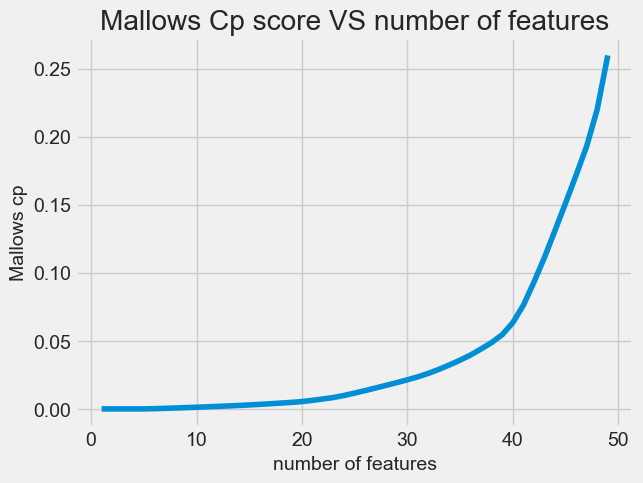

number of selected features by backward: 47


In [738]:
bw_selected_columns = backward_selection(X_train.to_numpy(), X_train.to_numpy())
new_features_lst_bw = X_train.columns[bw_selected_columns]

print(f'number of selected features by backward: {len(bw_selected_columns)}')

In [739]:
print(f"The columns that we should remove according to the backward selection algorithm are: {set(features) - set(new_features_lst_bw)}")
print(f"The columns that we should remove according to the PCA algorithm are: {set(features) - set(new_features_lst_pca)}")

The columns that we should remove according to the backward selection algorithm are: {'Win16 NE executable (generic)', 'file_type_trid_freq_encoded', 'vr'}
The columns that we should remove according to the PCA algorithm are: {'registry', 'Win16 NE executable (generic)', 'Win32 Executable Microsoft Visual Basic 6', 'printables', 'DOS Executable Generic', 'Microsoft Visual C++ compiled executable (generic)', 'vr', 'has_tls', 'Inno Setup installer', 'file_type_trid_freq_encoded', 'Generic .NET DLL/Assembly', 'InstallShield setup', 'Win32 Executable MS Visual C++ (generic)', 'urls', 'bigger_virtual_size', 'Generic CIL Executable (.NET, Mono, etc.)', 'Win32 Dynamic Link Library (generic)', 'OS/2 Executable (generic)', 'Win32 Executable Delphi generic', 'Windows ActiveX control', 'has_signature', 'Win32 EXE PECompact compressed (generic)', 'other_file_type_trid', 'mc', 'Windows Control Panel Item (generic)', 'NSIS - Nullsoft Scriptable Install System', 'symbols', 'cs', 'WinRAR Self Extracti

* Now we want to understand which method is better and choose the right method for our model.

* We'll evaluate the results using a validation set and LR model.

In [740]:
# Calculate the MSE for each reduced dataset
# For the backward selection:
cols = list(X_train.columns[bw_selected_columns])
x_backward_reduced_train = X_train.loc[:, cols]
x_backward_reduced_val = X_val.loc[:, cols]

# For the PCA method:
train_components = pca.components_
x_pca_train = np.dot(X_train, train_components.T)
x_pca_val = np.dot(X_val, train_components.T)

In [741]:
 # We'll define 2 models that we want to compare:
bw_model = LinearRegression()
pca_model = LinearRegression()

# Fitting both models:
bw_model.fit(x_backward_reduced_train, y_train)
pca_model.fit(x_pca_train, y_train)

# Calculating the MSEs:
train_mse_backward = mean_squared_error(y_train, bw_model.predict(x_backward_reduced_train))
train_mse_pca = mean_squared_error(y_train, pca_model.predict(x_pca_train))

val_mse_backward = mean_squared_error(y_val, bw_model.predict(x_backward_reduced_val))
val_mse_pca = mean_squared_error(y_val, pca_model.predict(x_pca_val))

print(f'MSE train - PCA: {round(train_mse_pca,6)}')
print(f'MSE Validation - PCA: {round(val_mse_pca,6)}')
print(f'MSE train - backward: {round(train_mse_backward,6)}')
print(f'MSE Validation - backward: {round(val_mse_backward,6)}')

MSE train - PCA: 0.175074
MSE Validation - PCA: 0.174614
MSE train - backward: 0.152456
MSE Validation - backward: 0.154012


* Seems like both methods have pretty close error rates, but the backward has lower backward for both train & validation.
* We will implement the PCA method in order to reduce the dimension of our dataset:

In [742]:
# # For choosing BW:
# chosen_cols = X_train.columns[bw_selected_columns].tolist()
# chosen_cols.append("label") # Adding the label index to the columns list
# processing_features_train = processing_features_train.loc[:, chosen_cols]

# For choosing PCA:
chosen_cols = list(new_features_lst_pca)
chosen_cols.append("label")
processing_features_train = processing_features_train.loc[:, chosen_cols]

print(f"The new shape of the df is: {processing_features_train.shape}")


The new shape of the df is: (45014, 21)


## Applying the pre-procesing on the Test group:

* When we train the scaling object, we want to use only the training set. When we transform features, we will transform both the training set and the testing set.

In [743]:
# Test Pro-Processing:
def test_pre_processing(test_df):
    # Copying the original train set:
    test_copy = test_df.copy()

    # Removing NULLS:
    test_copy = fill_missing_values(test_copy, preprocessing_train, correlated_groups=correlated_groups)  # replace the nulls inside of the test df with corroleteddata from preprocessing_train
    test_copy = imputer_implementation(test_copy, 'KNN')
    test_copy = imputer_implementation(test_copy, 'most_frequent', cols=['has_debug', 'has_relocations', 'has_resources', 'has_signature', 'has_tls'])
    test_copy = fill_missing_values_randomly_by_frequent(test_copy, 'C')

    # Handling categorical features:
    test_copy = one_hot_encode(test_copy, ['C'])
    test_copy = one_hot_freq_encode(test_copy, ['file_type_trid'])

    # Convert Size colum to float type:
    test_copy['size'] = test_copy['size'].astype(float)

    # Normalizing the data:
    other_cols = set(test_copy.columns) - set(NUMERIC_COLUMNS)
    standard_scaled_data_test = standard_scaler(test_copy, NUMERIC_COLUMNS)
    standard_scaled_data_test = pd.concat([standard_scaled_data_test.reset_index(drop=True), test_copy[other_cols].reset_index(drop=True)], axis=1)

    # New features:
    standard_scaled_data_test['bigger_virtual_size'] = (standard_scaled_data_test['vsize'] > standard_scaled_data_test['size']).astype(int)

    # Removing the highly colinear features
    cols_of_pca = list(set(chosen_cols) - {'label'})
    curr_test_copy = standard_scaled_data_test.loc[:, cols_of_pca]  # Removing the features using PCA

    return curr_test_copy

In [744]:
X_test = test_pre_processing(test)
X_test.shape

(18000, 20)

In [745]:
X_test.isnull().sum()

bf                            0
size                          0
imports                       0
Win64 Executable (generic)    0
vh                            0
has_debug                     0
exports                       0
vsize                         0
numstrings                    0
gow                           0
Win32 Executable (generic)    0
has_relocations               0
MZ                            0
has_resources                 0
file_type_prob_trid           0
paths                         0
B                             0
avlength                      0
er                            0
A                             0
dtype: int64

# Part 3 & 4: Classification Model Implementation and Evaluation

We will implement different classification algorithms on the data, evaluate them, plot their results and compare them to find the best performing Model. Here we will implement the following algorithms:
- k-Nearesr Neighors (KNN)
- Decision Tree classifier
- Support Vector Machine Classifier
- Navie bayes classfier
- Random Forest classfier
- Logistic Regression Multi-layer perceptron (ANN)

* Each model will be evaluated using the classification report, confusion matix and ROC curve
* We will create functions that will do that:

In [773]:
def evaluate_model(model, x_test, y_test):
    class_names=[1,0]

    # Classification report:
    prediction_test = model.predict(x_test)
    # Print the prediction accuracy
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
    classification = metrics.classification_report(y_test, prediction_test)
    model_mae = np.mean(abs(prediction_test - y_test))

    print('============================== Model Evaluation ==============================')
    print(f'Classifier: {model}')
    print(f"\n Model Accuracy:\n{accuracy}\n")
    print(f"\n Confusion matrix:\n{confusion_matrix}\n")
    print(f"\n Classification report:\n{classification}")

    # Confusion matrix:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    y_train_pred_proba = model.predict_proba(X_train)[:,1]
    y_test_pred_proba = model.predict_proba(x_test)[:,1]
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_pred_proba)
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_pred_proba)

    # The auc for the train
    train_auc_t = auc( fpr_train, tpr_train )

    # The auc for the test
    test_auc_t = auc( fpr_test, tpr_test )

    print(f"The train auc is {train_auc_t}")
    print(f"The test auc is {test_auc_t}")

    # ROC Plot:
    plt.subplot(1,2,2)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_test,tpr_test, label='NB')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

    return model_mae

First of all, we'll split the processed train set into train & validation sets:

In [747]:
X_train_, X_val_ = train_test_split(processing_features_train, test_size=0.2, random_state=42)

y_train = X_train_['label']
X_train = X_train_.drop(columns = ['label'])
y_val = X_val_['label']
X_val = X_val_.drop(columns = ['label'])

print(f"The size of the train set is: {X_train.shape}\n The size of the validation set is: {X_val.shape}")

The size of the train set is: (36011, 20)
 The size of the validation set is: (9003, 20)


### 1. KNN Model:

In [748]:
# Finding the best hyperparameters for the model:
param_grid = {
    'n_neighbors': [5, 6, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['brute']
}

knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, param_grid, cv=5)
gs_knn.fit(X_train, y_train)
print("Best Hyperparameters:", gs_knn.best_params_)


Best Hyperparameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


In [749]:
clf_knn = gs_knn.best_estimator_
clf_knn

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=6,
                     weights='distance')

============================== Model Evaluation ==============================
Classifier: KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=6,
                     weights='distance')

 Model Accuracy:
0.8732644673997556


 Confusion matrix:
[[3892  580]
 [ 561 3970]]


 Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4472
           1       0.87      0.88      0.87      4531

    accuracy                           0.87      9003
   macro avg       0.87      0.87      0.87      9003
weighted avg       0.87      0.87      0.87      9003

The train auc is 1.0
The test auc is 0.942212220998733


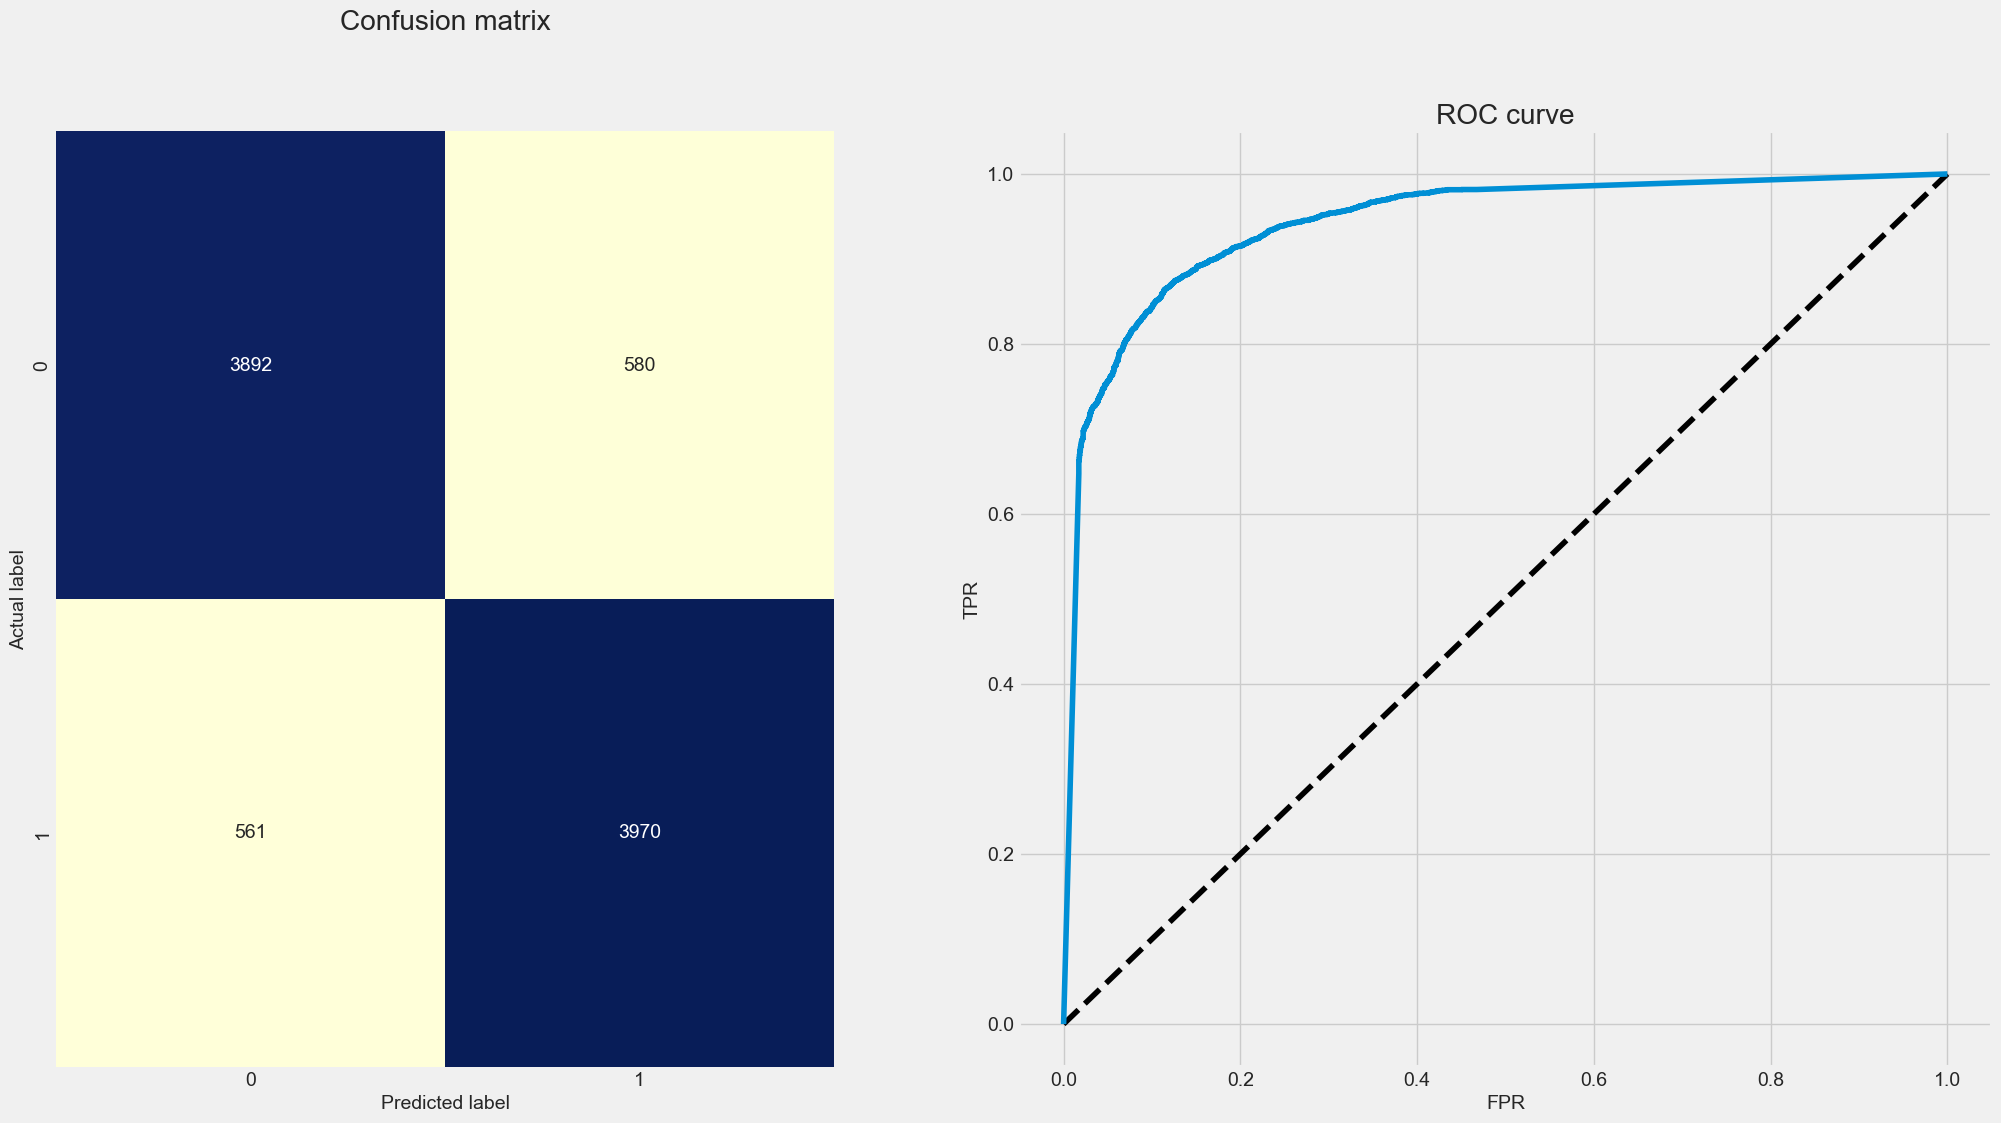

In [774]:
# Implementing the model with the best parameters:
knn_mae = evaluate_model(clf_knn, X_val, y_val)

KNN got `The train auc is 1.0` which means he is over-fitting

### 2. Naive Bayes

============================== Model Evaluation ==============================
Classifier: GaussianNB()

 Model Accuracy:
0.7133177829612352


 Confusion matrix:
[[2978 1494]
 [1087 3444]]


 Classification report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      4472
           1       0.70      0.76      0.73      4531

    accuracy                           0.71      9003
   macro avg       0.72      0.71      0.71      9003
weighted avg       0.71      0.71      0.71      9003

The train auc is 0.75547725032508
The test auc is 0.7645801394409176


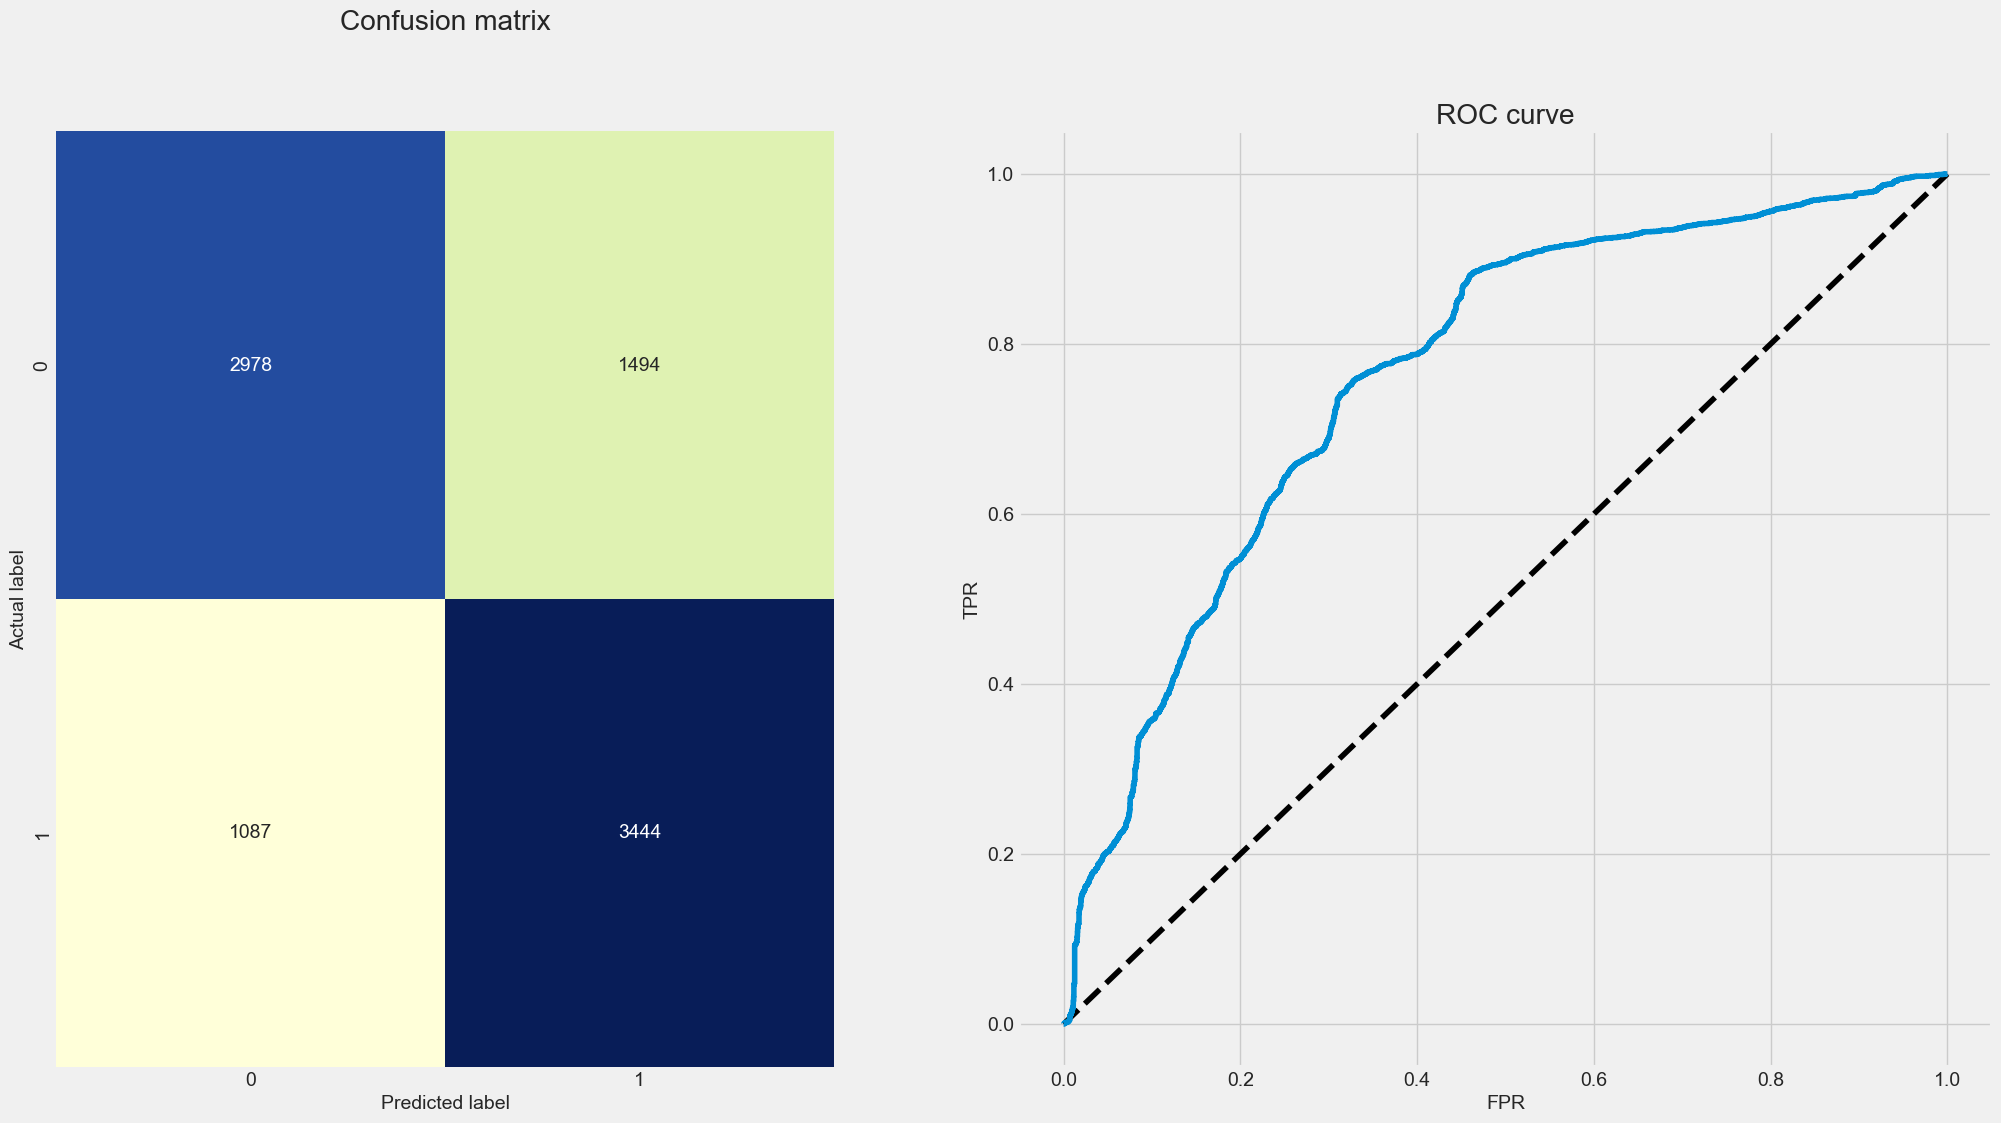

In [775]:
nb = GaussianNB()
clf_nb= nb.fit(X_train, y_train)

# Implementing the model with the best parameters:
nb_mae = evaluate_model(clf_nb, X_val, y_val)

### 3. Logistic Regression Multi-Layer Perceptron:

In [752]:
# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,),(15,),(20,)],
    'activation': ['logistic'],
    #'activation': ['logistic', 'relu'],
    'solver': ['lbfgs'],
    #'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0005,0.001, 0.01],
}

mlp = MLPClassifier(max_iter=500, early_stopping=True, validation_fraction=0.1, random_state=42)

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (20,), 'solver': 'lbfgs'}
Best Score: 0.8491571269313813


In [753]:
clf_mlp = grid_search.best_estimator_
clf_mlp

MLPClassifier(activation='logistic', alpha=0.0005, early_stopping=True,
              hidden_layer_sizes=(20,), max_iter=500, random_state=42,
              solver='lbfgs')

============================== Model Evaluation ==============================
Classifier: MLPClassifier(activation='logistic', alpha=0.0005, early_stopping=True,
              hidden_layer_sizes=(20,), max_iter=500, random_state=42,
              solver='lbfgs')

 Model Accuracy:
0.8508275019437965


 Confusion matrix:
[[3818  654]
 [ 689 3842]]


 Classification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4472
           1       0.85      0.85      0.85      4531

    accuracy                           0.85      9003
   macro avg       0.85      0.85      0.85      9003
weighted avg       0.85      0.85      0.85      9003

The train auc is 0.938493424803598
The test auc is 0.927043485762363


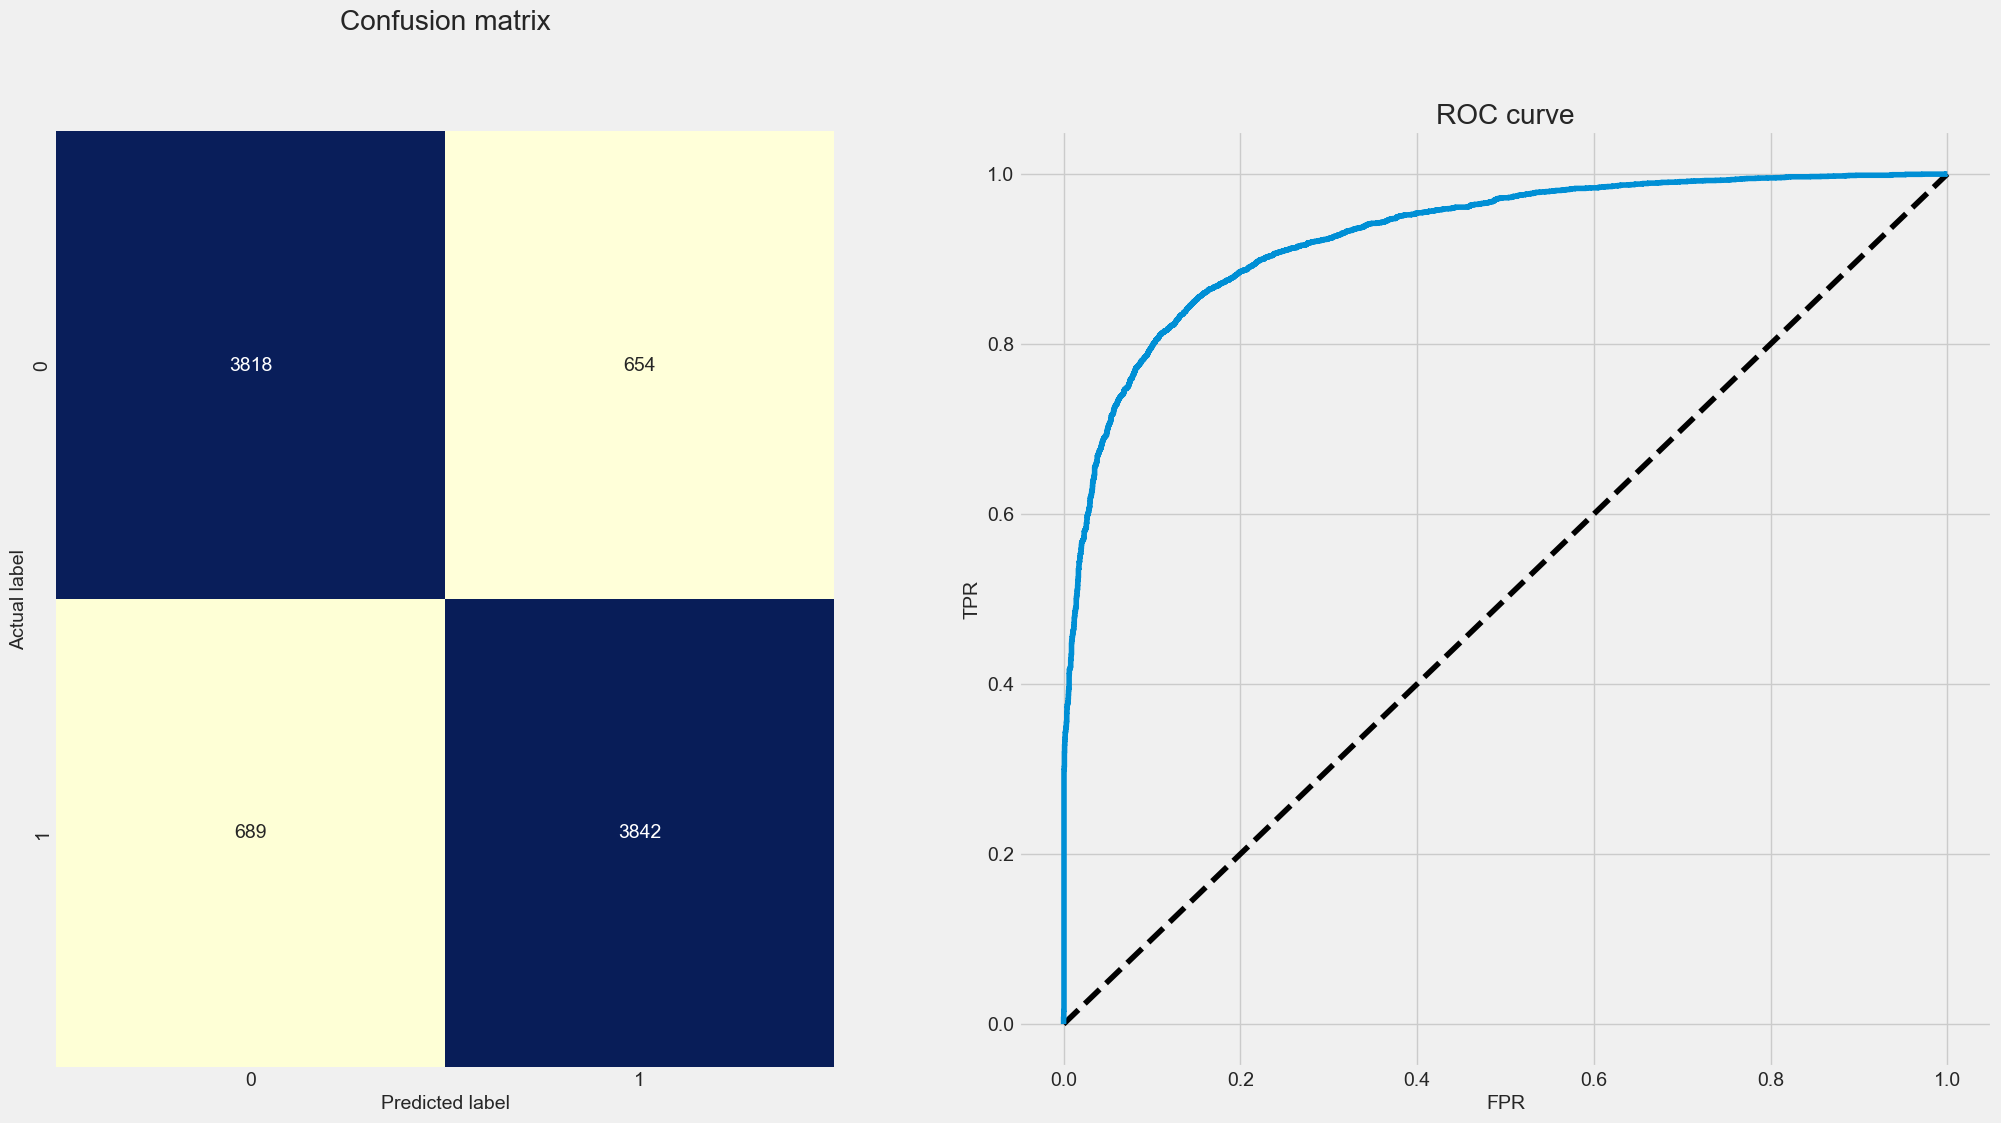

In [776]:
# Implementing the model with the best parameters:
lr_mae = evaluate_model(clf_mlp, X_val, y_val)


#### Feature Importance of MLP Classifier

### 4. DecisionTree Classifier:

In [755]:
# Finding the best hyperparameters for the model:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

dt_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4}


In [756]:
clf_dt = grid_search.best_estimator_
clf_dt

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4)

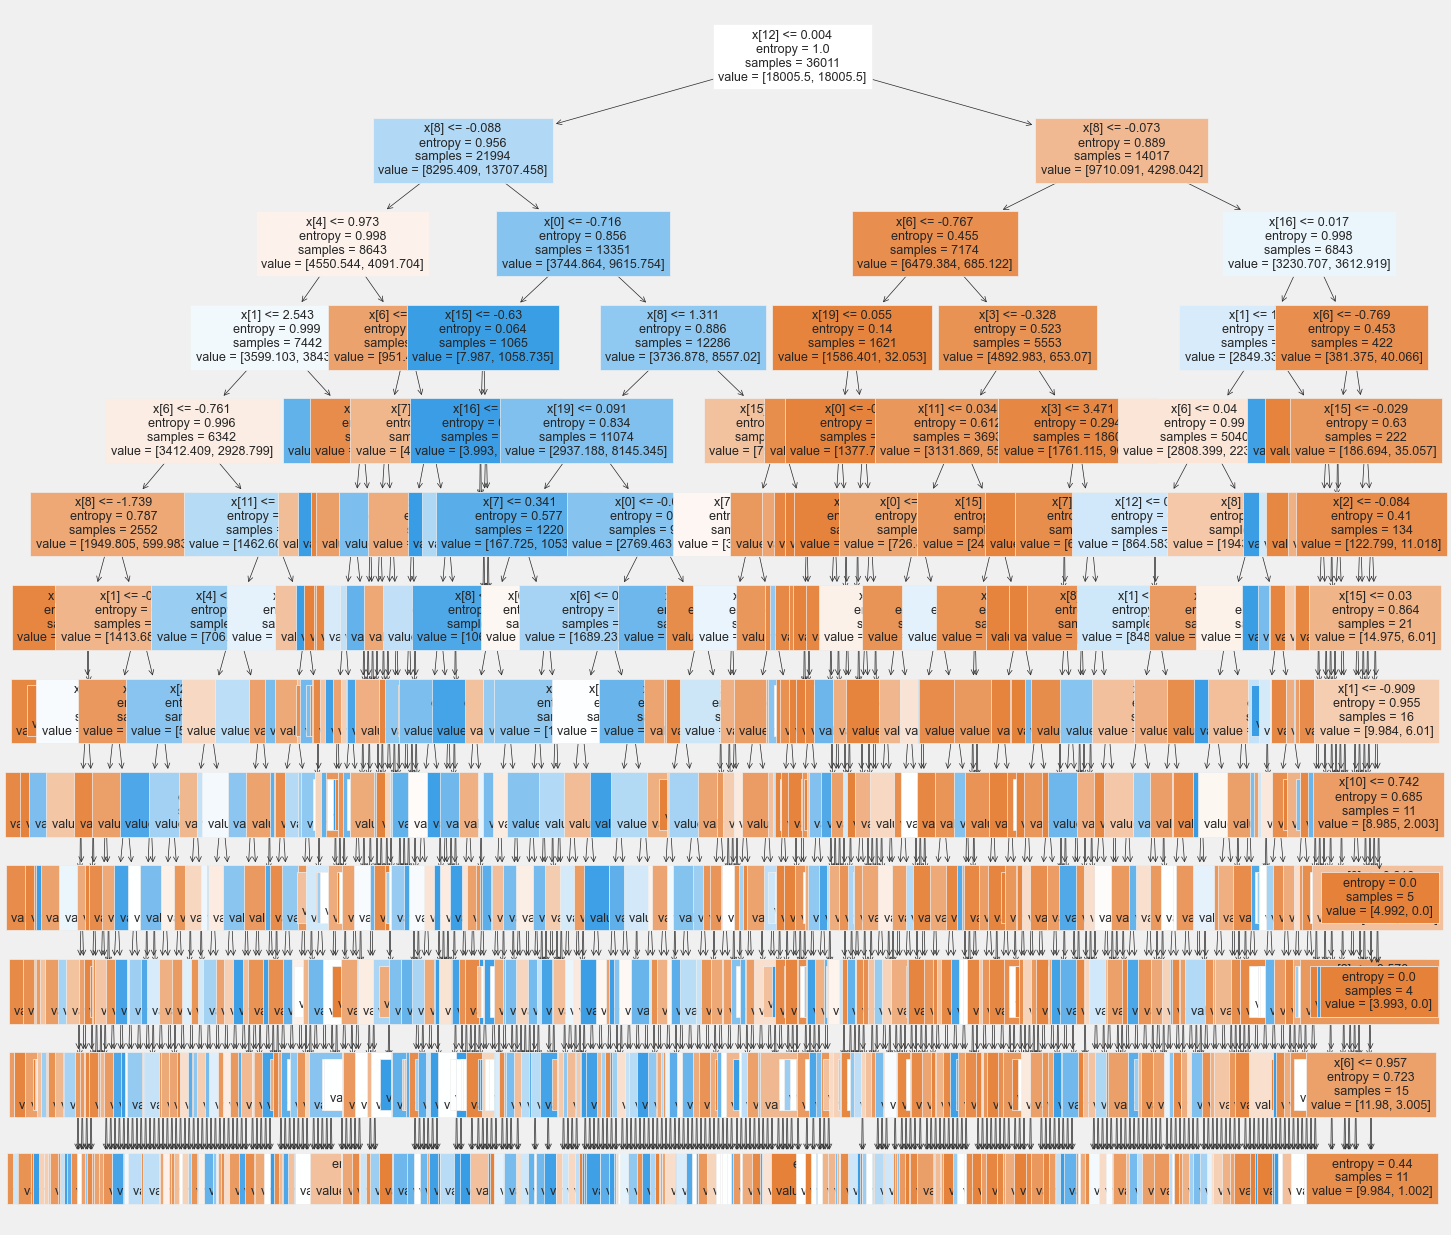

In [757]:
# Plotting the decision tree:
plt.figure(figsize=(15,15))
plot_tree(clf_dt,fontsize=9,filled=True)
plt.show()

============================== Model Evaluation ==============================
Classifier: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4)

 Model Accuracy:
0.8498278351660558


 Confusion matrix:
[[3753  719]
 [ 633 3898]]


 Classification report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4472
           1       0.84      0.86      0.85      4531

    accuracy                           0.85      9003
   macro avg       0.85      0.85      0.85      9003
weighted avg       0.85      0.85      0.85      9003

The train auc is 0.9557731582226076
The test auc is 0.9240904883432716


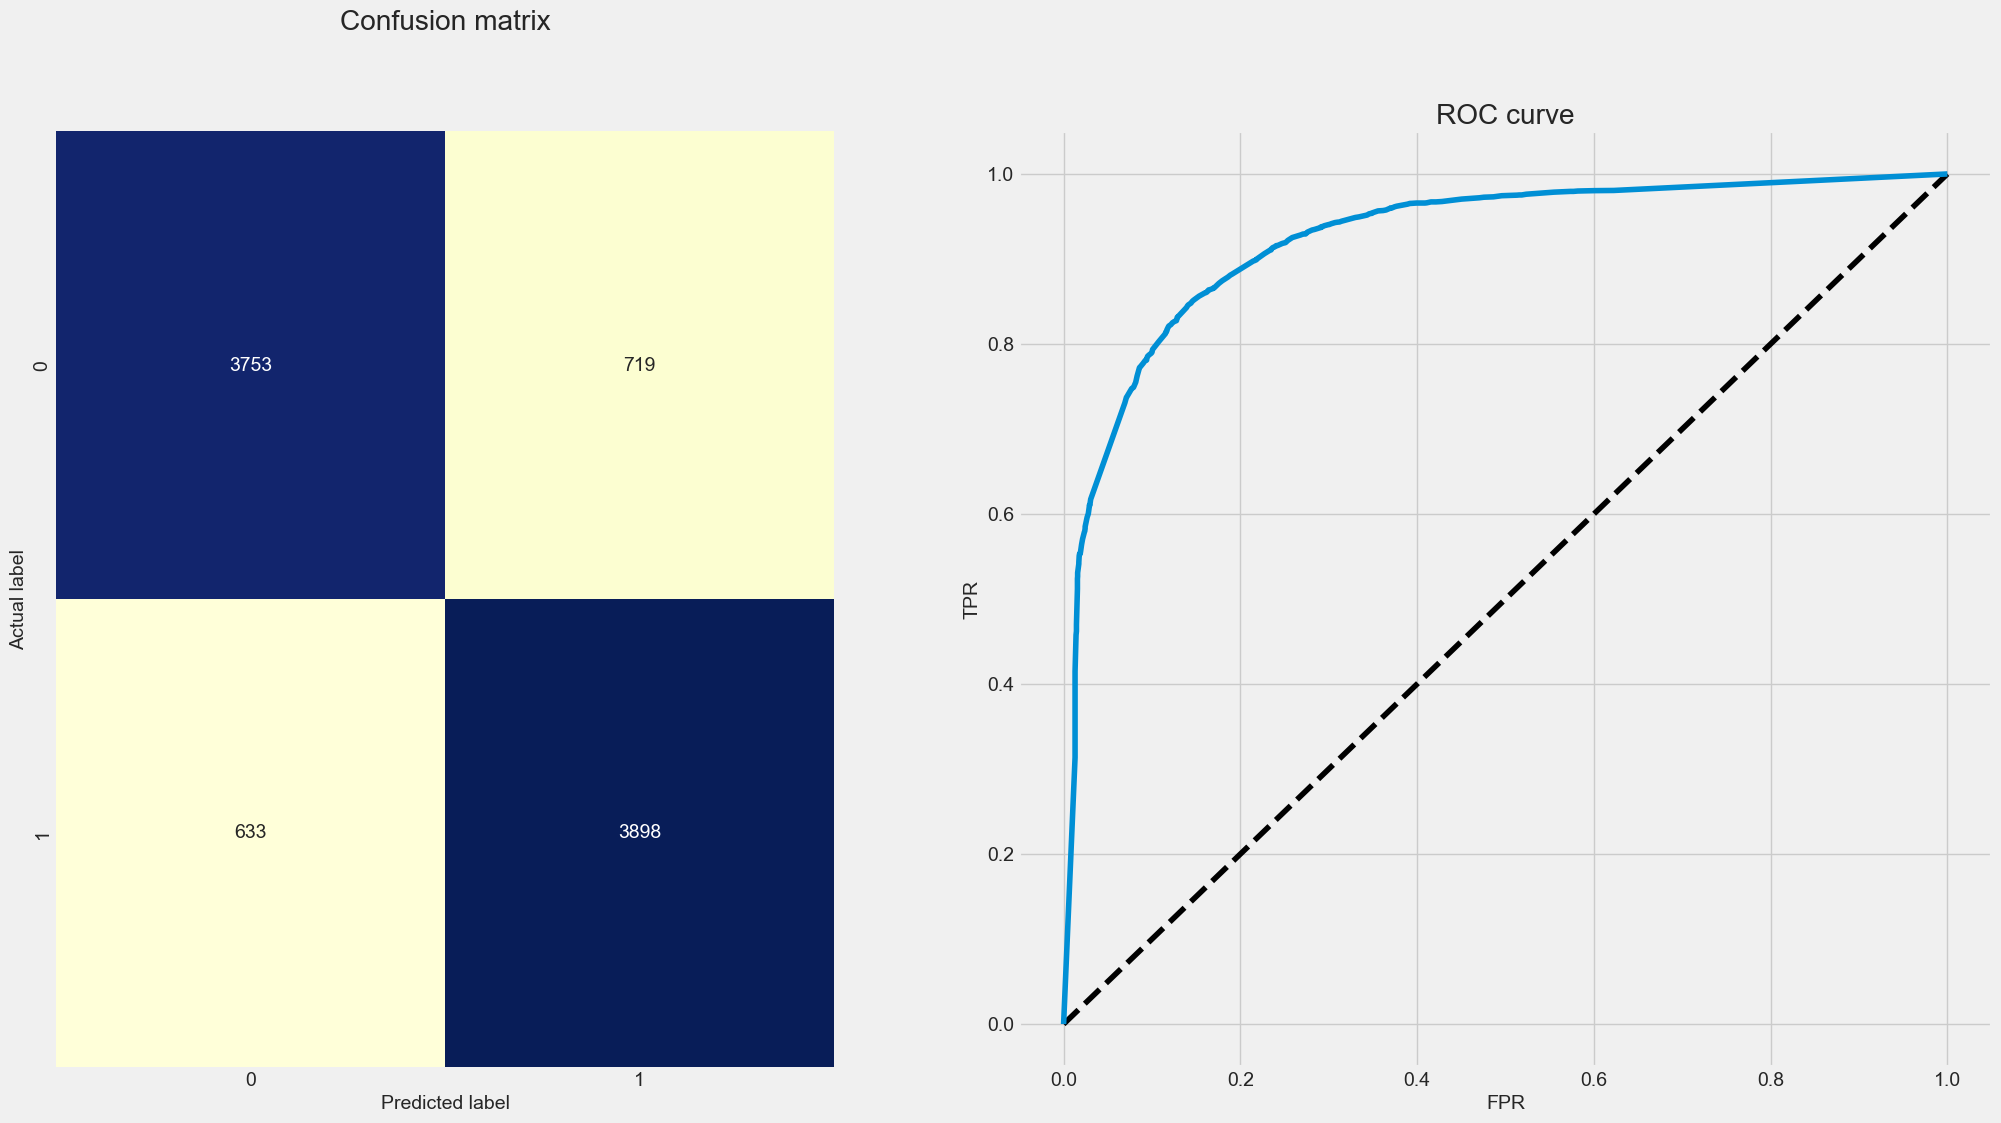

In [777]:
# Implementing the model with the best parameters:
dc_mae = evaluate_model(clf_dt, X_val, y_val)

### 5. Random Forest Model:

In [759]:
param_grid = {
    'n_estimators': [80, 90, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10],
    'min_samples_split': [3,4, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [ 'sqrt'],
    'class_weight': ['balanced']
}

rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train,y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 80}


In [760]:
clf_rf = grid_search.best_estimator_
clf_rf

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=4, n_estimators=80)

============================== Model Evaluation ==============================
Classifier: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=4, n_estimators=80)

 Model Accuracy:
0.8830389870043319


 Confusion matrix:
[[3997  475]
 [ 578 3953]]


 Classification report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4472
           1       0.89      0.87      0.88      4531

    accuracy                           0.88      9003
   macro avg       0.88      0.88      0.88      9003
weighted avg       0.88      0.88      0.88      9003

The train auc is 0.9731641973668121
The test auc is 0.9571137648850356


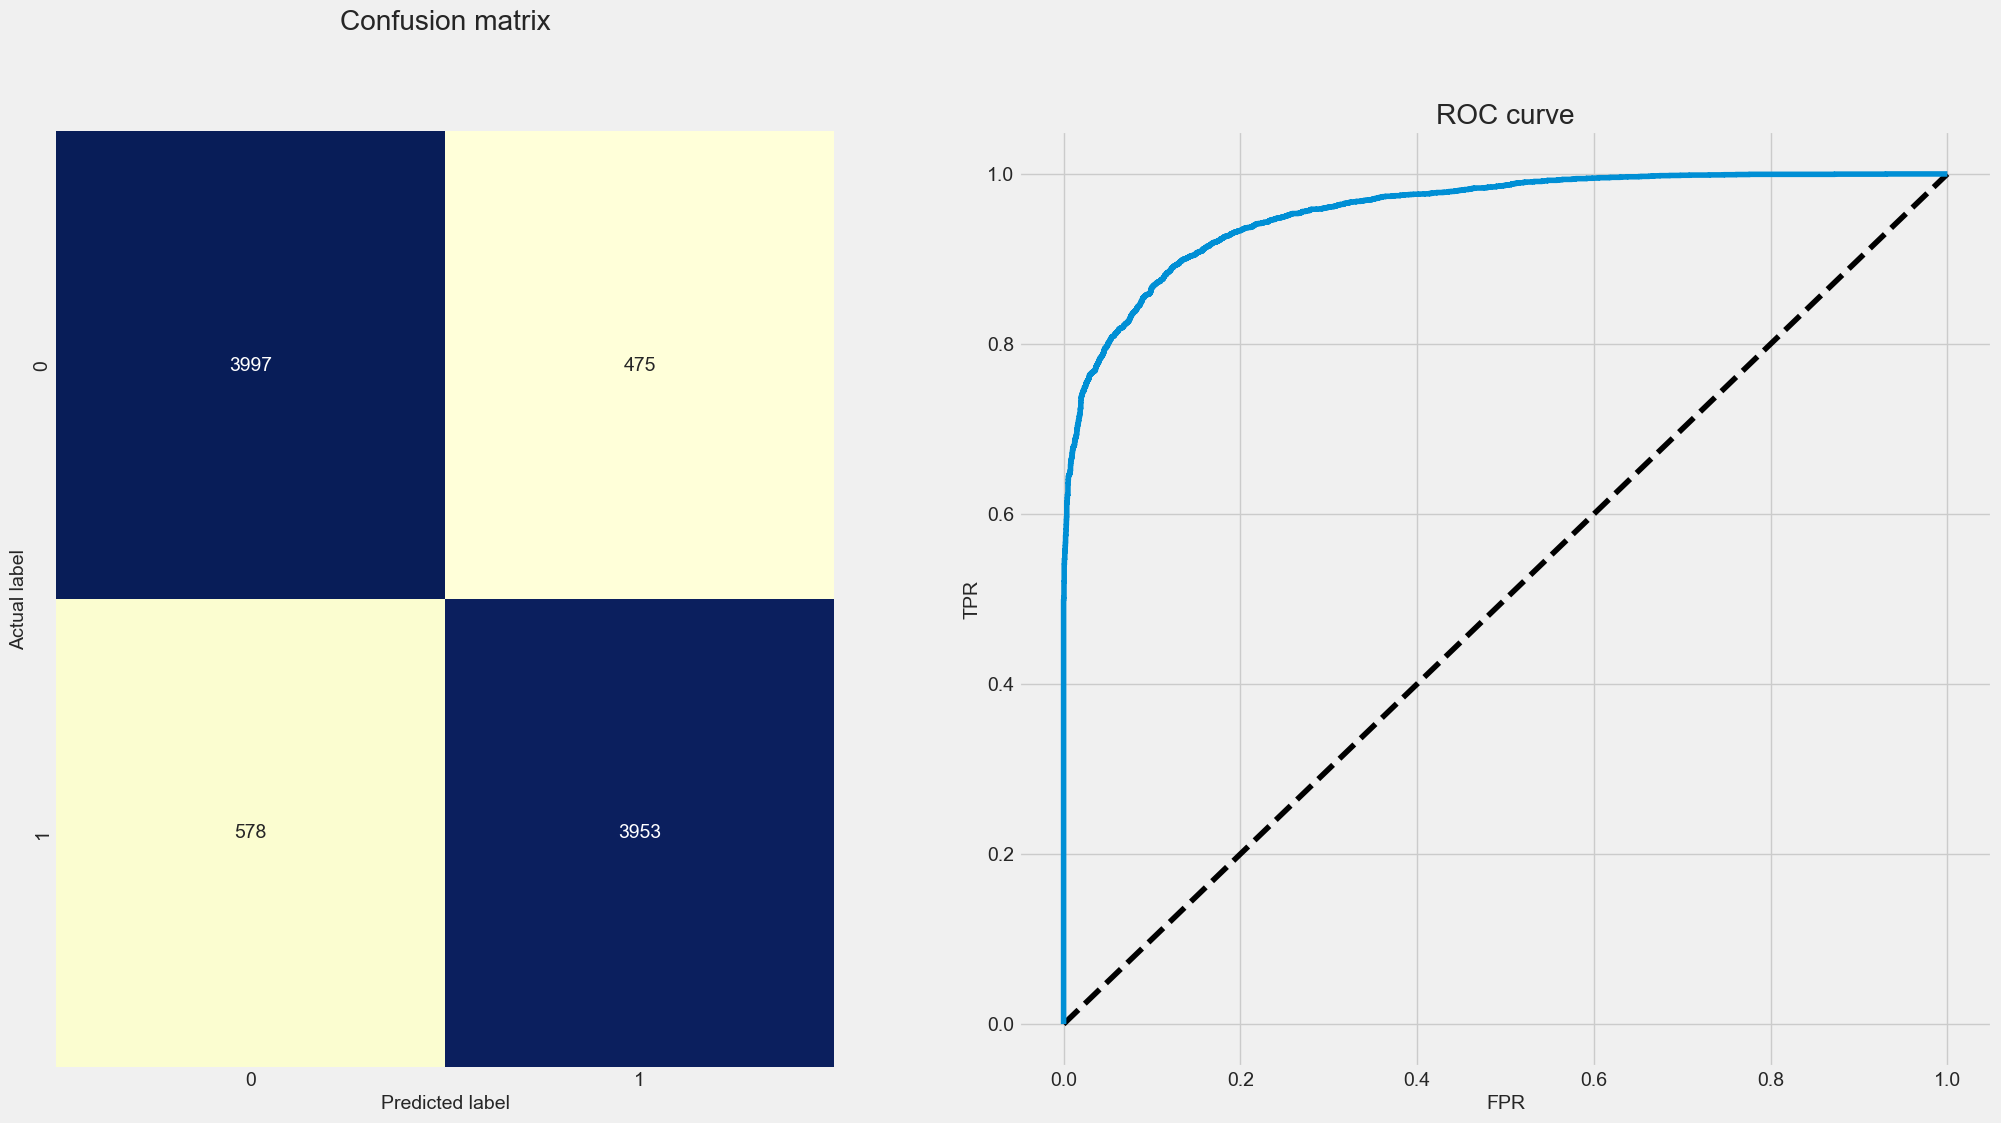

In [778]:
# Implementing the model with the best parameters:
rf_mae = evaluate_model(clf_rf, X_val, y_val)

In [762]:
feature_names = X_train.columns.to_list()
importances = clf_rf.feature_importances_.tolist()

# Create a DataFrame for feature importances
imp = pd.DataFrame({'Features': feature_names[:len(importances)], 'Importance': importances})

# Sort the importances in descending order
imp = imp.sort_values(by='Importance', ascending=False)

# Apply background gradient to the importance column
imp_styled = imp.style.background_gradient(cmap='Greens')

# Display the styled DataFrame
imp_styled

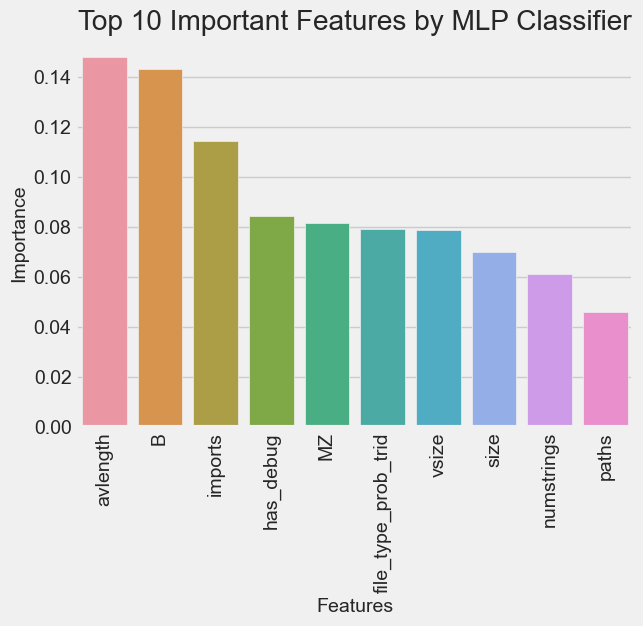

In [763]:
sns.barplot(x='Features', y='Importance', data=imp[:10], ci=None)
plt.title('Top 10 Important Features by Random forest Classifier')
plt.xticks(rotation=90)
plt.show()


We will compare between the different models using the MAE metric.
The MAE is the average absolute difference between the predicted and actual values. It gives us an idea of how wrong the predictions were.

Text(0.5, 1.0, 'Model Comparison on Test MAE')

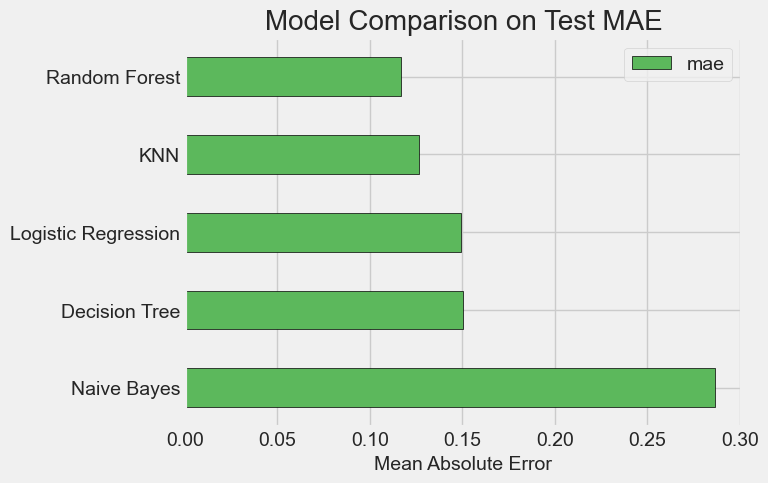

In [764]:
plt.style.use('fivethirtyeight')
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['KNN', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
                                 'mae': [knn_mae, nb_mae, lr_mae,  dc_mae, rf_mae]})
# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh', color = '#5cb85c', edgecolor = 'black')

# Plot formatting
plt.ylabel('')
plt.yticks(size = 14)
plt.xlabel('Mean Absolute Error')
plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

In [765]:
def train_pre_processing(train_df):
    curr_train_copy = train_df.copy()
    # Handling NULLS:
    curr_train_copy = fill_missing_values(curr_train_copy, correlated_groups=correlated_groups)
    curr_train_copy = imputer_implementation(curr_train_copy, 'KNN', reset=True)
    curr_train_copy = imputer_implementation(
        curr_train_copy,
        'most_frequent',
        cols=['has_debug', 'has_relocations', 'has_resources', 'has_signature', 'has_tls'],
        reset=True
    )
    curr_train_copy = fill_missing_values_randomly_by_frequent(curr_train_copy, 'C')

    # Handling categorical features:
    curr_train_copy = one_hot_encode(curr_train_copy, ['C'], reset=True)
    curr_train_copy = one_hot_freq_encode(curr_train_copy, ['file_type_trid'], reset=True)

    curr_train_copy['size'] = curr_train_copy['size'].astype(float)  # Convert Size colum to float type

    # Handling Outliers:
    curr_train_copy = outlier_removal_by_iqr(curr_train_copy, cols=rows_to_outline_with_iqr).dropna()
    curr_train_copy = outlier_removal_by_winsorize(curr_train_copy,
                                              cols=list(set(NUMERIC_COLUMNS) - set(rows_to_outline_with_iqr)))

    # Normalizing data:
    standard_scaled_data = standard_scaler(curr_train_copy, NUMERIC_COLUMNS)
    train_standard_normalized = pd.concat(
        [standard_scaled_data.reset_index(drop=True), curr_train_copy[other_columns].reset_index(drop=True)], axis=1)
    curr_train_copy = train_standard_normalized.copy()
    # Imbalanced problem
    curr_train_copy = smote_imbalance_method(curr_train_copy)
    # New features
    curr_train_copy['bigger_virtual_size'] = (curr_train_copy['vsize'] > curr_train_copy['size']).astype(int)
    # Dimensionality of the problem:
    # curr_train_copy, collinear_features_lst = remove_collinear_features(curr_train_copy, threshold=0.7, is_print=False)
    # Removing the highly colinear features
    curr_train_copy = curr_train_copy.loc[:, chosen_cols]  # Removing the features using PCA

    # Splitting into features and label:
    label = curr_train_copy['label']

    return curr_train_copy.drop(columns=['label']), label

In [766]:
models = [knn, nb, mlp, dt_classifier, rf_classifier]
model_names = ['KNN', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest']

KNN
Validating split number is 1 and its AUC is 0.9133
Validating split number is 2 and its AUC is 0.9162
Validating split number is 3 and its AUC is 0.9118
Validating split number is 4 and its AUC is 0.9178
Validating split number is 5 and its AUC is 0.9123
Naive Bayes
Validating split number is 1 and its AUC is 0.7493
Validating split number is 2 and its AUC is 0.7578
Validating split number is 3 and its AUC is 0.7530
Validating split number is 4 and its AUC is 0.7528
Validating split number is 5 and its AUC is 0.7607
Logistic Regression
Validating split number is 1 and its AUC is 0.9409
Validating split number is 2 and its AUC is 0.9277
Validating split number is 3 and its AUC is 0.9311
Validating split number is 4 and its AUC is 0.9325
Validating split number is 5 and its AUC is 0.9247
Decision Tree
Validating split number is 1 and its AUC is 0.8638
Validating split number is 2 and its AUC is 0.8608
Validating split number is 3 and its AUC is 0.8596
Validating split number is 4 and

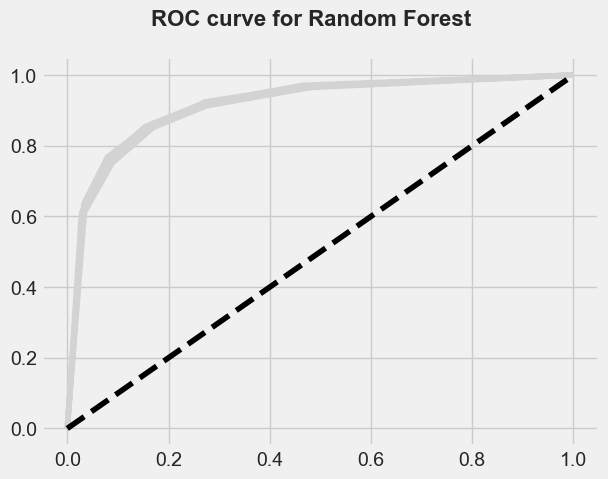

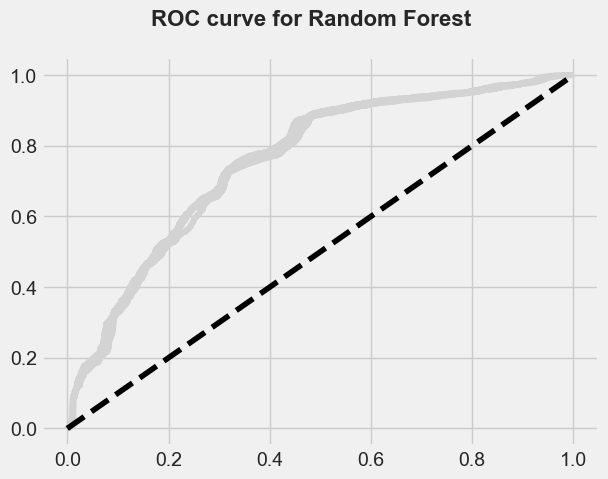

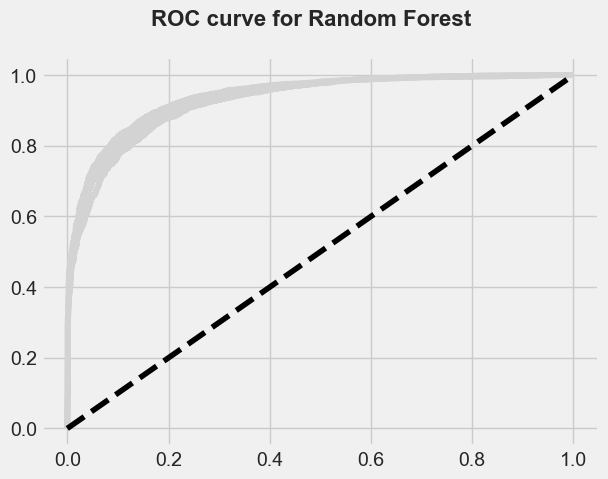

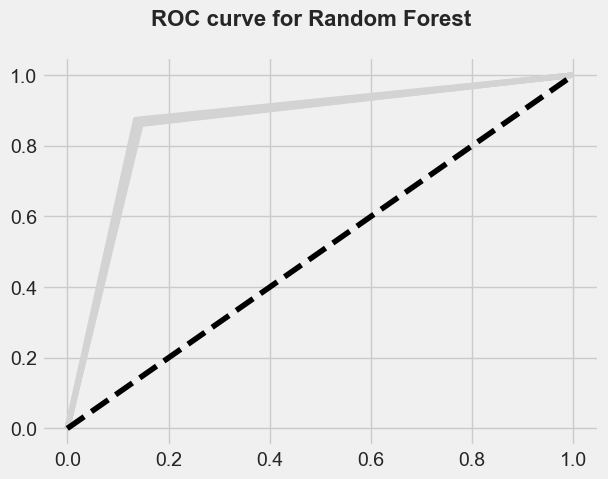

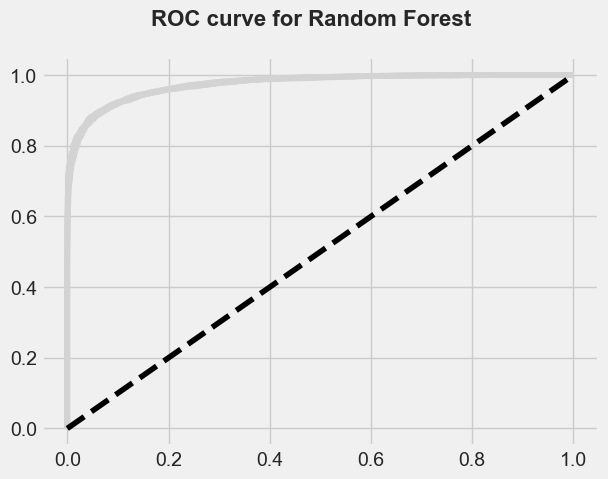

In [767]:
from sklearn.metrics import roc_curve
import numpy as np

def k_folds_plot(plot_feature_models, plot_feature_model_names, k_folds_plot_X_train, k_folds_plot_y_train, k):
    for clf, curr_model_name in zip(plot_feature_models, plot_feature_model_names):
        print(curr_model_name)
        # Set up the plot
        plt.figure()
        plt.suptitle(f"ROC curve for {model_name}", fontsize=16, fontweight='bold')

        # Use KFold to split the data into train and validation sets for k splits
        kf = KFold(n_splits=k, random_state=None, shuffle=False)

        # Initialize variables for mean true positive rate and mean false positive rate
        mean_false_positive_rate = np.linspace(0, 1, 100)
        mean_true_positive_rate = np.zeros_like(mean_false_positive_rate)

        # Initialize variables for tracking AUC values
        auc_lst = []
        sum_auc = 0.0

        # Iterate through the splits
        num_split = 1
        for train_range, validation_range in kf.split(k_folds_plot_X_train):
            # Split the data into train and validation sets for this split
            X_train, X_validation = k_folds_plot_X_train.iloc[train_range], k_folds_plot_X_train.iloc[validation_range]
            y_train, y_validation = k_folds_plot_y_train.iloc[train_range], k_folds_plot_y_train.iloc[validation_range]

            # Preprocess the data if needed

            # Fit the model to the chosen classifier
            clf.fit(X_train, y_train)

            # Predict probabilities for the validation set
            predict_prob = clf.predict_proba(X_validation)[:, 1]

            # Calculate false positive rate, true positive rate, and threshold
            false_positive_rate, true_positive_rate, threshold = roc_curve(y_validation, predict_prob)

            # Calculate AUC for this split
            auc_ = auc(false_positive_rate, true_positive_rate)

            # Add AUC to the list and sum
            auc_lst.append(auc_)
            sum_auc += auc_

            # Set mean_true_positive_rate to its original state for the next iteration
            mean_true_positive_rate[0] = 0.0

            print(f"Validating split number is {num_split} and its AUC is {auc_:.4f}")

            # Plot this iteration's results
            plt.plot(false_positive_rate, true_positive_rate, color='#D3D3D3')

            # Increase the number of splits for the next iteration
            num_split += 1

        # Start plotting
        plt.plot([0], [0], color='#D3D3D3', linestyle='-', label='K-folds')

        # Calculate the mean true positive rate
        mean_true_positive_rate /= k
        mean_true_positive_rate[-1] = 1.0

        # Calculate the mean AUC
        mean_auc = sum_auc / k

        # Plot the mean ROC curve
        plt.plot([0, 1], [0, 1], color='black', linestyle='--')

k_folds_plot(models, model_names, X_train, y_train, 5)

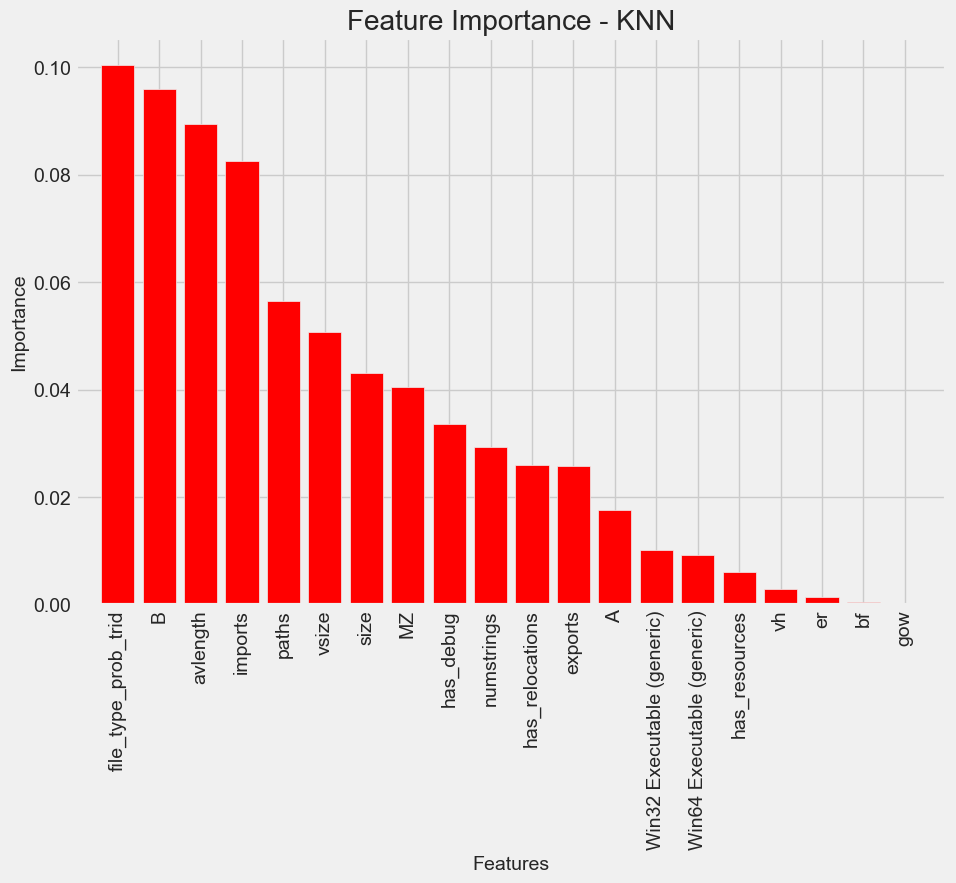

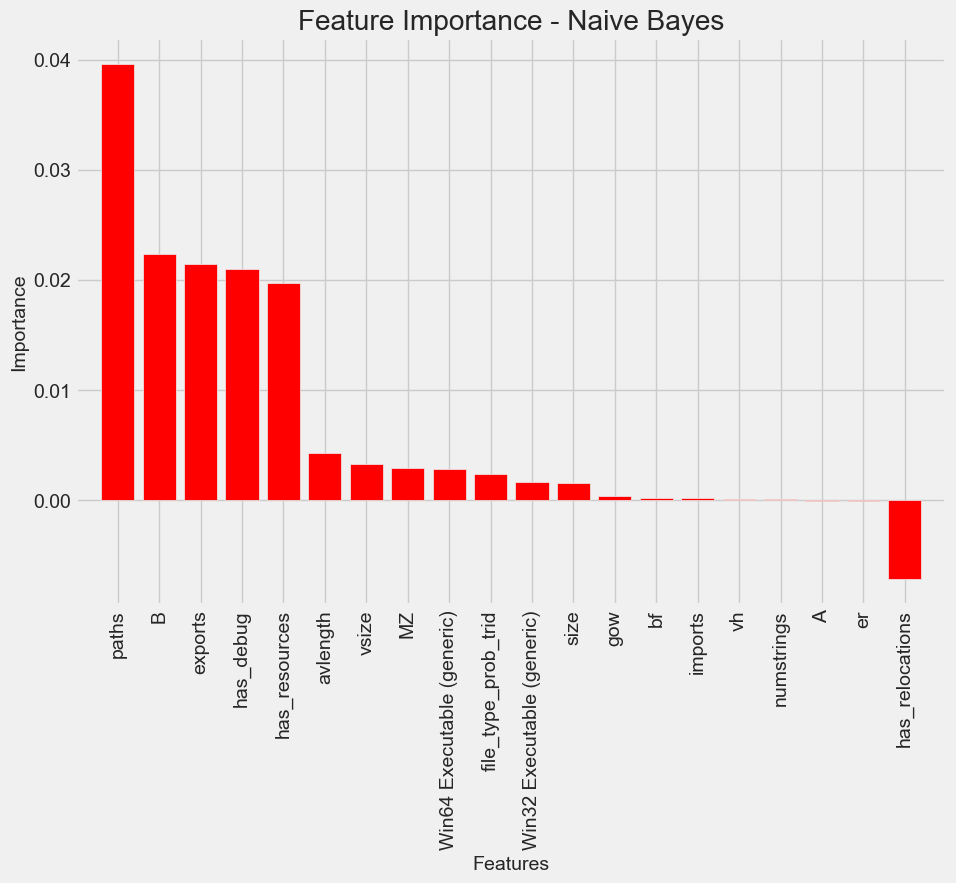

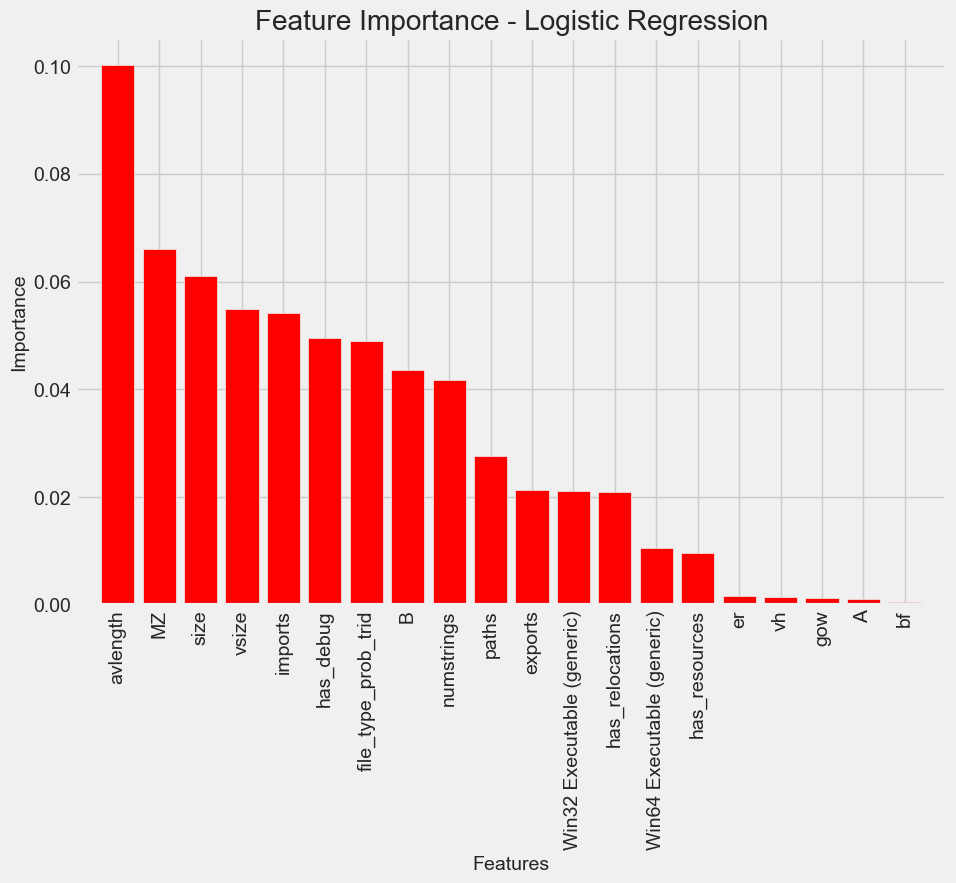

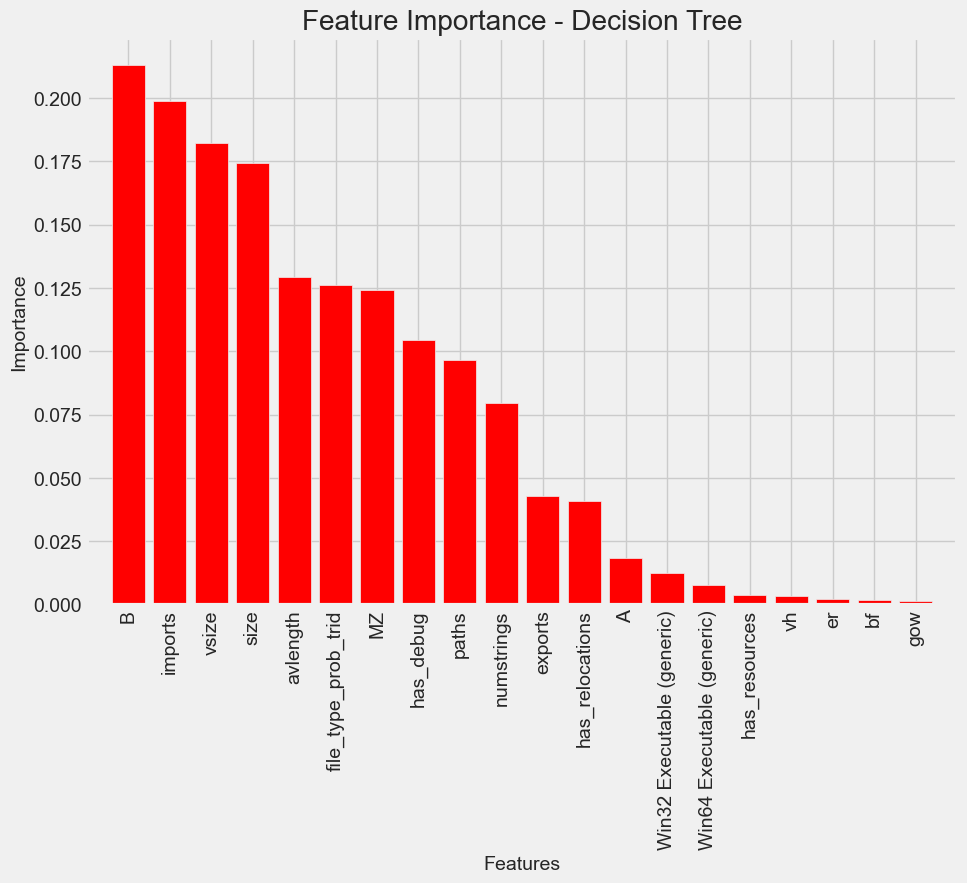

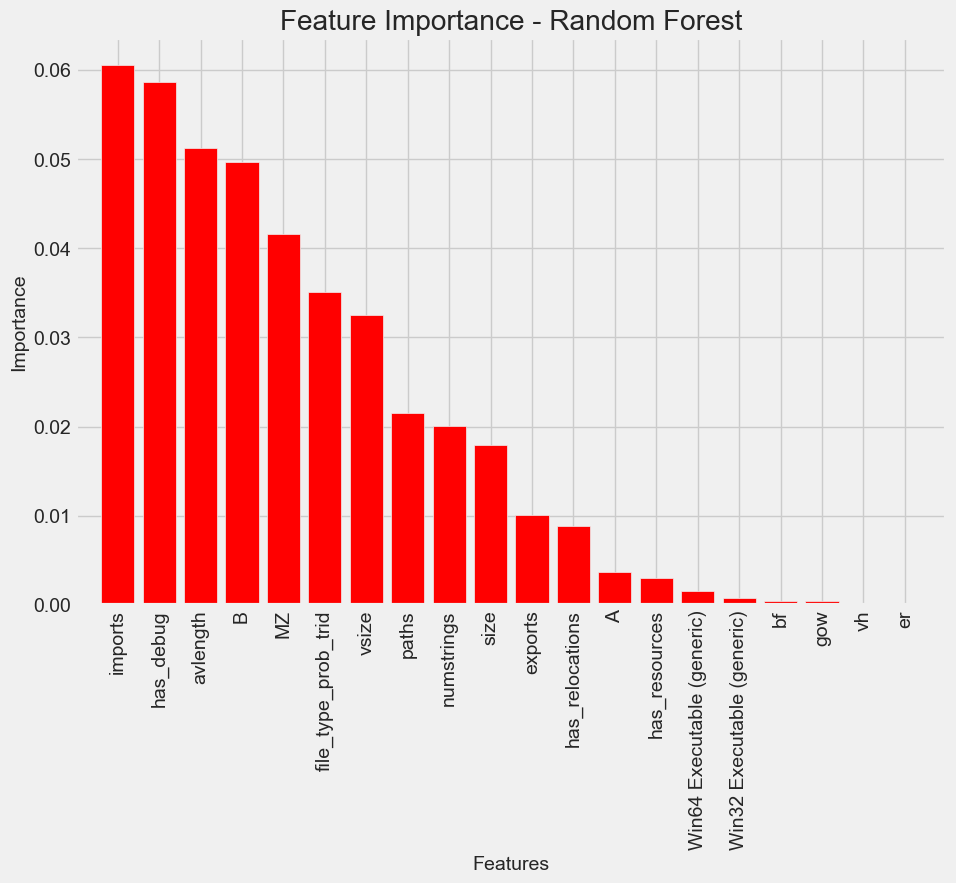

In [768]:
from sklearn.inspection import permutation_importance

def plot_feature_importance(plot_feature_models, plot_feature_model_names, plot_feature_X_train):
    for curr_model, curr_model_name in zip(plot_feature_models, plot_feature_model_names):
        # Calculate feature importances using permutation importance
        result = permutation_importance(curr_model, plot_feature_X_train, y_train, n_repeats=5, random_state=42)
        sorted_indices = result.importances_mean.argsort()[::-1]
        sorted_features = plot_feature_X_train.columns[sorted_indices]
        sorted_importances = result.importances_mean[sorted_indices]

        # Plot the graph
        plt.figure(figsize=(10, 7))
        plt.title(f"Feature Importance - {curr_model_name}")
        plt.bar(range(plot_feature_X_train.shape[1]), sorted_importances, color="r", align="center")
        plt.xticks(range(plot_feature_X_train.shape[1]), sorted_features, rotation='vertical')
        plt.xlim([-1, plot_feature_X_train.shape[1]])
        plt.xlabel("Features")
        plt.ylabel("Importance")
        plt.show()

# Call the function
plot_feature_importance(models, model_names, X_train)

Model: KNN
Mean Score: 0.845936019052816

Model: Naive Bayes
Mean Score: 0.7022855923025377

Model: Logistic Regression
Mean Score: 0.8507121269127774

Model: Decision Tree
Mean Score: 0.8603204533517866



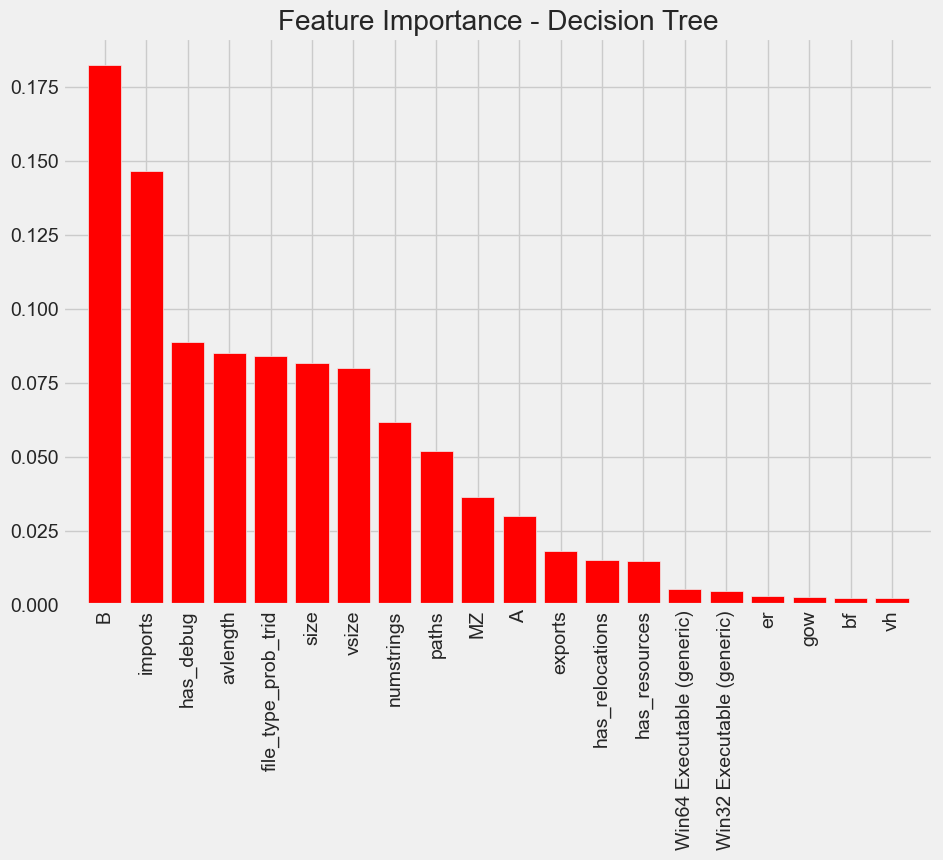

Model: Random Forest
Mean Score: 0.9142485487413969



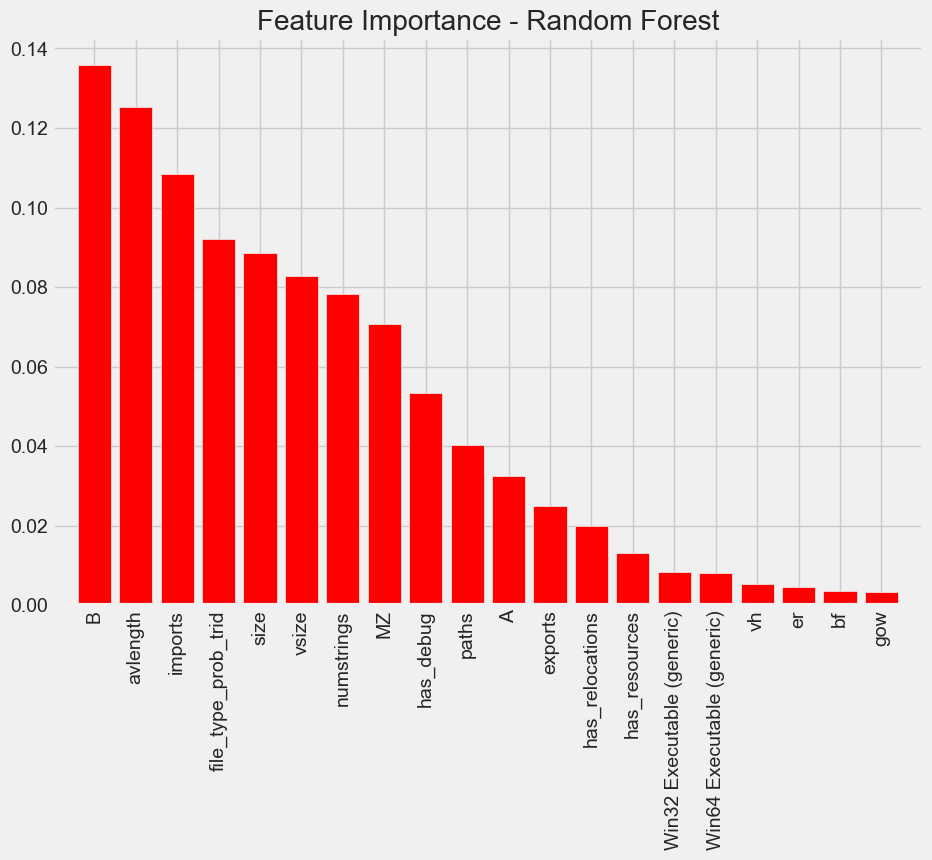

In [769]:
from sklearn.metrics import auc
from sklearn.model_selection import KFold

splits = 5

# Create a KFold object
kf = KFold(n_splits=splits, shuffle=True)

for model, model_name in zip(models, model_names):
    scores = []

    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]

        model.fit(X_train_kf, y_train_kf)
        score = model.score(X_test_kf, y_test_kf)
        scores.append(score)

    mean_score = np.mean(scores)
    print(f"Model: {model_name}")
    print(f"Mean Score: {mean_score}")
    print()

    # Plotting feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_names = X_train.columns

        plt.figure(figsize=(10, 7))
        plt.title(f"Feature Importance - {model_name}")
        plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
        plt.xlim([-1, X_train.shape[1]])
        plt.show()

  # Part 5: Main Pipeline

In [770]:
def main_pipeline(train_file, test_file, prediction_file):
    # Load the train and test data
    train_data = pd.read_csv(train_file, index_col=0).copy()
    test_data = pd.read_csv(test_file, index_col=0).copy()
    final_results = test_data.copy()

    # Pre-processing of the train set:
    X_train_current, y_train_current = train_pre_processing(train_data)

    # Pre-processing of the test set:
    X_test_current = test_pre_processing(test_data)

    X_test_current = X_test_current.reindex(columns=X_train_current.columns)

    # Define the model pipeline
    pipeline = Pipeline([('classifier', RandomForestClassifier(
        class_weight='balanced', criterion='gini', max_depth=7,
        max_features='sqrt',
        min_samples_leaf=1, min_samples_split=2,
        n_estimators=200))])

    # Fit the pipeline on the training data
    pipeline.fit(X_train_current, y_train_current)

    # Make predictions on the test data
    y_pred_proba = pipeline.predict_proba(X_test_current)

    # Extract the probabilities for the positive class (class index 1)
    positive_class_proba = y_pred_proba[:, 1]

    # Save the predictions to a file
    final_results['predict_proba'] = positive_class_proba
    result_df = final_results[['predict_proba']]
    display(result_df)
    result_df.to_csv(prediction_file)


In [771]:
train_file = 'train.csv'
test_file = 'test.csv'
prediction_file = 'results_7.csv'

main_pipeline(train_file, test_file, prediction_file)

predict_proba
sha256                                                           
023928c14abe04196d45bb4578b8fa0eb02189898ce93b3...       0.967163
6436083d4eed84436768d66829b961927eeb9de2e6657f1...       0.199071
038e71f41fdc5edb3a7afc112fb0679a4a5d6d945120559...       0.493590
be913ef29b4566e7817a5ab2c4a4289a455e9b562e1da08...       0.055929
e78f83f0af4f1fbcf8fffd562b4734701483818078bf0ef...       0.396394
...                                                           ...
977bc37677535028ae8bc98a585e05e59dcf2c4cb55636d...       0.427097
2c4c5ab9fc53e99f6416547ca9659f954a4af84008b801a...       0.415532
7bd4c102d52df73710982d29ebf3c68bc2d249459fc5368...       0.125058
4228f0379f41d4b2d50643885474ac77a3ff1719971812e...       0.117549
6b7bd8f0f3d4063d4802727282b2174dcf0f96b94d6289c...       0.534730

[18000 rows x 1 columns]

In [772]:
time_passed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print(f"Time Duration: {time_passed} (Hours:Minutes:Seconds)")


Time Duration: 00:17:15 (Hours:Minutes:Seconds)
